In [1]:
import pyforest
from updated_RF import *
from imblearn.over_sampling import SMOTEN, ADASYN, SMOTE
from sklearn.metrics import accuracy_score, balanced_accuracy_score,precision_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, auc, recall_score, confusion_matrix,matthews_corrcoef

from rdkit import Chem
from rdkit.Chem import AllChem


import math
import torch
import numpy as np
# import gpytorch
import pandas as pd
import seaborn as sns
import os
import pickle
import shutil
import matplotlib 
# matplotlib.use('Agg')

from matplotlib import pyplot as plt
import sklearn
from sklearn.model_selection import KFold

import imblearn as imb
# print("imblearn version: ",imblearn.__version__)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
import itertools

# from scipy.stats
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, auc, recall_score, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
import sys


from sklearn.model_selection import GridSearchCV

In [5]:
kf_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/datasets/80train_20test/k_fold/validation/'
val_models='/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/datasets/80train_20test/k_fold/validation/val_models/'
results_dir='/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/datasets/80train_20test/k_fold/validation/results/'
neks = ['NEK2_binding','NEK2_inhibition','NEK3_binding','NEK5_binding','NEK9_binding','NEK9_inhibition']
samplings =['none_scaled','UNDER','SMOTE','ADASYN'] 
feats=['MOE','MFP'] 
RF_types = ['RF','RF_BCW','BRFC','BRFC_BCW']
folds=['fold1','fold2','fold3','fold4','fold5'] 

for nek in neks: 
    for feat in feats: 
        for samp in samplings:
            for fold in folds: 
                root_name = f'{nek}_{feat}_{samp}_{fold}_validation'
                
                trainX=pd.read_csv(f'{kf_path}{root_name}_trainX.csv').iloc[:, :-1]
                train_y=pd.read_csv(f'{kf_path}{root_name}_train_y.csv').to_numpy().reshape(-1)
                testX=pd.read_csv(f'{kf_path}{root_name}_testX.csv').iloc[:, :-1]
                test_y=pd.read_csv(f'{kf_path}{root_name}_test_y.csv').to_numpy().reshape(-1)
                for rf in RF_types: 
                    model_name = f'{nek}_{feat}_{samp}_{rf}_{fold}'
                    print(model_name) 
                    model = rf_models(trainX, train_y, testX, test_y, rf, {}, True)  # make sure dict and doesn't go to default RF version

                    # with open(f'{model_pickle_dir}{model_name}.pkl', 'wb') as f: 
                    #     pickle.dump(model, f) 
                    # add cm and other metrics to this function 
                    train_df = gather_rf_results(model, trainX, train_y)
                    test_df = gather_rf_results(model, testX, test_y)
                    print()
                    
                    
                    for this_df in [train_df,test_df]: 
                        this_df['model'] = model_name
                        # this_df= add_cm(this_df)
                        this_df['NEK'] =nek
                        this_df['feat_type'] = feat
                        this_df['strategy'] = samp
                        this_df['RF_type'] = rf
                    
                    train_df.to_csv(f'{results_dir}{model_name}_train.csv',index=False) 
                    test_df.to_csv(f'{results_dir}{model_name}_test.csv',index=False) 
                        
                        
                    

NEK2_binding_MOE_none_scaled_RF_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.947, precision: 0.000, recall: 0.000, spec: 0.986
func:'rf_models'  took: 10.9170 sec

NEK2_binding_MOE_none_scaled_RF_BCW_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.960, precision: 0.500, recall: 0.333, spec: 0.986
func:'rf_models'  took: 5.5450 sec

NEK2_binding_MOE_none_scaled_BRFC_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.758, precision: 0.142, recall: 1.000, spec: 0.748
TEST: acc: 0.742, precision: 0.098, recall: 0.667, spec: 0.745
func:'rf_models'  took: 0.3255 sec

NEK2_binding_MOE_none_scaled_BRFC_BCW_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.689, precision: 0.114, recall: 1.000, spec: 0.676
TEST: acc: 0.596, precision: 0.064, recall: 0.667, spec: 0.593
func:'rf_models'  took: 0.6899 sec

NEK2_binding_MOE_none_scaled_RF_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.933, precision: 0.125, recall: 0.111, spec: 0.968
func:'rf_models'  took: 11.9379 sec

NEK2_binding_MOE_none_scaled_RF_BCW_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.929, precision: 0.182, recall: 0.222, spec: 0.958
func:'rf_models'  took: 5.5570 sec

NEK2_binding_MOE_none_scaled_BRFC_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.782, precision: 0.155, recall: 1.000, spec: 0.773
TEST: acc: 0.698, precision: 0.085, recall: 0.667, spec: 0.699
func:'rf_models'  took: 0.3246 sec

NEK2_binding_MOE_none_scaled_BRFC_BCW_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.702, precision: 0.118, recall: 1.000, spec: 0.690
TEST: acc: 0.702, precision: 0.047, recall: 0.333, spec: 0.718
func:'rf_models'  took: 0.6479 sec

NEK2_binding_MOE_none_scaled_RF_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.960, precision: 0.500, recall: 0.333, spec: 0.986
func:'rf_models'  took: 12.0804 sec

NEK2_binding_MOE_none_scaled_RF_BCW_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.929, precision: 0.182, recall: 0.222, spec: 0.958
func:'rf_models'  took: 4.6383 sec

NEK2_binding_MOE_none_scaled_BRFC_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.774, precision: 0.151, recall: 1.000, spec: 0.765
TEST: acc: 0.729, precision: 0.106, recall: 0.778, spec: 0.727
func:'rf_models'  took: 0.3188 sec

NEK2_binding_MOE_none_scaled_BRFC_BCW_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.717, precision: 0.124, recall: 1.000, spec: 0.705
TEST: acc: 0.689, precision: 0.058, recall: 0.444, spec: 0.699
func:'rf_models'  took: 0.6223 sec

NEK2_binding_MOE_none_scaled_RF_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.916, precision: 0.000, recall: 0.000, spec: 0.954
func:'rf_models'  took: 14.9616 sec

NEK2_binding_MOE_none_scaled_RF_BCW_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.947, precision: 0.364, recall: 0.444, spec: 0.968
func:'rf_models'  took: 5.3411 sec

NEK2_binding_MOE_none_scaled_BRFC_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.769, precision: 0.148, recall: 1.000, spec: 0.759
TEST: acc: 0.693, precision: 0.083, recall: 0.667, spec: 0.694
func:'rf_models'  took: 0.3285 sec

NEK2_binding_MOE_none_scaled_BRFC_BCW_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.678, precision: 0.110, recall: 1.000, spec: 0.664
TEST: acc: 0.676, precision: 0.100, recall: 0.889, spec: 0.667
func:'rf_models'  took: 0.6406 sec

NEK2_binding_MOE_none_scaled_RF_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.916, precision: 0.000, recall: 0.000, spec: 0.954
func:'rf_models'  took: 14.2217 sec

NEK2_binding_MOE_none_scaled_RF_BCW_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.938, precision: 0.222, recall: 0.222, spec: 0.968
func:'rf_models'  took: 5.4854 sec

NEK2_binding_MOE_none_scaled_BRFC_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.743, precision: 0.135, recall: 1.000, spec: 0.733
TEST: acc: 0.698, precision: 0.072, recall: 0.556, spec: 0.704
func:'rf_models'  took: 0.3286 sec

NEK2_binding_MOE_none_scaled_BRFC_BCW_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.712, precision: 0.122, recall: 1.000, spec: 0.700
TEST: acc: 0.711, precision: 0.062, recall: 0.444, spec: 0.722
func:'rf_models'  took: 0.6729 sec

NEK2_binding_MOE_UNDER_RF_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.556, precision: 0.556, recall: 0.556, spec: 0.556
func:'rf_models'  took: 0.2555 sec

NEK2_binding_MOE_UNDER_RF_BCW_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.556, precision: 0.556, recall: 0.556, spec: 0.556
func:'rf_models'  took: 0.2546 sec

NEK2_binding_MOE_UNDER_BRFC_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.556, precision: 0.556, recall: 0.556, spec: 0.556
func:'rf_models'  took: 0.2841 sec

NEK2_binding_MOE_UNDER_BRFC_BCW_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.556, precision: 0.556, recall: 0.556, spec: 0.556
func:'rf_models'  took: 0.2918 sec

NEK2_binding_MOE_UNDER_RF_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.667, precision: 0.636, recall: 0.778, spec: 0.556
func:'rf_models'  took: 0.3090 sec

NEK2_binding_MOE_UNDER_RF_BCW_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.667, precision: 0.636, recall: 0.778, spec: 0.556
func:'rf_models'  took: 0.3046 sec

NEK2_binding_MOE_UNDER_BRFC_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.667, precision: 0.636, recall: 0.778, spec: 0.556
func:'rf_models'  took: 0.3384 sec

NEK2_binding_MOE_UNDER_BRFC_BCW_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.611, precision: 0.583, recall: 0.778, spec: 0.444
func:'rf_models'  took: 0.3460 sec

NEK2_binding_MOE_UNDER_RF_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.833, precision: 0.800, recall: 0.889, spec: 0.778
func:'rf_models'  took: 0.3093 sec

NEK2_binding_MOE_UNDER_RF_BCW_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.833, precision: 0.800, recall: 0.889, spec: 0.778
func:'rf_models'  took: 0.3651 sec

NEK2_binding_MOE_UNDER_BRFC_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.833, precision: 0.800, recall: 0.889, spec: 0.778
func:'rf_models'  took: 0.3643 sec

NEK2_binding_MOE_UNDER_BRFC_BCW_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.833, precision: 0.800, recall: 0.889, spec: 0.778
func:'rf_models'  took: 0.3491 sec

NEK2_binding_MOE_UNDER_RF_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.556, precision: 0.556, recall: 0.556, spec: 0.556
func:'rf_models'  took: 0.3117 sec

NEK2_binding_MOE_UNDER_RF_BCW_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.500, precision: 0.500, recall: 0.556, spec: 0.444
func:'rf_models'  took: 0.3090 sec

NEK2_binding_MOE_UNDER_BRFC_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.556, precision: 0.556, recall: 0.556, spec: 0.556
func:'rf_models'  took: 0.3371 sec

NEK2_binding_MOE_UNDER_BRFC_BCW_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.500, precision: 0.500, recall: 0.556, spec: 0.444
func:'rf_models'  took: 0.3635 sec

NEK2_binding_MOE_UNDER_RF_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.556, precision: 0.538, recall: 0.778, spec: 0.333
func:'rf_models'  took: 0.2712 sec

NEK2_binding_MOE_UNDER_RF_BCW_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.667, precision: 0.615, recall: 0.889, spec: 0.444
func:'rf_models'  took: 0.2769 sec

NEK2_binding_MOE_UNDER_BRFC_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.667, precision: 0.615, recall: 0.889, spec: 0.444
func:'rf_models'  took: 0.2958 sec

NEK2_binding_MOE_UNDER_BRFC_BCW_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.611, precision: 0.583, recall: 0.778, spec: 0.444
func:'rf_models'  took: 0.3262 sec

NEK2_binding_MOE_SMOTE_RF_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.958, precision: 0.942, recall: 0.977, spec: 0.940
func:'rf_models'  took: 28.3557 sec

NEK2_binding_MOE_SMOTE_RF_BCW_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.954, precision: 0.934, recall: 0.977, spec: 0.931
func:'rf_models'  took: 28.3857 sec

NEK2_binding_MOE_SMOTE_BRFC_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.956, precision: 0.930, recall: 0.986, spec: 0.926
func:'rf_models'  took: 27.8214 sec

NEK2_binding_MOE_SMOTE_BRFC_BCW_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.958, precision: 0.934, recall: 0.986, spec: 0.931
func:'rf_models'  took: 30.6325 sec

NEK2_binding_MOE_SMOTE_RF_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.970, precision: 0.959, recall: 0.981, spec: 0.958
func:'rf_models'  took: 25.7430 sec

NEK2_binding_MOE_SMOTE_RF_BCW_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.970, precision: 0.959, recall: 0.981, spec: 0.958
func:'rf_models'  took: 26.0715 sec

NEK2_binding_MOE_SMOTE_BRFC_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.970, precision: 0.959, recall: 0.981, spec: 0.958
func:'rf_models'  took: 27.4152 sec

NEK2_binding_MOE_SMOTE_BRFC_BCW_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.972, precision: 0.964, recall: 0.981, spec: 0.963
func:'rf_models'  took: 25.5764 sec

NEK2_binding_MOE_SMOTE_RF_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.954, precision: 0.941, recall: 0.968, spec: 0.940
func:'rf_models'  took: 25.2371 sec

NEK2_binding_MOE_SMOTE_RF_BCW_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.956, precision: 0.946, recall: 0.968, spec: 0.944
func:'rf_models'  took: 26.4023 sec

NEK2_binding_MOE_SMOTE_BRFC_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.954, precision: 0.941, recall: 0.968, spec: 0.940
func:'rf_models'  took: 25.2895 sec

NEK2_binding_MOE_SMOTE_BRFC_BCW_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.954, precision: 0.941, recall: 0.968, spec: 0.940
func:'rf_models'  took: 26.0563 sec

NEK2_binding_MOE_SMOTE_RF_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.949, precision: 0.922, recall: 0.981, spec: 0.917
func:'rf_models'  took: 24.8691 sec

NEK2_binding_MOE_SMOTE_RF_BCW_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.944, precision: 0.917, recall: 0.977, spec: 0.912
func:'rf_models'  took: 26.0747 sec

NEK2_binding_MOE_SMOTE_BRFC_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.944, precision: 0.914, recall: 0.981, spec: 0.907
func:'rf_models'  took: 25.4908 sec

NEK2_binding_MOE_SMOTE_BRFC_BCW_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.940, precision: 0.909, recall: 0.977, spec: 0.903
func:'rf_models'  took: 26.4968 sec

NEK2_binding_MOE_SMOTE_RF_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.965, precision: 0.963, recall: 0.968, spec: 0.963
func:'rf_models'  took: 24.9898 sec

NEK2_binding_MOE_SMOTE_RF_BCW_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.968, precision: 0.968, recall: 0.968, spec: 0.968
func:'rf_models'  took: 25.4432 sec

NEK2_binding_MOE_SMOTE_BRFC_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.968, precision: 0.968, recall: 0.968, spec: 0.968
func:'rf_models'  took: 25.3196 sec

NEK2_binding_MOE_SMOTE_BRFC_BCW_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.968, precision: 0.968, recall: 0.968, spec: 0.968
func:'rf_models'  took: 26.0038 sec

NEK2_binding_MOE_ADASYN_RF_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.961, precision: 0.950, recall: 0.972, spec: 0.949
func:'rf_models'  took: 28.2428 sec

NEK2_binding_MOE_ADASYN_RF_BCW_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.954, precision: 0.934, recall: 0.977, spec: 0.931
func:'rf_models'  took: 29.3444 sec

NEK2_binding_MOE_ADASYN_BRFC_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.963, precision: 0.955, recall: 0.972, spec: 0.954
func:'rf_models'  took: 27.3101 sec

NEK2_binding_MOE_ADASYN_BRFC_BCW_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.954, precision: 0.934, recall: 0.977, spec: 0.931
func:'rf_models'  took: 29.1960 sec

NEK2_binding_MOE_ADASYN_RF_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.968, precision: 0.959, recall: 0.977, spec: 0.958
func:'rf_models'  took: 28.1820 sec

NEK2_binding_MOE_ADASYN_RF_BCW_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.965, precision: 0.955, recall: 0.977, spec: 0.954
func:'rf_models'  took: 26.8220 sec

NEK2_binding_MOE_ADASYN_BRFC_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.968, precision: 0.959, recall: 0.977, spec: 0.958
func:'rf_models'  took: 26.1167 sec

NEK2_binding_MOE_ADASYN_BRFC_BCW_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.963, precision: 0.955, recall: 0.972, spec: 0.954
func:'rf_models'  took: 26.4813 sec

NEK2_binding_MOE_ADASYN_RF_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.944, precision: 0.914, recall: 0.981, spec: 0.907
func:'rf_models'  took: 22.2954 sec

NEK2_binding_MOE_ADASYN_RF_BCW_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.944, precision: 0.914, recall: 0.981, spec: 0.907
func:'rf_models'  took: 23.1420 sec

NEK2_binding_MOE_ADASYN_BRFC_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.942, precision: 0.910, recall: 0.981, spec: 0.903
func:'rf_models'  took: 22.5293 sec

NEK2_binding_MOE_ADASYN_BRFC_BCW_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.944, precision: 0.914, recall: 0.981, spec: 0.907
func:'rf_models'  took: 23.4968 sec

NEK2_binding_MOE_ADASYN_RF_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.954, precision: 0.938, recall: 0.972, spec: 0.935
func:'rf_models'  took: 24.7592 sec

NEK2_binding_MOE_ADASYN_RF_BCW_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.956, precision: 0.942, recall: 0.972, spec: 0.940
func:'rf_models'  took: 25.1729 sec

NEK2_binding_MOE_ADASYN_BRFC_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.954, precision: 0.938, recall: 0.972, spec: 0.935
func:'rf_models'  took: 25.5034 sec

NEK2_binding_MOE_ADASYN_BRFC_BCW_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.954, precision: 0.938, recall: 0.972, spec: 0.935
func:'rf_models'  took: 25.4461 sec

NEK2_binding_MOE_ADASYN_RF_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.970, precision: 0.955, recall: 0.986, spec: 0.954
func:'rf_models'  took: 25.5997 sec

NEK2_binding_MOE_ADASYN_RF_BCW_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.961, precision: 0.942, recall: 0.981, spec: 0.940
func:'rf_models'  took: 26.1715 sec

NEK2_binding_MOE_ADASYN_BRFC_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.970, precision: 0.959, recall: 0.981, spec: 0.958
func:'rf_models'  took: 29.0730 sec

NEK2_binding_MOE_ADASYN_BRFC_BCW_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.961, precision: 0.942, recall: 0.981, spec: 0.940
func:'rf_models'  took: 28.6030 sec

NEK2_binding_MFP_none_scaled_RF_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.956, precision: 0.400, recall: 0.222, spec: 0.986
func:'rf_models'  took: 4.6147 sec

NEK2_binding_MFP_none_scaled_RF_BCW_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.956, precision: 0.455, recall: 0.556, spec: 0.972
func:'rf_models'  took: 1.7529 sec

NEK2_binding_MFP_none_scaled_BRFC_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.828, precision: 0.188, recall: 1.000, spec: 0.821
TEST: acc: 0.804, precision: 0.143, recall: 0.778, spec: 0.806
func:'rf_models'  took: 0.2356 sec

NEK2_binding_MFP_none_scaled_BRFC_BCW_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.453, precision: 0.068, recall: 1.000, spec: 0.431
TEST: acc: 0.400, precision: 0.062, recall: 1.000, spec: 0.375
func:'rf_models'  took: 0.3595 sec

NEK2_binding_MFP_none_scaled_RF_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.938, precision: 0.308, recall: 0.444, spec: 0.958
func:'rf_models'  took: 4.5150 sec

NEK2_binding_MFP_none_scaled_RF_BCW_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.889, precision: 0.136, recall: 0.333, spec: 0.912
func:'rf_models'  took: 1.9793 sec

NEK2_binding_MFP_none_scaled_BRFC_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.844, precision: 0.205, recall: 1.000, spec: 0.838
TEST: acc: 0.809, precision: 0.130, recall: 0.667, spec: 0.815
func:'rf_models'  took: 0.2374 sec

NEK2_binding_MFP_none_scaled_BRFC_BCW_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.441, precision: 0.067, recall: 1.000, spec: 0.418
TEST: acc: 0.427, precision: 0.059, recall: 0.889, spec: 0.407
func:'rf_models'  took: 0.3585 sec

NEK2_binding_MFP_none_scaled_RF_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.960, precision: 0.500, recall: 0.556, spec: 0.977
func:'rf_models'  took: 3.2601 sec

NEK2_binding_MFP_none_scaled_RF_BCW_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.933, precision: 0.250, recall: 0.333, spec: 0.958
func:'rf_models'  took: 2.1777 sec

NEK2_binding_MFP_none_scaled_BRFC_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.842, precision: 0.202, recall: 1.000, spec: 0.836
TEST: acc: 0.760, precision: 0.105, recall: 0.667, spec: 0.764
func:'rf_models'  took: 0.2503 sec

NEK2_binding_MFP_none_scaled_BRFC_BCW_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.497, precision: 0.074, recall: 1.000, spec: 0.476
TEST: acc: 0.480, precision: 0.057, recall: 0.778, spec: 0.468
func:'rf_models'  took: 0.3477 sec

NEK2_binding_MFP_none_scaled_RF_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.964, precision: 0.667, recall: 0.222, spec: 0.995
func:'rf_models'  took: 4.3610 sec

NEK2_binding_MFP_none_scaled_RF_BCW_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.929, precision: 0.267, recall: 0.444, spec: 0.949
func:'rf_models'  took: 1.8585 sec

NEK2_binding_MFP_none_scaled_BRFC_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.858, precision: 0.220, recall: 1.000, spec: 0.852
TEST: acc: 0.831, precision: 0.128, recall: 0.556, spec: 0.843
func:'rf_models'  took: 0.2361 sec

NEK2_binding_MFP_none_scaled_BRFC_BCW_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.438, precision: 0.066, recall: 1.000, spec: 0.414
TEST: acc: 0.404, precision: 0.050, recall: 0.778, spec: 0.389
func:'rf_models'  took: 0.3405 sec

NEK2_binding_MFP_none_scaled_RF_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.924, precision: 0.167, recall: 0.222, spec: 0.954
func:'rf_models'  took: 4.8182 sec

NEK2_binding_MFP_none_scaled_RF_BCW_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.956, precision: 0.467, recall: 0.778, spec: 0.963
func:'rf_models'  took: 1.8059 sec

NEK2_binding_MFP_none_scaled_BRFC_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.830, precision: 0.190, recall: 1.000, spec: 0.823
TEST: acc: 0.764, precision: 0.121, recall: 0.778, spec: 0.764
func:'rf_models'  took: 0.2464 sec

NEK2_binding_MFP_none_scaled_BRFC_BCW_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.461, precision: 0.069, recall: 1.000, spec: 0.439
TEST: acc: 0.409, precision: 0.051, recall: 0.778, spec: 0.394
func:'rf_models'  took: 0.3621 sec

NEK2_binding_MFP_UNDER_RF_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.889, precision: 0.818, recall: 1.000, spec: 0.778
func:'rf_models'  took: 0.1760 sec

NEK2_binding_MFP_UNDER_RF_BCW_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.889, precision: 0.818, recall: 1.000, spec: 0.778
func:'rf_models'  took: 0.1806 sec

NEK2_binding_MFP_UNDER_BRFC_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.889, precision: 0.818, recall: 1.000, spec: 0.778
func:'rf_models'  took: 0.2378 sec

NEK2_binding_MFP_UNDER_BRFC_BCW_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.889, precision: 0.818, recall: 1.000, spec: 0.778
func:'rf_models'  took: 0.2441 sec

NEK2_binding_MFP_UNDER_RF_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.722, precision: 0.750, recall: 0.667, spec: 0.778
func:'rf_models'  took: 0.1555 sec

NEK2_binding_MFP_UNDER_RF_BCW_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.667, precision: 0.667, recall: 0.667, spec: 0.667
func:'rf_models'  took: 0.1594 sec

NEK2_binding_MFP_UNDER_BRFC_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.667, precision: 0.667, recall: 0.667, spec: 0.667
func:'rf_models'  took: 0.2166 sec

NEK2_binding_MFP_UNDER_BRFC_BCW_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.722, precision: 0.750, recall: 0.667, spec: 0.778
func:'rf_models'  took: 0.2189 sec

NEK2_binding_MFP_UNDER_RF_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.611, precision: 0.600, recall: 0.667, spec: 0.556
func:'rf_models'  took: 0.1553 sec

NEK2_binding_MFP_UNDER_RF_BCW_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.667, precision: 0.667, recall: 0.667, spec: 0.667
func:'rf_models'  took: 0.1584 sec

NEK2_binding_MFP_UNDER_BRFC_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.667, precision: 0.667, recall: 0.667, spec: 0.667
func:'rf_models'  took: 0.2119 sec

NEK2_binding_MFP_UNDER_BRFC_BCW_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.667, precision: 0.667, recall: 0.667, spec: 0.667
func:'rf_models'  took: 0.2171 sec

NEK2_binding_MFP_UNDER_RF_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.833, precision: 0.875, recall: 0.778, spec: 0.889
func:'rf_models'  took: 0.1661 sec

NEK2_binding_MFP_UNDER_RF_BCW_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.833, precision: 0.875, recall: 0.778, spec: 0.889
func:'rf_models'  took: 0.1704 sec

NEK2_binding_MFP_UNDER_BRFC_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.833, precision: 0.875, recall: 0.778, spec: 0.889
func:'rf_models'  took: 0.2311 sec

NEK2_binding_MFP_UNDER_BRFC_BCW_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.833, precision: 0.875, recall: 0.778, spec: 0.889
func:'rf_models'  took: 0.2309 sec

NEK2_binding_MFP_UNDER_RF_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.778, precision: 0.778, recall: 0.778, spec: 0.778
func:'rf_models'  took: 0.1822 sec

NEK2_binding_MFP_UNDER_RF_BCW_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.778, precision: 0.778, recall: 0.778, spec: 0.778
func:'rf_models'  took: 0.1866 sec

NEK2_binding_MFP_UNDER_BRFC_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.778, precision: 0.778, recall: 0.778, spec: 0.778
func:'rf_models'  took: 0.2434 sec

NEK2_binding_MFP_UNDER_BRFC_BCW_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.722, precision: 0.700, recall: 0.778, spec: 0.667
func:'rf_models'  took: 0.2464 sec

NEK2_binding_MFP_SMOTE_RF_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.970, precision: 0.981, recall: 0.958, spec: 0.981
func:'rf_models'  took: 7.5765 sec

NEK2_binding_MFP_SMOTE_RF_BCW_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.970, precision: 0.981, recall: 0.958, spec: 0.981
func:'rf_models'  took: 7.6501 sec

NEK2_binding_MFP_SMOTE_BRFC_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.970, precision: 0.981, recall: 0.958, spec: 0.981
func:'rf_models'  took: 9.2824 sec

NEK2_binding_MFP_SMOTE_BRFC_BCW_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.970, precision: 0.981, recall: 0.958, spec: 0.981
func:'rf_models'  took: 9.3439 sec

NEK2_binding_MFP_SMOTE_RF_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.965, precision: 0.955, recall: 0.977, spec: 0.954
func:'rf_models'  took: 6.5763 sec

NEK2_binding_MFP_SMOTE_RF_BCW_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.965, precision: 0.955, recall: 0.977, spec: 0.954
func:'rf_models'  took: 6.7526 sec

NEK2_binding_MFP_SMOTE_BRFC_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.965, precision: 0.955, recall: 0.977, spec: 0.954
func:'rf_models'  took: 8.3845 sec

NEK2_binding_MFP_SMOTE_BRFC_BCW_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.963, precision: 0.950, recall: 0.977, spec: 0.949
func:'rf_models'  took: 8.6321 sec

NEK2_binding_MFP_SMOTE_RF_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.975, precision: 0.977, recall: 0.972, spec: 0.977
func:'rf_models'  took: 6.4924 sec

NEK2_binding_MFP_SMOTE_RF_BCW_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.975, precision: 0.977, recall: 0.972, spec: 0.977
func:'rf_models'  took: 6.6323 sec

NEK2_binding_MFP_SMOTE_BRFC_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.972, precision: 0.972, recall: 0.972, spec: 0.972
func:'rf_models'  took: 8.3367 sec

NEK2_binding_MFP_SMOTE_BRFC_BCW_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.975, precision: 0.977, recall: 0.972, spec: 0.977
func:'rf_models'  took: 8.2695 sec

NEK2_binding_MFP_SMOTE_RF_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.956, precision: 0.942, recall: 0.972, spec: 0.940
func:'rf_models'  took: 6.4016 sec

NEK2_binding_MFP_SMOTE_RF_BCW_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.956, precision: 0.942, recall: 0.972, spec: 0.940
func:'rf_models'  took: 6.5489 sec

NEK2_binding_MFP_SMOTE_BRFC_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.954, precision: 0.938, recall: 0.972, spec: 0.935
func:'rf_models'  took: 8.0610 sec

NEK2_binding_MFP_SMOTE_BRFC_BCW_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.958, precision: 0.946, recall: 0.972, spec: 0.944
func:'rf_models'  took: 8.1323 sec

NEK2_binding_MFP_SMOTE_RF_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.949, precision: 0.937, recall: 0.963, spec: 0.935
func:'rf_models'  took: 7.3331 sec

NEK2_binding_MFP_SMOTE_RF_BCW_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.954, precision: 0.945, recall: 0.963, spec: 0.944
func:'rf_models'  took: 7.6769 sec

NEK2_binding_MFP_SMOTE_BRFC_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.951, precision: 0.941, recall: 0.963, spec: 0.940
func:'rf_models'  took: 9.2367 sec

NEK2_binding_MFP_SMOTE_BRFC_BCW_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.956, precision: 0.950, recall: 0.963, spec: 0.949
func:'rf_models'  took: 9.3478 sec

NEK2_binding_MFP_ADASYN_RF_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.977, precision: 0.990, recall: 0.963, spec: 0.991
func:'rf_models'  took: 7.3991 sec

NEK2_binding_MFP_ADASYN_RF_BCW_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.977, precision: 0.990, recall: 0.963, spec: 0.991
func:'rf_models'  took: 7.5230 sec

NEK2_binding_MFP_ADASYN_BRFC_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.977, precision: 0.990, recall: 0.963, spec: 0.991
func:'rf_models'  took: 8.7796 sec

NEK2_binding_MFP_ADASYN_BRFC_BCW_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.977, precision: 0.990, recall: 0.963, spec: 0.991
func:'rf_models'  took: 8.3234 sec

NEK2_binding_MFP_ADASYN_RF_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.967, precision: 0.950, recall: 0.986, spec: 0.949
func:'rf_models'  took: 7.5847 sec

NEK2_binding_MFP_ADASYN_RF_BCW_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.967, precision: 0.955, recall: 0.981, spec: 0.954
func:'rf_models'  took: 7.6944 sec

NEK2_binding_MFP_ADASYN_BRFC_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.967, precision: 0.950, recall: 0.986, spec: 0.949
func:'rf_models'  took: 9.2315 sec

NEK2_binding_MFP_ADASYN_BRFC_BCW_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.963, precision: 0.946, recall: 0.981, spec: 0.944
func:'rf_models'  took: 9.7459 sec

NEK2_binding_MFP_ADASYN_RF_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.972, precision: 0.967, recall: 0.977, spec: 0.968
func:'rf_models'  took: 7.5139 sec

NEK2_binding_MFP_ADASYN_RF_BCW_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.974, precision: 0.972, recall: 0.977, spec: 0.972
func:'rf_models'  took: 7.5826 sec

NEK2_binding_MFP_ADASYN_BRFC_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.977, precision: 0.972, recall: 0.981, spec: 0.972
func:'rf_models'  took: 8.9010 sec

NEK2_binding_MFP_ADASYN_BRFC_BCW_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.972, precision: 0.967, recall: 0.977, spec: 0.968
func:'rf_models'  took: 9.8815 sec

NEK2_binding_MFP_ADASYN_RF_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.956, precision: 0.941, recall: 0.972, spec: 0.940
func:'rf_models'  took: 8.1158 sec

NEK2_binding_MFP_ADASYN_RF_BCW_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.949, precision: 0.928, recall: 0.972, spec: 0.926
func:'rf_models'  took: 8.1191 sec

NEK2_binding_MFP_ADASYN_BRFC_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.951, precision: 0.932, recall: 0.972, spec: 0.931
func:'rf_models'  took: 9.9254 sec

NEK2_binding_MFP_ADASYN_BRFC_BCW_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.951, precision: 0.932, recall: 0.972, spec: 0.931
func:'rf_models'  took: 10.1860 sec

NEK2_binding_MFP_ADASYN_RF_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.960, precision: 0.950, recall: 0.972, spec: 0.949
func:'rf_models'  took: 8.0499 sec

NEK2_binding_MFP_ADASYN_RF_BCW_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.951, precision: 0.929, recall: 0.977, spec: 0.926
func:'rf_models'  took: 7.8581 sec

NEK2_binding_MFP_ADASYN_BRFC_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.965, precision: 0.954, recall: 0.977, spec: 0.954
func:'rf_models'  took: 9.9001 sec

NEK2_binding_MFP_ADASYN_BRFC_BCW_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.958, precision: 0.941, recall: 0.977, spec: 0.940
func:'rf_models'  took: 10.0828 sec

NEK2_inhibition_MOE_none_scaled_RF_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.945, precision: 0.591, recall: 0.591, spec: 0.970
func:'rf_models'  took: 23.2638 sec

NEK2_inhibition_MOE_none_scaled_RF_BCW_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.929, precision: 0.474, recall: 0.409, spec: 0.967
func:'rf_models'  took: 12.5673 sec

NEK2_inhibition_MOE_none_scaled_BRFC_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.895, precision: 0.396, recall: 1.000, spec: 0.887
TEST: acc: 0.880, precision: 0.345, recall: 0.864, spec: 0.881
func:'rf_models'  took: 1.1436 sec

NEK2_inhibition_MOE_none_scaled_BRFC_BCW_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.790, precision: 0.248, recall: 1.000, spec: 0.774
TEST: acc: 0.797, precision: 0.232, recall: 0.864, spec: 0.792
func:'rf_models'  took: 3.2055 sec

NEK2_inhibition_MOE_none_scaled_RF_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.932, precision: 0.500, recall: 0.500, spec: 0.964
func:'rf_models'  took: 29.0461 sec

NEK2_inhibition_MOE_none_scaled_RF_BCW_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.945, precision: 0.600, recall: 0.545, spec: 0.974
func:'rf_models'  took: 14.1522 sec

NEK2_inhibition_MOE_none_scaled_BRFC_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.901, precision: 0.411, recall: 1.000, spec: 0.893
TEST: acc: 0.849, precision: 0.286, recall: 0.818, spec: 0.851
func:'rf_models'  took: 1.1034 sec

NEK2_inhibition_MOE_none_scaled_BRFC_BCW_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.832, precision: 0.291, recall: 1.000, spec: 0.819
TEST: acc: 0.818, precision: 0.260, recall: 0.909, spec: 0.812
func:'rf_models'  took: 2.7993 sec

NEK2_inhibition_MOE_none_scaled_RF_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.945, precision: 0.591, recall: 0.591, spec: 0.970
func:'rf_models'  took: 26.1076 sec

NEK2_inhibition_MOE_none_scaled_RF_BCW_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.960, precision: 0.714, recall: 0.682, spec: 0.980
func:'rf_models'  took: 11.9870 sec

NEK2_inhibition_MOE_none_scaled_BRFC_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.899, precision: 0.407, recall: 1.000, spec: 0.892
TEST: acc: 0.858, precision: 0.312, recall: 0.909, spec: 0.855
func:'rf_models'  took: 1.1583 sec

NEK2_inhibition_MOE_none_scaled_BRFC_BCW_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.807, precision: 0.264, recall: 1.000, spec: 0.793
TEST: acc: 0.745, precision: 0.186, recall: 0.818, spec: 0.739
func:'rf_models'  took: 2.9711 sec

NEK2_inhibition_MOE_none_scaled_RF_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.948, precision: 0.625, recall: 0.652, spec: 0.970
func:'rf_models'  took: 23.6149 sec

NEK2_inhibition_MOE_none_scaled_RF_BCW_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.923, precision: 0.464, recall: 0.565, spec: 0.950
func:'rf_models'  took: 9.7443 sec

NEK2_inhibition_MOE_none_scaled_BRFC_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.902, precision: 0.412, recall: 1.000, spec: 0.895
TEST: acc: 0.862, precision: 0.323, recall: 0.870, spec: 0.861
func:'rf_models'  took: 1.1581 sec

NEK2_inhibition_MOE_none_scaled_BRFC_BCW_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.806, precision: 0.261, recall: 1.000, spec: 0.792
TEST: acc: 0.751, precision: 0.185, recall: 0.739, spec: 0.752
func:'rf_models'  took: 3.0437 sec

NEK2_inhibition_MOE_none_scaled_RF_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.935, precision: 0.562, recall: 0.391, spec: 0.977
func:'rf_models'  took: 25.9826 sec

NEK2_inhibition_MOE_none_scaled_RF_BCW_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.926, precision: 0.462, recall: 0.261, spec: 0.977
func:'rf_models'  took: 10.2437 sec

NEK2_inhibition_MOE_none_scaled_BRFC_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.918, precision: 0.454, recall: 1.000, spec: 0.912
TEST: acc: 0.889, precision: 0.333, recall: 0.565, spec: 0.914
func:'rf_models'  took: 1.1341 sec

NEK2_inhibition_MOE_none_scaled_BRFC_BCW_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.838, precision: 0.298, recall: 1.000, spec: 0.827
TEST: acc: 0.791, precision: 0.174, recall: 0.522, spec: 0.811
func:'rf_models'  took: 2.4736 sec

NEK2_inhibition_MOE_UNDER_RF_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.667, precision: 0.667, recall: 0.636, spec: 0.696
func:'rf_models'  took: 0.8978 sec

NEK2_inhibition_MOE_UNDER_RF_BCW_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.667, precision: 0.652, recall: 0.682, spec: 0.652
func:'rf_models'  took: 0.9712 sec

NEK2_inhibition_MOE_UNDER_BRFC_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.689, precision: 0.700, recall: 0.636, spec: 0.739
func:'rf_models'  took: 0.9171 sec

NEK2_inhibition_MOE_UNDER_BRFC_BCW_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.689, precision: 0.682, recall: 0.682, spec: 0.696
func:'rf_models'  took: 0.9712 sec

NEK2_inhibition_MOE_UNDER_RF_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.800, precision: 0.724, recall: 0.955, spec: 0.652
func:'rf_models'  took: 1.2133 sec

NEK2_inhibition_MOE_UNDER_RF_BCW_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.733, precision: 0.679, recall: 0.864, spec: 0.609
func:'rf_models'  took: 1.2541 sec

NEK2_inhibition_MOE_UNDER_BRFC_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.800, precision: 0.724, recall: 0.955, spec: 0.652
func:'rf_models'  took: 1.2093 sec

NEK2_inhibition_MOE_UNDER_BRFC_BCW_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.756, precision: 0.690, recall: 0.909, spec: 0.609
func:'rf_models'  took: 1.2693 sec

NEK2_inhibition_MOE_UNDER_RF_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.800, precision: 0.792, recall: 0.826, spec: 0.773
func:'rf_models'  took: 1.1039 sec

NEK2_inhibition_MOE_UNDER_RF_BCW_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.800, precision: 0.792, recall: 0.826, spec: 0.773
func:'rf_models'  took: 1.1552 sec

NEK2_inhibition_MOE_UNDER_BRFC_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.800, precision: 0.792, recall: 0.826, spec: 0.773
func:'rf_models'  took: 1.1413 sec

NEK2_inhibition_MOE_UNDER_BRFC_BCW_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.800, precision: 0.792, recall: 0.826, spec: 0.773
func:'rf_models'  took: 1.1769 sec

NEK2_inhibition_MOE_UNDER_RF_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.822, precision: 0.857, recall: 0.783, spec: 0.864
func:'rf_models'  took: 1.1175 sec

NEK2_inhibition_MOE_UNDER_RF_BCW_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.822, precision: 0.800, recall: 0.870, spec: 0.773
func:'rf_models'  took: 1.1689 sec

NEK2_inhibition_MOE_UNDER_BRFC_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.778, precision: 0.760, recall: 0.826, spec: 0.727
func:'rf_models'  took: 1.2799 sec

NEK2_inhibition_MOE_UNDER_BRFC_BCW_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.822, precision: 0.800, recall: 0.870, spec: 0.773
func:'rf_models'  took: 1.1874 sec

NEK2_inhibition_MOE_UNDER_RF_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.795, precision: 0.810, recall: 0.773, spec: 0.818
func:'rf_models'  took: 1.1165 sec

NEK2_inhibition_MOE_UNDER_RF_BCW_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.773, precision: 0.750, recall: 0.818, spec: 0.727
func:'rf_models'  took: 1.1531 sec

NEK2_inhibition_MOE_UNDER_BRFC_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.773, precision: 0.773, recall: 0.773, spec: 0.773
func:'rf_models'  took: 1.1363 sec

NEK2_inhibition_MOE_UNDER_BRFC_BCW_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.795, precision: 0.810, recall: 0.773, spec: 0.818
func:'rf_models'  took: 1.1784 sec

NEK2_inhibition_MOE_SMOTE_RF_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.955, precision: 0.942, recall: 0.970, spec: 0.941
func:'rf_models'  took: 37.4272 sec

NEK2_inhibition_MOE_SMOTE_RF_BCW_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.954, precision: 0.939, recall: 0.970, spec: 0.937
func:'rf_models'  took: 36.9318 sec

NEK2_inhibition_MOE_SMOTE_BRFC_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.955, precision: 0.942, recall: 0.970, spec: 0.941
func:'rf_models'  took: 36.1740 sec

NEK2_inhibition_MOE_SMOTE_BRFC_BCW_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.954, precision: 0.939, recall: 0.970, spec: 0.937
func:'rf_models'  took: 37.5561 sec

NEK2_inhibition_MOE_SMOTE_RF_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.969, precision: 0.955, recall: 0.983, spec: 0.954
func:'rf_models'  took: 40.0944 sec

NEK2_inhibition_MOE_SMOTE_RF_BCW_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.960, precision: 0.943, recall: 0.980, spec: 0.941
func:'rf_models'  took: 41.3047 sec

NEK2_inhibition_MOE_SMOTE_BRFC_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.962, precision: 0.946, recall: 0.980, spec: 0.944
func:'rf_models'  took: 39.3914 sec

NEK2_inhibition_MOE_SMOTE_BRFC_BCW_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.964, precision: 0.949, recall: 0.980, spec: 0.947
func:'rf_models'  took: 40.4964 sec

NEK2_inhibition_MOE_SMOTE_RF_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.964, precision: 0.955, recall: 0.974, spec: 0.954
func:'rf_models'  took: 39.2465 sec

NEK2_inhibition_MOE_SMOTE_RF_BCW_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.962, precision: 0.957, recall: 0.967, spec: 0.957
func:'rf_models'  took: 40.3557 sec

NEK2_inhibition_MOE_SMOTE_BRFC_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.965, precision: 0.958, recall: 0.974, spec: 0.957
func:'rf_models'  took: 39.0166 sec

NEK2_inhibition_MOE_SMOTE_BRFC_BCW_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.962, precision: 0.957, recall: 0.967, spec: 0.957
func:'rf_models'  took: 40.0960 sec

NEK2_inhibition_MOE_SMOTE_RF_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.962, precision: 0.964, recall: 0.960, spec: 0.964
func:'rf_models'  took: 30.7094 sec

NEK2_inhibition_MOE_SMOTE_RF_BCW_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.957, precision: 0.954, recall: 0.960, spec: 0.954
func:'rf_models'  took: 31.3772 sec

NEK2_inhibition_MOE_SMOTE_BRFC_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.962, precision: 0.964, recall: 0.960, spec: 0.964
func:'rf_models'  took: 30.9957 sec

NEK2_inhibition_MOE_SMOTE_BRFC_BCW_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.957, precision: 0.954, recall: 0.960, spec: 0.954
func:'rf_models'  took: 31.5667 sec

NEK2_inhibition_MOE_SMOTE_RF_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.945, precision: 0.930, recall: 0.964, spec: 0.927
func:'rf_models'  took: 37.7054 sec

NEK2_inhibition_MOE_SMOTE_RF_BCW_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.950, precision: 0.939, recall: 0.964, spec: 0.937
func:'rf_models'  took: 39.3277 sec

NEK2_inhibition_MOE_SMOTE_BRFC_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.952, precision: 0.942, recall: 0.964, spec: 0.940
func:'rf_models'  took: 38.1405 sec

NEK2_inhibition_MOE_SMOTE_BRFC_BCW_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.950, precision: 0.939, recall: 0.964, spec: 0.937
func:'rf_models'  took: 39.3464 sec

NEK2_inhibition_MOE_ADASYN_RF_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.969, precision: 0.961, recall: 0.977, spec: 0.960
func:'rf_models'  took: 47.8858 sec

NEK2_inhibition_MOE_ADASYN_RF_BCW_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.969, precision: 0.958, recall: 0.980, spec: 0.957
func:'rf_models'  took: 49.6325 sec

NEK2_inhibition_MOE_ADASYN_BRFC_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.969, precision: 0.961, recall: 0.977, spec: 0.960
func:'rf_models'  took: 46.9541 sec

NEK2_inhibition_MOE_ADASYN_BRFC_BCW_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.967, precision: 0.955, recall: 0.980, spec: 0.954
func:'rf_models'  took: 48.9806 sec

NEK2_inhibition_MOE_ADASYN_RF_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.951, precision: 0.931, recall: 0.974, spec: 0.927
func:'rf_models'  took: 50.3469 sec

NEK2_inhibition_MOE_ADASYN_RF_BCW_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.952, precision: 0.937, recall: 0.970, spec: 0.934
func:'rf_models'  took: 51.2668 sec

NEK2_inhibition_MOE_ADASYN_BRFC_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.957, precision: 0.943, recall: 0.974, spec: 0.941
func:'rf_models'  took: 50.2719 sec

NEK2_inhibition_MOE_ADASYN_BRFC_BCW_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.952, precision: 0.937, recall: 0.970, spec: 0.934
func:'rf_models'  took: 52.7537 sec

NEK2_inhibition_MOE_ADASYN_RF_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.957, precision: 0.943, recall: 0.974, spec: 0.941
func:'rf_models'  took: 46.8186 sec

NEK2_inhibition_MOE_ADASYN_RF_BCW_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.959, precision: 0.943, recall: 0.977, spec: 0.941
func:'rf_models'  took: 48.2110 sec

NEK2_inhibition_MOE_ADASYN_BRFC_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.959, precision: 0.946, recall: 0.974, spec: 0.944
func:'rf_models'  took: 46.8285 sec

NEK2_inhibition_MOE_ADASYN_BRFC_BCW_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.956, precision: 0.940, recall: 0.974, spec: 0.937
func:'rf_models'  took: 48.7166 sec

NEK2_inhibition_MOE_ADASYN_RF_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.937, precision: 0.927, recall: 0.951, spec: 0.924
func:'rf_models'  took: 49.8641 sec

NEK2_inhibition_MOE_ADASYN_RF_BCW_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.937, precision: 0.911, recall: 0.970, spec: 0.904
func:'rf_models'  took: 50.3120 sec

NEK2_inhibition_MOE_ADASYN_BRFC_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.939, precision: 0.927, recall: 0.954, spec: 0.924
func:'rf_models'  took: 48.5407 sec

NEK2_inhibition_MOE_ADASYN_BRFC_BCW_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.941, precision: 0.914, recall: 0.974, spec: 0.907
func:'rf_models'  took: 50.0199 sec

NEK2_inhibition_MOE_ADASYN_RF_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.964, precision: 0.955, recall: 0.974, spec: 0.954
func:'rf_models'  took: 45.9544 sec

NEK2_inhibition_MOE_ADASYN_RF_BCW_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.960, precision: 0.949, recall: 0.974, spec: 0.947
func:'rf_models'  took: 46.8394 sec

NEK2_inhibition_MOE_ADASYN_BRFC_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.967, precision: 0.961, recall: 0.974, spec: 0.960
func:'rf_models'  took: 45.9672 sec

NEK2_inhibition_MOE_ADASYN_BRFC_BCW_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.964, precision: 0.955, recall: 0.974, spec: 0.954
func:'rf_models'  took: 46.7020 sec

NEK2_inhibition_MFP_none_scaled_RF_fold1
TRAIN: acc: 0.998, precision: 0.989, recall: 0.989, spec: 0.999
TEST: acc: 0.923, precision: 0.457, recall: 0.727, spec: 0.937
func:'rf_models'  took: 5.1415 sec

NEK2_inhibition_MFP_none_scaled_RF_BCW_fold1
TRAIN: acc: 0.998, precision: 0.978, recall: 1.000, spec: 0.998
TEST: acc: 0.938, precision: 0.533, recall: 0.727, spec: 0.954
func:'rf_models'  took: 2.9580 sec

NEK2_inhibition_MFP_none_scaled_BRFC_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.905, precision: 0.423, recall: 1.000, spec: 0.898
TEST: acc: 0.849, precision: 0.286, recall: 0.818, spec: 0.851
func:'rf_models'  took: 0.4768 sec

NEK2_inhibition_MFP_none_scaled_BRFC_BCW_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.752, precision: 0.218, recall: 1.000, spec: 0.734
TEST: acc: 0.714, precision: 0.180, recall: 0.909, spec: 0.700
func:'rf_models'  took: 0.9092 sec

NEK2_inhibition_MFP_none_scaled_RF_fold2
TRAIN: acc: 0.999, precision: 1.000, recall: 0.989, spec: 1.000
TEST: acc: 0.942, precision: 0.552, recall: 0.727, spec: 0.957
func:'rf_models'  took: 7.3031 sec

NEK2_inhibition_MFP_none_scaled_RF_BCW_fold2
TRAIN: acc: 0.999, precision: 0.989, recall: 1.000, spec: 0.999
TEST: acc: 0.935, precision: 0.517, recall: 0.682, spec: 0.954
func:'rf_models'  took: 2.7761 sec

NEK2_inhibition_MFP_none_scaled_BRFC_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.919, precision: 0.462, recall: 1.000, spec: 0.913
TEST: acc: 0.868, precision: 0.333, recall: 0.955, spec: 0.861
func:'rf_models'  took: 0.4898 sec

NEK2_inhibition_MFP_none_scaled_BRFC_BCW_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.728, precision: 0.203, recall: 1.000, spec: 0.708
TEST: acc: 0.702, precision: 0.174, recall: 0.909, spec: 0.686
func:'rf_models'  took: 0.9905 sec

NEK2_inhibition_MFP_none_scaled_RF_fold3
TRAIN: acc: 0.998, precision: 1.000, recall: 0.967, spec: 1.000
TEST: acc: 0.942, precision: 0.565, recall: 0.591, spec: 0.967
func:'rf_models'  took: 6.5068 sec

NEK2_inhibition_MFP_none_scaled_RF_BCW_fold3
TRAIN: acc: 0.998, precision: 0.968, recall: 1.000, spec: 0.998
TEST: acc: 0.942, precision: 0.560, recall: 0.636, spec: 0.964
func:'rf_models'  took: 2.8985 sec

NEK2_inhibition_MFP_none_scaled_BRFC_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.928, precision: 0.489, recall: 1.000, spec: 0.922
TEST: acc: 0.905, precision: 0.404, recall: 0.864, spec: 0.908
func:'rf_models'  took: 0.4859 sec

NEK2_inhibition_MFP_none_scaled_BRFC_BCW_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.767, precision: 0.229, recall: 1.000, spec: 0.750
TEST: acc: 0.720, precision: 0.171, recall: 0.818, spec: 0.713
func:'rf_models'  took: 0.9559 sec

NEK2_inhibition_MFP_none_scaled_RF_fold4
TRAIN: acc: 0.999, precision: 0.989, recall: 1.000, spec: 0.999
TEST: acc: 0.935, precision: 0.542, recall: 0.565, spec: 0.964
func:'rf_models'  took: 7.4499 sec

NEK2_inhibition_MFP_none_scaled_RF_BCW_fold4
TRAIN: acc: 0.999, precision: 0.989, recall: 1.000, spec: 0.999
TEST: acc: 0.948, precision: 0.607, recall: 0.739, spec: 0.964
func:'rf_models'  took: 2.3172 sec

NEK2_inhibition_MFP_none_scaled_BRFC_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.912, precision: 0.436, recall: 1.000, spec: 0.905
TEST: acc: 0.923, precision: 0.476, recall: 0.870, spec: 0.927
func:'rf_models'  took: 0.4679 sec

NEK2_inhibition_MFP_none_scaled_BRFC_BCW_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.715, precision: 0.194, recall: 1.000, spec: 0.694
TEST: acc: 0.698, precision: 0.179, recall: 0.913, spec: 0.682
func:'rf_models'  took: 0.8958 sec

NEK2_inhibition_MFP_none_scaled_RF_fold5
TRAIN: acc: 0.998, precision: 1.000, recall: 0.966, spec: 1.000
TEST: acc: 0.963, precision: 0.789, recall: 0.652, spec: 0.987
func:'rf_models'  took: 4.7984 sec

NEK2_inhibition_MFP_none_scaled_RF_BCW_fold5
TRAIN: acc: 0.998, precision: 0.967, recall: 1.000, spec: 0.998
TEST: acc: 0.963, precision: 0.762, recall: 0.696, spec: 0.983
func:'rf_models'  took: 2.6358 sec

NEK2_inhibition_MFP_none_scaled_BRFC_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.920, precision: 0.461, recall: 1.000, spec: 0.914
TEST: acc: 0.902, precision: 0.400, recall: 0.783, spec: 0.911
func:'rf_models'  took: 0.4582 sec

NEK2_inhibition_MFP_none_scaled_BRFC_BCW_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.742, precision: 0.209, recall: 1.000, spec: 0.723
TEST: acc: 0.692, precision: 0.187, recall: 1.000, spec: 0.669
func:'rf_models'  took: 0.9025 sec

NEK2_inhibition_MFP_UNDER_RF_fold1
TRAIN: acc: 0.994, precision: 0.989, recall: 1.000, spec: 0.989
TEST: acc: 0.889, precision: 0.870, recall: 0.909, spec: 0.870
func:'rf_models'  took: 0.3501 sec

NEK2_inhibition_MFP_UNDER_RF_BCW_fold1
TRAIN: acc: 0.994, precision: 0.989, recall: 1.000, spec: 0.989
TEST: acc: 0.867, precision: 0.864, recall: 0.864, spec: 0.870
func:'rf_models'  took: 0.3557 sec

NEK2_inhibition_MFP_UNDER_BRFC_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.994, precision: 0.989, recall: 1.000, spec: 0.989
TEST: acc: 0.911, precision: 0.875, recall: 0.955, spec: 0.870
func:'rf_models'  took: 0.4751 sec

NEK2_inhibition_MFP_UNDER_BRFC_BCW_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.994, precision: 0.989, recall: 1.000, spec: 0.989
TEST: acc: 0.889, precision: 0.870, recall: 0.909, spec: 0.870
func:'rf_models'  took: 0.4786 sec

NEK2_inhibition_MFP_UNDER_RF_fold2
TRAIN: acc: 0.994, precision: 1.000, recall: 0.989, spec: 1.000
TEST: acc: 0.778, precision: 0.731, recall: 0.864, spec: 0.696
func:'rf_models'  took: 0.3680 sec

NEK2_inhibition_MFP_UNDER_RF_BCW_fold2
TRAIN: acc: 0.994, precision: 1.000, recall: 0.989, spec: 1.000
TEST: acc: 0.778, precision: 0.731, recall: 0.864, spec: 0.696
func:'rf_models'  took: 0.3748 sec

NEK2_inhibition_MFP_UNDER_BRFC_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.994, precision: 1.000, recall: 0.989, spec: 1.000
TEST: acc: 0.778, precision: 0.731, recall: 0.864, spec: 0.696
func:'rf_models'  took: 0.4849 sec

NEK2_inhibition_MFP_UNDER_BRFC_BCW_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.994, precision: 1.000, recall: 0.989, spec: 1.000
TEST: acc: 0.778, precision: 0.731, recall: 0.864, spec: 0.696
func:'rf_models'  took: 0.4878 sec

NEK2_inhibition_MFP_UNDER_RF_fold3
TRAIN: acc: 0.994, precision: 0.989, recall: 1.000, spec: 0.989
TEST: acc: 0.867, precision: 0.840, recall: 0.913, spec: 0.818
func:'rf_models'  took: 0.4034 sec

NEK2_inhibition_MFP_UNDER_RF_BCW_fold3
TRAIN: acc: 0.994, precision: 0.989, recall: 1.000, spec: 0.989
TEST: acc: 0.867, precision: 0.840, recall: 0.913, spec: 0.818
func:'rf_models'  took: 0.4076 sec

NEK2_inhibition_MFP_UNDER_BRFC_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.994, precision: 0.989, recall: 1.000, spec: 0.989
TEST: acc: 0.867, precision: 0.840, recall: 0.913, spec: 0.818
func:'rf_models'  took: 0.5362 sec

NEK2_inhibition_MFP_UNDER_BRFC_BCW_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.994, precision: 0.989, recall: 1.000, spec: 0.989
TEST: acc: 0.867, precision: 0.840, recall: 0.913, spec: 0.818
func:'rf_models'  took: 0.5384 sec

NEK2_inhibition_MFP_UNDER_RF_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.778, precision: 0.783, recall: 0.783, spec: 0.773
func:'rf_models'  took: 0.3490 sec

NEK2_inhibition_MFP_UNDER_RF_BCW_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.800, precision: 0.792, recall: 0.826, spec: 0.773
func:'rf_models'  took: 0.3537 sec

NEK2_inhibition_MFP_UNDER_BRFC_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.800, precision: 0.792, recall: 0.826, spec: 0.773
func:'rf_models'  took: 0.4545 sec

NEK2_inhibition_MFP_UNDER_BRFC_BCW_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.800, precision: 0.792, recall: 0.826, spec: 0.773
func:'rf_models'  took: 0.4615 sec

NEK2_inhibition_MFP_UNDER_RF_fold5
TRAIN: acc: 0.994, precision: 0.989, recall: 1.000, spec: 0.989
TEST: acc: 0.773, precision: 0.750, recall: 0.818, spec: 0.727
func:'rf_models'  took: 0.3323 sec

NEK2_inhibition_MFP_UNDER_RF_BCW_fold5
TRAIN: acc: 0.994, precision: 0.989, recall: 1.000, spec: 0.989
TEST: acc: 0.773, precision: 0.750, recall: 0.818, spec: 0.727
func:'rf_models'  took: 0.3378 sec

NEK2_inhibition_MFP_UNDER_BRFC_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.994, precision: 0.989, recall: 1.000, spec: 0.989
TEST: acc: 0.773, precision: 0.750, recall: 0.818, spec: 0.727
func:'rf_models'  took: 0.4435 sec

NEK2_inhibition_MFP_UNDER_BRFC_BCW_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.994, precision: 0.989, recall: 1.000, spec: 0.989
TEST: acc: 0.795, precision: 0.760, recall: 0.864, spec: 0.727
func:'rf_models'  took: 0.4505 sec

NEK2_inhibition_MFP_SMOTE_RF_fold1
TRAIN: acc: 0.999, precision: 0.999, recall: 0.999, spec: 0.999
TEST: acc: 0.959, precision: 0.948, recall: 0.970, spec: 0.947
func:'rf_models'  took: 10.5473 sec

NEK2_inhibition_MFP_SMOTE_RF_BCW_fold1
TRAIN: acc: 0.999, precision: 0.999, recall: 0.999, spec: 0.999
TEST: acc: 0.959, precision: 0.948, recall: 0.970, spec: 0.947
func:'rf_models'  took: 10.7535 sec

NEK2_inhibition_MFP_SMOTE_BRFC_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 0.999, recall: 0.999, spec: 0.999
TEST: acc: 0.964, precision: 0.955, recall: 0.974, spec: 0.954
func:'rf_models'  took: 13.8910 sec

NEK2_inhibition_MFP_SMOTE_BRFC_BCW_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 0.999, recall: 0.999, spec: 0.999
TEST: acc: 0.964, precision: 0.955, recall: 0.974, spec: 0.954
func:'rf_models'  took: 13.9963 sec

NEK2_inhibition_MFP_SMOTE_RF_fold2
TRAIN: acc: 0.999, precision: 1.000, recall: 0.998, spec: 1.000
TEST: acc: 0.960, precision: 0.948, recall: 0.974, spec: 0.947
func:'rf_models'  took: 10.4950 sec

NEK2_inhibition_MFP_SMOTE_RF_BCW_fold2
TRAIN: acc: 0.999, precision: 1.000, recall: 0.998, spec: 1.000
TEST: acc: 0.960, precision: 0.951, recall: 0.970, spec: 0.950
func:'rf_models'  took: 10.5368 sec

NEK2_inhibition_MFP_SMOTE_BRFC_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 1.000, recall: 0.998, spec: 1.000
TEST: acc: 0.959, precision: 0.948, recall: 0.970, spec: 0.947
func:'rf_models'  took: 13.6591 sec

NEK2_inhibition_MFP_SMOTE_BRFC_BCW_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 1.000, recall: 0.998, spec: 1.000
TEST: acc: 0.962, precision: 0.951, recall: 0.974, spec: 0.950
func:'rf_models'  took: 13.8404 sec

NEK2_inhibition_MFP_SMOTE_RF_fold3
TRAIN: acc: 0.999, precision: 0.998, recall: 0.999, spec: 0.998
TEST: acc: 0.972, precision: 0.970, recall: 0.974, spec: 0.970
func:'rf_models'  took: 10.0911 sec

NEK2_inhibition_MFP_SMOTE_RF_BCW_fold3
TRAIN: acc: 0.999, precision: 0.998, recall: 0.999, spec: 0.998
TEST: acc: 0.977, precision: 0.977, recall: 0.977, spec: 0.977
func:'rf_models'  took: 10.2701 sec

NEK2_inhibition_MFP_SMOTE_BRFC_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 0.998, recall: 0.999, spec: 0.998
TEST: acc: 0.977, precision: 0.977, recall: 0.977, spec: 0.977
func:'rf_models'  took: 13.3051 sec

NEK2_inhibition_MFP_SMOTE_BRFC_BCW_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 0.998, recall: 0.999, spec: 0.998
TEST: acc: 0.975, precision: 0.974, recall: 0.977, spec: 0.974
func:'rf_models'  took: 13.3839 sec

NEK2_inhibition_MFP_SMOTE_RF_fold4
TRAIN: acc: 1.000, precision: 0.999, recall: 1.000, spec: 0.999
TEST: acc: 0.970, precision: 0.964, recall: 0.977, spec: 0.964
func:'rf_models'  took: 11.0104 sec

NEK2_inhibition_MFP_SMOTE_RF_BCW_fold4
TRAIN: acc: 1.000, precision: 0.999, recall: 1.000, spec: 0.999
TEST: acc: 0.969, precision: 0.961, recall: 0.977, spec: 0.960
func:'rf_models'  took: 11.1166 sec

NEK2_inhibition_MFP_SMOTE_BRFC_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 0.999, recall: 1.000, spec: 0.999
TEST: acc: 0.970, precision: 0.964, recall: 0.977, spec: 0.964
func:'rf_models'  took: 14.1873 sec

NEK2_inhibition_MFP_SMOTE_BRFC_BCW_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 0.999, recall: 1.000, spec: 0.999
TEST: acc: 0.969, precision: 0.961, recall: 0.977, spec: 0.960
func:'rf_models'  took: 14.3761 sec

NEK2_inhibition_MFP_SMOTE_RF_fold5
TRAIN: acc: 0.999, precision: 0.998, recall: 0.999, spec: 0.998
TEST: acc: 0.983, precision: 0.983, recall: 0.983, spec: 0.983
func:'rf_models'  took: 10.5044 sec

NEK2_inhibition_MFP_SMOTE_RF_BCW_fold5
TRAIN: acc: 0.999, precision: 0.998, recall: 1.000, spec: 0.998
TEST: acc: 0.982, precision: 0.980, recall: 0.983, spec: 0.980
func:'rf_models'  took: 10.7332 sec

NEK2_inhibition_MFP_SMOTE_BRFC_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 0.998, recall: 0.999, spec: 0.998
TEST: acc: 0.980, precision: 0.980, recall: 0.980, spec: 0.980
func:'rf_models'  took: 13.7084 sec

NEK2_inhibition_MFP_SMOTE_BRFC_BCW_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 0.998, recall: 1.000, spec: 0.998
TEST: acc: 0.982, precision: 0.980, recall: 0.983, spec: 0.980
func:'rf_models'  took: 13.9880 sec

NEK2_inhibition_MFP_ADASYN_RF_fold1
TRAIN: acc: 0.999, precision: 0.999, recall: 0.999, spec: 0.999
TEST: acc: 0.961, precision: 0.955, recall: 0.967, spec: 0.954
func:'rf_models'  took: 12.6736 sec

NEK2_inhibition_MFP_ADASYN_RF_BCW_fold1
TRAIN: acc: 0.999, precision: 0.999, recall: 0.999, spec: 0.999
TEST: acc: 0.956, precision: 0.946, recall: 0.967, spec: 0.944
func:'rf_models'  took: 13.1299 sec

NEK2_inhibition_MFP_ADASYN_BRFC_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 0.999, recall: 0.999, spec: 0.999
TEST: acc: 0.962, precision: 0.955, recall: 0.971, spec: 0.954
func:'rf_models'  took: 15.5327 sec

NEK2_inhibition_MFP_ADASYN_BRFC_BCW_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 0.999, recall: 0.999, spec: 0.999
TEST: acc: 0.961, precision: 0.952, recall: 0.971, spec: 0.950
func:'rf_models'  took: 16.0398 sec

NEK2_inhibition_MFP_ADASYN_RF_fold2
TRAIN: acc: 0.999, precision: 0.998, recall: 0.999, spec: 0.998
TEST: acc: 0.959, precision: 0.946, recall: 0.974, spec: 0.944
func:'rf_models'  took: 12.3947 sec

NEK2_inhibition_MFP_ADASYN_RF_BCW_fold2
TRAIN: acc: 0.999, precision: 0.998, recall: 0.999, spec: 0.998
TEST: acc: 0.961, precision: 0.949, recall: 0.974, spec: 0.947
func:'rf_models'  took: 12.5287 sec

NEK2_inhibition_MFP_ADASYN_BRFC_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 0.998, recall: 0.999, spec: 0.998
TEST: acc: 0.961, precision: 0.946, recall: 0.977, spec: 0.944
func:'rf_models'  took: 15.6620 sec

NEK2_inhibition_MFP_ADASYN_BRFC_BCW_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 0.998, recall: 0.999, spec: 0.998
TEST: acc: 0.961, precision: 0.949, recall: 0.974, spec: 0.947
func:'rf_models'  took: 15.7729 sec

NEK2_inhibition_MFP_ADASYN_RF_fold3
TRAIN: acc: 0.999, precision: 0.998, recall: 0.999, spec: 0.998
TEST: acc: 0.975, precision: 0.971, recall: 0.980, spec: 0.970
func:'rf_models'  took: 13.0542 sec

NEK2_inhibition_MFP_ADASYN_RF_BCW_fold3
TRAIN: acc: 0.999, precision: 0.998, recall: 0.999, spec: 0.998
TEST: acc: 0.970, precision: 0.961, recall: 0.980, spec: 0.960
func:'rf_models'  took: 13.2922 sec

NEK2_inhibition_MFP_ADASYN_BRFC_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 0.998, recall: 0.999, spec: 0.998
TEST: acc: 0.972, precision: 0.965, recall: 0.980, spec: 0.964
func:'rf_models'  took: 15.9765 sec

NEK2_inhibition_MFP_ADASYN_BRFC_BCW_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 0.998, recall: 0.999, spec: 0.998
TEST: acc: 0.970, precision: 0.961, recall: 0.980, spec: 0.960
func:'rf_models'  took: 16.2768 sec

NEK2_inhibition_MFP_ADASYN_RF_fold4
TRAIN: acc: 1.000, precision: 0.999, recall: 1.000, spec: 0.999
TEST: acc: 0.975, precision: 0.971, recall: 0.980, spec: 0.970
func:'rf_models'  took: 13.1132 sec

NEK2_inhibition_MFP_ADASYN_RF_BCW_fold4
TRAIN: acc: 1.000, precision: 0.999, recall: 1.000, spec: 0.999
TEST: acc: 0.974, precision: 0.968, recall: 0.980, spec: 0.967
func:'rf_models'  took: 13.1810 sec

NEK2_inhibition_MFP_ADASYN_BRFC_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 0.999, recall: 1.000, spec: 0.999
TEST: acc: 0.975, precision: 0.971, recall: 0.980, spec: 0.970
func:'rf_models'  took: 15.9782 sec

NEK2_inhibition_MFP_ADASYN_BRFC_BCW_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 0.999, recall: 1.000, spec: 0.999
TEST: acc: 0.975, precision: 0.971, recall: 0.980, spec: 0.970
func:'rf_models'  took: 16.0370 sec

NEK2_inhibition_MFP_ADASYN_RF_fold5
TRAIN: acc: 0.999, precision: 0.998, recall: 0.999, spec: 0.998
TEST: acc: 0.970, precision: 0.977, recall: 0.964, spec: 0.977
func:'rf_models'  took: 12.3117 sec

NEK2_inhibition_MFP_ADASYN_RF_BCW_fold5
TRAIN: acc: 0.999, precision: 0.998, recall: 0.999, spec: 0.998
TEST: acc: 0.975, precision: 0.980, recall: 0.971, spec: 0.980
func:'rf_models'  took: 12.5108 sec

NEK2_inhibition_MFP_ADASYN_BRFC_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 0.998, recall: 0.999, spec: 0.998
TEST: acc: 0.970, precision: 0.977, recall: 0.964, spec: 0.977
func:'rf_models'  took: 15.3953 sec

NEK2_inhibition_MFP_ADASYN_BRFC_BCW_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 0.998, recall: 0.999, spec: 0.998
TEST: acc: 0.969, precision: 0.974, recall: 0.964, spec: 0.974
func:'rf_models'  took: 15.4838 sec

NEK3_binding_MOE_none_scaled_RF_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.889, precision: 0.071, recall: 0.077, spec: 0.939
func:'rf_models'  took: 14.0151 sec

NEK3_binding_MOE_none_scaled_RF_BCW_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.871, precision: 0.100, recall: 0.154, spec: 0.915
func:'rf_models'  took: 6.9914 sec

NEK3_binding_MOE_none_scaled_BRFC_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.727, precision: 0.172, recall: 1.000, spec: 0.710
TEST: acc: 0.631, precision: 0.093, recall: 0.615, spec: 0.632
func:'rf_models'  took: 0.5642 sec

NEK3_binding_MOE_none_scaled_BRFC_BCW_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.669, precision: 0.147, recall: 1.000, spec: 0.649
TEST: acc: 0.653, precision: 0.089, recall: 0.538, spec: 0.660
func:'rf_models'  took: 1.5452 sec

NEK3_binding_MOE_none_scaled_RF_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.893, precision: 0.077, recall: 0.077, spec: 0.943
func:'rf_models'  took: 19.8321 sec

NEK3_binding_MOE_none_scaled_RF_BCW_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.893, precision: 0.133, recall: 0.154, spec: 0.939
func:'rf_models'  took: 8.3281 sec

NEK3_binding_MOE_none_scaled_BRFC_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.728, precision: 0.173, recall: 1.000, spec: 0.712
TEST: acc: 0.631, precision: 0.083, recall: 0.538, spec: 0.637
func:'rf_models'  took: 0.5559 sec

NEK3_binding_MOE_none_scaled_BRFC_BCW_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.682, precision: 0.152, recall: 1.000, spec: 0.663
TEST: acc: 0.676, precision: 0.105, recall: 0.615, spec: 0.679
func:'rf_models'  took: 1.4773 sec

NEK3_binding_MOE_none_scaled_RF_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.897, precision: 0.133, recall: 0.167, spec: 0.939
func:'rf_models'  took: 10.5073 sec

NEK3_binding_MOE_none_scaled_RF_BCW_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.897, precision: 0.133, recall: 0.167, spec: 0.939
func:'rf_models'  took: 6.2800 sec

NEK3_binding_MOE_none_scaled_BRFC_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.754, precision: 0.190, recall: 1.000, spec: 0.739
TEST: acc: 0.589, precision: 0.065, recall: 0.500, spec: 0.594
func:'rf_models'  took: 0.5615 sec

NEK3_binding_MOE_none_scaled_BRFC_BCW_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.697, precision: 0.160, recall: 1.000, spec: 0.678
TEST: acc: 0.656, precision: 0.078, recall: 0.500, spec: 0.665
func:'rf_models'  took: 1.5038 sec

NEK3_binding_MOE_none_scaled_RF_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.897, precision: 0.083, recall: 0.077, spec: 0.948
func:'rf_models'  took: 20.2278 sec

NEK3_binding_MOE_none_scaled_RF_BCW_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.897, precision: 0.000, recall: 0.000, spec: 0.953
func:'rf_models'  took: 6.7539 sec

NEK3_binding_MOE_none_scaled_BRFC_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.728, precision: 0.173, recall: 1.000, spec: 0.712
TEST: acc: 0.625, precision: 0.082, recall: 0.538, spec: 0.630
func:'rf_models'  took: 0.5688 sec

NEK3_binding_MOE_none_scaled_BRFC_BCW_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.719, precision: 0.168, recall: 1.000, spec: 0.702
TEST: acc: 0.661, precision: 0.068, recall: 0.385, spec: 0.678
func:'rf_models'  took: 1.4269 sec

NEK3_binding_MOE_none_scaled_RF_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.902, precision: 0.091, recall: 0.077, spec: 0.953
func:'rf_models'  took: 24.3997 sec

NEK3_binding_MOE_none_scaled_RF_BCW_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.893, precision: 0.133, recall: 0.154, spec: 0.938
func:'rf_models'  took: 6.0434 sec

NEK3_binding_MOE_none_scaled_BRFC_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.746, precision: 0.183, recall: 1.000, spec: 0.731
TEST: acc: 0.652, precision: 0.099, recall: 0.615, spec: 0.654
func:'rf_models'  took: 0.5847 sec

NEK3_binding_MOE_none_scaled_BRFC_BCW_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.674, precision: 0.148, recall: 1.000, spec: 0.654
TEST: acc: 0.674, precision: 0.115, recall: 0.692, spec: 0.673
func:'rf_models'  took: 1.4295 sec

NEK3_binding_MOE_UNDER_RF_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.654, precision: 0.700, recall: 0.538, spec: 0.769
func:'rf_models'  took: 0.5494 sec

NEK3_binding_MOE_UNDER_RF_BCW_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.654, precision: 0.700, recall: 0.538, spec: 0.769
func:'rf_models'  took: 0.5619 sec

NEK3_binding_MOE_UNDER_BRFC_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.615, precision: 0.667, recall: 0.462, spec: 0.769
func:'rf_models'  took: 0.5825 sec

NEK3_binding_MOE_UNDER_BRFC_BCW_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.654, precision: 0.700, recall: 0.538, spec: 0.769
func:'rf_models'  took: 0.6213 sec

NEK3_binding_MOE_UNDER_RF_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.615, precision: 0.636, recall: 0.538, spec: 0.692
func:'rf_models'  took: 0.5815 sec

NEK3_binding_MOE_UNDER_RF_BCW_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.615, precision: 0.636, recall: 0.538, spec: 0.692
func:'rf_models'  took: 0.5973 sec

NEK3_binding_MOE_UNDER_BRFC_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.654, precision: 0.667, recall: 0.615, spec: 0.692
func:'rf_models'  took: 0.6784 sec

NEK3_binding_MOE_UNDER_BRFC_BCW_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.577, precision: 0.571, recall: 0.615, spec: 0.538
func:'rf_models'  took: 0.6303 sec

NEK3_binding_MOE_UNDER_RF_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.692, precision: 0.727, recall: 0.615, spec: 0.769
func:'rf_models'  took: 0.5189 sec

NEK3_binding_MOE_UNDER_RF_BCW_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.692, precision: 0.727, recall: 0.615, spec: 0.769
func:'rf_models'  took: 0.5344 sec

NEK3_binding_MOE_UNDER_BRFC_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.692, precision: 0.727, recall: 0.615, spec: 0.769
func:'rf_models'  took: 0.5565 sec

NEK3_binding_MOE_UNDER_BRFC_BCW_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.692, precision: 0.727, recall: 0.615, spec: 0.769
func:'rf_models'  took: 0.5787 sec

NEK3_binding_MOE_UNDER_RF_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.440, precision: 0.429, recall: 0.500, spec: 0.385
func:'rf_models'  took: 0.5062 sec

NEK3_binding_MOE_UNDER_RF_BCW_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.440, precision: 0.429, recall: 0.500, spec: 0.385
func:'rf_models'  took: 0.5388 sec

NEK3_binding_MOE_UNDER_BRFC_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.440, precision: 0.429, recall: 0.500, spec: 0.385
func:'rf_models'  took: 0.5252 sec

NEK3_binding_MOE_UNDER_BRFC_BCW_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.440, precision: 0.429, recall: 0.500, spec: 0.385
func:'rf_models'  took: 0.5503 sec

NEK3_binding_MOE_UNDER_RF_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.720, precision: 0.688, recall: 0.846, spec: 0.583
func:'rf_models'  took: 0.5144 sec

NEK3_binding_MOE_UNDER_RF_BCW_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.640, precision: 0.625, recall: 0.769, spec: 0.500
func:'rf_models'  took: 0.5346 sec

NEK3_binding_MOE_UNDER_BRFC_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.760, precision: 0.733, recall: 0.846, spec: 0.667
func:'rf_models'  took: 0.5367 sec

NEK3_binding_MOE_UNDER_BRFC_BCW_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.760, precision: 0.733, recall: 0.846, spec: 0.667
func:'rf_models'  took: 0.5602 sec

NEK3_binding_MOE_SMOTE_RF_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.920, precision: 0.894, recall: 0.953, spec: 0.887
func:'rf_models'  took: 23.9019 sec

NEK3_binding_MOE_SMOTE_RF_BCW_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.922, precision: 0.898, recall: 0.953, spec: 0.892
func:'rf_models'  took: 24.3912 sec

NEK3_binding_MOE_SMOTE_BRFC_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.917, precision: 0.890, recall: 0.953, spec: 0.882
func:'rf_models'  took: 23.8445 sec

NEK3_binding_MOE_SMOTE_BRFC_BCW_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.920, precision: 0.894, recall: 0.953, spec: 0.887
func:'rf_models'  took: 24.7520 sec

NEK3_binding_MOE_SMOTE_RF_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.939, precision: 0.907, recall: 0.976, spec: 0.901
func:'rf_models'  took: 27.6856 sec

NEK3_binding_MOE_SMOTE_RF_BCW_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.936, precision: 0.904, recall: 0.976, spec: 0.896
func:'rf_models'  took: 28.6065 sec

NEK3_binding_MOE_SMOTE_BRFC_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.939, precision: 0.907, recall: 0.976, spec: 0.901
func:'rf_models'  took: 28.5758 sec

NEK3_binding_MOE_SMOTE_BRFC_BCW_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.934, precision: 0.900, recall: 0.976, spec: 0.892
func:'rf_models'  took: 29.1346 sec

NEK3_binding_MOE_SMOTE_RF_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.939, precision: 0.922, recall: 0.957, spec: 0.920
func:'rf_models'  took: 31.0058 sec

NEK3_binding_MOE_SMOTE_RF_BCW_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.936, precision: 0.926, recall: 0.948, spec: 0.925
func:'rf_models'  took: 31.8799 sec

NEK3_binding_MOE_SMOTE_BRFC_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.948, precision: 0.940, recall: 0.957, spec: 0.939
func:'rf_models'  took: 29.7105 sec

NEK3_binding_MOE_SMOTE_BRFC_BCW_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.941, precision: 0.935, recall: 0.948, spec: 0.934
func:'rf_models'  took: 30.9878 sec

NEK3_binding_MOE_SMOTE_RF_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.924, precision: 0.905, recall: 0.948, spec: 0.900
func:'rf_models'  took: 25.9098 sec

NEK3_binding_MOE_SMOTE_RF_BCW_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.927, precision: 0.910, recall: 0.948, spec: 0.905
func:'rf_models'  took: 26.6994 sec

NEK3_binding_MOE_SMOTE_BRFC_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.931, precision: 0.918, recall: 0.948, spec: 0.915
func:'rf_models'  took: 26.2332 sec

NEK3_binding_MOE_SMOTE_BRFC_BCW_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.929, precision: 0.914, recall: 0.948, spec: 0.910
func:'rf_models'  took: 26.6078 sec

NEK3_binding_MOE_SMOTE_RF_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.943, precision: 0.948, recall: 0.939, spec: 0.948
func:'rf_models'  took: 29.1106 sec

NEK3_binding_MOE_SMOTE_RF_BCW_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.931, precision: 0.938, recall: 0.925, spec: 0.938
func:'rf_models'  took: 30.0384 sec

NEK3_binding_MOE_SMOTE_BRFC_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.941, precision: 0.947, recall: 0.934, spec: 0.948
func:'rf_models'  took: 29.2324 sec

NEK3_binding_MOE_SMOTE_BRFC_BCW_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.929, precision: 0.933, recall: 0.925, spec: 0.934
func:'rf_models'  took: 30.5834 sec

NEK3_binding_MOE_ADASYN_RF_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.943, precision: 0.934, recall: 0.952, spec: 0.934
func:'rf_models'  took: 21.7331 sec

NEK3_binding_MOE_ADASYN_RF_BCW_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.929, precision: 0.912, recall: 0.947, spec: 0.910
func:'rf_models'  took: 22.3334 sec

NEK3_binding_MOE_ADASYN_BRFC_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.945, precision: 0.939, recall: 0.952, spec: 0.939
func:'rf_models'  took: 24.4380 sec

NEK3_binding_MOE_ADASYN_BRFC_BCW_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.945, precision: 0.931, recall: 0.962, spec: 0.929
func:'rf_models'  took: 25.8608 sec

NEK3_binding_MOE_ADASYN_RF_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.941, precision: 0.926, recall: 0.957, spec: 0.925
func:'rf_models'  took: 21.4412 sec

NEK3_binding_MOE_ADASYN_RF_BCW_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.938, precision: 0.930, recall: 0.947, spec: 0.929
func:'rf_models'  took: 21.8620 sec

NEK3_binding_MOE_ADASYN_BRFC_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.938, precision: 0.926, recall: 0.952, spec: 0.925
func:'rf_models'  took: 21.4551 sec

NEK3_binding_MOE_ADASYN_BRFC_BCW_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.938, precision: 0.930, recall: 0.947, spec: 0.929
func:'rf_models'  took: 21.8333 sec

NEK3_binding_MOE_ADASYN_RF_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.948, precision: 0.927, recall: 0.971, spec: 0.925
func:'rf_models'  took: 18.3467 sec

NEK3_binding_MOE_ADASYN_RF_BCW_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.941, precision: 0.926, recall: 0.957, spec: 0.925
func:'rf_models'  took: 18.8446 sec

NEK3_binding_MOE_ADASYN_BRFC_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.950, precision: 0.935, recall: 0.967, spec: 0.934
func:'rf_models'  took: 18.3804 sec

NEK3_binding_MOE_ADASYN_BRFC_BCW_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.955, precision: 0.944, recall: 0.967, spec: 0.943
func:'rf_models'  took: 18.9919 sec

NEK3_binding_MOE_ADASYN_RF_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.917, precision: 0.899, recall: 0.938, spec: 0.896
func:'rf_models'  took: 29.5393 sec

NEK3_binding_MOE_ADASYN_RF_BCW_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.917, precision: 0.899, recall: 0.938, spec: 0.896
func:'rf_models'  took: 30.6734 sec

NEK3_binding_MOE_ADASYN_BRFC_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.931, precision: 0.913, recall: 0.952, spec: 0.910
func:'rf_models'  took: 27.0838 sec

NEK3_binding_MOE_ADASYN_BRFC_BCW_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.926, precision: 0.916, recall: 0.938, spec: 0.915
func:'rf_models'  took: 27.7807 sec

NEK3_binding_MOE_ADASYN_RF_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.945, precision: 0.943, recall: 0.947, spec: 0.943
func:'rf_models'  took: 18.9584 sec

NEK3_binding_MOE_ADASYN_RF_BCW_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.936, precision: 0.925, recall: 0.947, spec: 0.924
func:'rf_models'  took: 19.5921 sec

NEK3_binding_MOE_ADASYN_BRFC_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.945, precision: 0.939, recall: 0.952, spec: 0.938
func:'rf_models'  took: 18.9158 sec

NEK3_binding_MOE_ADASYN_BRFC_BCW_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.940, precision: 0.930, recall: 0.952, spec: 0.929
func:'rf_models'  took: 19.8056 sec

NEK3_binding_MFP_none_scaled_RF_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.951, precision: 0.625, recall: 0.385, spec: 0.986
func:'rf_models'  took: 4.9020 sec

NEK3_binding_MFP_none_scaled_RF_BCW_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.867, precision: 0.130, recall: 0.231, spec: 0.906
func:'rf_models'  took: 1.9349 sec

NEK3_binding_MFP_none_scaled_BRFC_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.794, precision: 0.216, recall: 1.000, spec: 0.781
TEST: acc: 0.773, precision: 0.161, recall: 0.692, spec: 0.778
func:'rf_models'  took: 0.3213 sec

NEK3_binding_MFP_none_scaled_BRFC_BCW_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.545, precision: 0.111, recall: 1.000, spec: 0.518
TEST: acc: 0.507, precision: 0.085, recall: 0.769, spec: 0.491
func:'rf_models'  took: 0.6240 sec

NEK3_binding_MFP_none_scaled_RF_fold2
TRAIN: acc: 0.998, precision: 1.000, recall: 0.961, spec: 1.000
TEST: acc: 0.911, precision: 0.231, recall: 0.231, spec: 0.953
func:'rf_models'  took: 4.0228 sec

NEK3_binding_MFP_none_scaled_RF_BCW_fold2
TRAIN: acc: 0.998, precision: 0.962, recall: 1.000, spec: 0.998
TEST: acc: 0.893, precision: 0.238, recall: 0.385, spec: 0.925
func:'rf_models'  took: 1.8377 sec

NEK3_binding_MFP_none_scaled_BRFC_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.727, precision: 0.172, recall: 1.000, spec: 0.710
TEST: acc: 0.618, precision: 0.099, recall: 0.692, spec: 0.613
func:'rf_models'  took: 0.3037 sec

NEK3_binding_MFP_none_scaled_BRFC_BCW_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.557, precision: 0.114, recall: 1.000, spec: 0.531
TEST: acc: 0.484, precision: 0.074, recall: 0.692, spec: 0.472
func:'rf_models'  took: 0.6153 sec

NEK3_binding_MFP_none_scaled_RF_fold3
TRAIN: acc: 0.999, precision: 1.000, recall: 0.981, spec: 1.000
TEST: acc: 0.888, precision: 0.067, recall: 0.083, spec: 0.934
func:'rf_models'  took: 6.8459 sec

NEK3_binding_MFP_none_scaled_RF_BCW_fold3
TRAIN: acc: 0.999, precision: 0.981, recall: 1.000, spec: 0.999
TEST: acc: 0.920, precision: 0.250, recall: 0.250, spec: 0.958
func:'rf_models'  took: 2.4243 sec

NEK3_binding_MFP_none_scaled_BRFC_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.787, precision: 0.214, recall: 1.000, spec: 0.774
TEST: acc: 0.759, precision: 0.138, recall: 0.667, spec: 0.764
func:'rf_models'  took: 0.3308 sec

NEK3_binding_MFP_none_scaled_BRFC_BCW_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.565, precision: 0.117, recall: 1.000, spec: 0.538
TEST: acc: 0.540, precision: 0.090, recall: 0.833, spec: 0.524
func:'rf_models'  took: 0.6422 sec

NEK3_binding_MFP_none_scaled_RF_fold4
TRAIN: acc: 0.998, precision: 1.000, recall: 0.961, spec: 1.000
TEST: acc: 0.929, precision: 0.286, recall: 0.154, spec: 0.976
func:'rf_models'  took: 3.2283 sec

NEK3_binding_MFP_none_scaled_RF_BCW_fold4
TRAIN: acc: 0.998, precision: 0.962, recall: 1.000, spec: 0.998
TEST: acc: 0.893, precision: 0.211, recall: 0.308, spec: 0.929
func:'rf_models'  took: 2.2727 sec

NEK3_binding_MFP_none_scaled_BRFC_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.753, precision: 0.187, recall: 1.000, spec: 0.738
TEST: acc: 0.737, precision: 0.117, recall: 0.538, spec: 0.749
func:'rf_models'  took: 0.3228 sec

NEK3_binding_MFP_none_scaled_BRFC_BCW_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.577, precision: 0.118, recall: 1.000, spec: 0.551
TEST: acc: 0.482, precision: 0.081, recall: 0.769, spec: 0.464
func:'rf_models'  took: 0.5780 sec

NEK3_binding_MFP_none_scaled_RF_fold5
TRAIN: acc: 0.998, precision: 1.000, recall: 0.961, spec: 1.000
TEST: acc: 0.902, precision: 0.154, recall: 0.154, spec: 0.948
func:'rf_models'  took: 3.9736 sec

NEK3_binding_MFP_none_scaled_RF_BCW_fold5
TRAIN: acc: 0.998, precision: 0.962, recall: 1.000, spec: 0.998
TEST: acc: 0.906, precision: 0.214, recall: 0.231, spec: 0.948
func:'rf_models'  took: 2.4655 sec

NEK3_binding_MFP_none_scaled_BRFC_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.797, precision: 0.219, recall: 1.000, spec: 0.785
TEST: acc: 0.750, precision: 0.123, recall: 0.538, spec: 0.763
func:'rf_models'  took: 0.3290 sec

NEK3_binding_MFP_none_scaled_BRFC_BCW_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.512, precision: 0.104, recall: 1.000, spec: 0.483
TEST: acc: 0.491, precision: 0.089, recall: 0.846, spec: 0.469
func:'rf_models'  took: 0.5940 sec

NEK3_binding_MFP_UNDER_RF_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.654, precision: 0.643, recall: 0.692, spec: 0.615
func:'rf_models'  took: 0.2107 sec

NEK3_binding_MFP_UNDER_RF_BCW_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.654, precision: 0.643, recall: 0.692, spec: 0.615
func:'rf_models'  took: 0.2210 sec

NEK3_binding_MFP_UNDER_BRFC_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.654, precision: 0.643, recall: 0.692, spec: 0.615
func:'rf_models'  took: 0.2807 sec

NEK3_binding_MFP_UNDER_BRFC_BCW_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.654, precision: 0.643, recall: 0.692, spec: 0.615
func:'rf_models'  took: 0.2863 sec

NEK3_binding_MFP_UNDER_RF_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.615, precision: 0.615, recall: 0.615, spec: 0.615
func:'rf_models'  took: 0.1956 sec

NEK3_binding_MFP_UNDER_RF_BCW_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.615, precision: 0.615, recall: 0.615, spec: 0.615
func:'rf_models'  took: 0.2015 sec

NEK3_binding_MFP_UNDER_BRFC_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.615, precision: 0.615, recall: 0.615, spec: 0.615
func:'rf_models'  took: 0.2631 sec

NEK3_binding_MFP_UNDER_BRFC_BCW_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.615, precision: 0.615, recall: 0.615, spec: 0.615
func:'rf_models'  took: 0.2651 sec

NEK3_binding_MFP_UNDER_RF_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.462, precision: 0.462, recall: 0.462, spec: 0.462
func:'rf_models'  took: 0.2746 sec

NEK3_binding_MFP_UNDER_RF_BCW_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.462, precision: 0.462, recall: 0.462, spec: 0.462
func:'rf_models'  took: 0.2760 sec

NEK3_binding_MFP_UNDER_BRFC_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.500, precision: 0.500, recall: 0.462, spec: 0.538
func:'rf_models'  took: 0.3624 sec

NEK3_binding_MFP_UNDER_BRFC_BCW_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.462, precision: 0.462, recall: 0.462, spec: 0.462
func:'rf_models'  took: 0.3620 sec

NEK3_binding_MFP_UNDER_RF_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.560, precision: 0.533, recall: 0.667, spec: 0.462
func:'rf_models'  took: 0.2116 sec

NEK3_binding_MFP_UNDER_RF_BCW_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.560, precision: 0.533, recall: 0.667, spec: 0.462
func:'rf_models'  took: 0.2165 sec

NEK3_binding_MFP_UNDER_BRFC_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.560, precision: 0.533, recall: 0.667, spec: 0.462
func:'rf_models'  took: 0.2823 sec

NEK3_binding_MFP_UNDER_BRFC_BCW_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.560, precision: 0.533, recall: 0.667, spec: 0.462
func:'rf_models'  took: 0.2848 sec

NEK3_binding_MFP_UNDER_RF_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.600, precision: 0.714, recall: 0.385, spec: 0.833
func:'rf_models'  took: 0.2150 sec

NEK3_binding_MFP_UNDER_RF_BCW_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.640, precision: 0.750, recall: 0.462, spec: 0.833
func:'rf_models'  took: 0.2212 sec

NEK3_binding_MFP_UNDER_BRFC_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.600, precision: 0.667, recall: 0.462, spec: 0.750
func:'rf_models'  took: 0.2960 sec

NEK3_binding_MFP_UNDER_BRFC_BCW_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.600, precision: 0.667, recall: 0.462, spec: 0.750
func:'rf_models'  took: 0.3008 sec

NEK3_binding_MFP_SMOTE_RF_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.958, precision: 0.953, recall: 0.962, spec: 0.953
func:'rf_models'  took: 7.3668 sec

NEK3_binding_MFP_SMOTE_RF_BCW_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.960, precision: 0.958, recall: 0.962, spec: 0.958
func:'rf_models'  took: 7.4002 sec

NEK3_binding_MFP_SMOTE_BRFC_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.962, precision: 0.962, recall: 0.962, spec: 0.962
func:'rf_models'  took: 9.2068 sec

NEK3_binding_MFP_SMOTE_BRFC_BCW_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.960, precision: 0.958, recall: 0.962, spec: 0.958
func:'rf_models'  took: 9.2589 sec

NEK3_binding_MFP_SMOTE_RF_fold2
TRAIN: acc: 0.999, precision: 1.000, recall: 0.998, spec: 1.000
TEST: acc: 0.950, precision: 0.940, recall: 0.962, spec: 0.939
func:'rf_models'  took: 8.4353 sec

NEK3_binding_MFP_SMOTE_RF_BCW_fold2
TRAIN: acc: 0.999, precision: 1.000, recall: 0.998, spec: 1.000
TEST: acc: 0.955, precision: 0.944, recall: 0.967, spec: 0.943
func:'rf_models'  took: 8.7567 sec

NEK3_binding_MFP_SMOTE_BRFC_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 1.000, recall: 0.998, spec: 1.000
TEST: acc: 0.953, precision: 0.944, recall: 0.962, spec: 0.943
func:'rf_models'  took: 10.5510 sec

NEK3_binding_MFP_SMOTE_BRFC_BCW_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 1.000, recall: 0.998, spec: 1.000
TEST: acc: 0.957, precision: 0.949, recall: 0.967, spec: 0.948
func:'rf_models'  took: 10.8246 sec

NEK3_binding_MFP_SMOTE_RF_fold3
TRAIN: acc: 0.999, precision: 1.000, recall: 0.999, spec: 1.000
TEST: acc: 0.950, precision: 0.948, recall: 0.953, spec: 0.948
func:'rf_models'  took: 8.7969 sec

NEK3_binding_MFP_SMOTE_RF_BCW_fold3
TRAIN: acc: 0.999, precision: 1.000, recall: 0.999, spec: 1.000
TEST: acc: 0.943, precision: 0.935, recall: 0.953, spec: 0.934
func:'rf_models'  took: 8.5141 sec

NEK3_binding_MFP_SMOTE_BRFC_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 1.000, recall: 0.999, spec: 1.000
TEST: acc: 0.960, precision: 0.958, recall: 0.962, spec: 0.958
func:'rf_models'  took: 10.3032 sec

NEK3_binding_MFP_SMOTE_BRFC_BCW_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 1.000, recall: 0.999, spec: 1.000
TEST: acc: 0.946, precision: 0.939, recall: 0.953, spec: 0.939
func:'rf_models'  took: 10.2253 sec

NEK3_binding_MFP_SMOTE_RF_fold4
TRAIN: acc: 0.999, precision: 1.000, recall: 0.998, spec: 1.000
TEST: acc: 0.960, precision: 0.949, recall: 0.972, spec: 0.948
func:'rf_models'  took: 7.8364 sec

NEK3_binding_MFP_SMOTE_RF_BCW_fold4
TRAIN: acc: 0.999, precision: 0.998, recall: 1.000, spec: 0.998
TEST: acc: 0.960, precision: 0.949, recall: 0.972, spec: 0.948
func:'rf_models'  took: 8.0512 sec

NEK3_binding_MFP_SMOTE_BRFC_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 1.000, recall: 0.998, spec: 1.000
TEST: acc: 0.962, precision: 0.954, recall: 0.972, spec: 0.953
func:'rf_models'  took: 9.6921 sec

NEK3_binding_MFP_SMOTE_BRFC_BCW_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 0.998, recall: 1.000, spec: 0.998
TEST: acc: 0.962, precision: 0.958, recall: 0.967, spec: 0.957
func:'rf_models'  took: 9.8967 sec

NEK3_binding_MFP_SMOTE_RF_fold5
TRAIN: acc: 0.999, precision: 1.000, recall: 0.998, spec: 1.000
TEST: acc: 0.962, precision: 0.967, recall: 0.958, spec: 0.967
func:'rf_models'  took: 7.3152 sec

NEK3_binding_MFP_SMOTE_RF_BCW_fold5
TRAIN: acc: 0.999, precision: 0.998, recall: 1.000, spec: 0.998
TEST: acc: 0.962, precision: 0.967, recall: 0.958, spec: 0.967
func:'rf_models'  took: 7.5092 sec

NEK3_binding_MFP_SMOTE_BRFC_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 0.999, recall: 0.999, spec: 0.999
TEST: acc: 0.960, precision: 0.967, recall: 0.953, spec: 0.967
func:'rf_models'  took: 9.1162 sec

NEK3_binding_MFP_SMOTE_BRFC_BCW_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 0.998, recall: 1.000, spec: 0.998
TEST: acc: 0.960, precision: 0.967, recall: 0.953, spec: 0.967
func:'rf_models'  took: 9.2693 sec

NEK3_binding_MFP_ADASYN_RF_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.943, precision: 0.931, recall: 0.958, spec: 0.929
func:'rf_models'  took: 6.6494 sec

NEK3_binding_MFP_ADASYN_RF_BCW_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.948, precision: 0.940, recall: 0.958, spec: 0.939
func:'rf_models'  took: 6.9224 sec

NEK3_binding_MFP_ADASYN_BRFC_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.948, precision: 0.940, recall: 0.958, spec: 0.939
func:'rf_models'  took: 8.2512 sec

NEK3_binding_MFP_ADASYN_BRFC_BCW_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.948, precision: 0.940, recall: 0.958, spec: 0.939
func:'rf_models'  took: 8.3885 sec

NEK3_binding_MFP_ADASYN_RF_fold2
TRAIN: acc: 0.999, precision: 1.000, recall: 0.998, spec: 1.000
TEST: acc: 0.943, precision: 0.935, recall: 0.953, spec: 0.934
func:'rf_models'  took: 9.0896 sec

NEK3_binding_MFP_ADASYN_RF_BCW_fold2
TRAIN: acc: 0.999, precision: 1.000, recall: 0.998, spec: 1.000
TEST: acc: 0.941, precision: 0.939, recall: 0.943, spec: 0.939
func:'rf_models'  took: 9.3110 sec

NEK3_binding_MFP_ADASYN_BRFC_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 1.000, recall: 0.998, spec: 1.000
TEST: acc: 0.941, precision: 0.931, recall: 0.953, spec: 0.929
func:'rf_models'  took: 10.8651 sec

NEK3_binding_MFP_ADASYN_BRFC_BCW_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 1.000, recall: 0.998, spec: 1.000
TEST: acc: 0.941, precision: 0.939, recall: 0.943, spec: 0.939
func:'rf_models'  took: 11.1172 sec

NEK3_binding_MFP_ADASYN_RF_fold3
TRAIN: acc: 0.999, precision: 1.000, recall: 0.999, spec: 1.000
TEST: acc: 0.948, precision: 0.948, recall: 0.948, spec: 0.948
func:'rf_models'  took: 8.0323 sec

NEK3_binding_MFP_ADASYN_RF_BCW_fold3
TRAIN: acc: 0.999, precision: 1.000, recall: 0.999, spec: 1.000
TEST: acc: 0.941, precision: 0.947, recall: 0.934, spec: 0.948
func:'rf_models'  took: 8.1258 sec

NEK3_binding_MFP_ADASYN_BRFC_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 1.000, recall: 0.999, spec: 1.000
TEST: acc: 0.950, precision: 0.952, recall: 0.948, spec: 0.953
func:'rf_models'  took: 9.7098 sec

NEK3_binding_MFP_ADASYN_BRFC_BCW_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 1.000, recall: 0.999, spec: 1.000
TEST: acc: 0.943, precision: 0.952, recall: 0.934, spec: 0.953
func:'rf_models'  took: 9.9803 sec

NEK3_binding_MFP_ADASYN_RF_fold4
TRAIN: acc: 0.999, precision: 1.000, recall: 0.998, spec: 1.000
TEST: acc: 0.955, precision: 0.945, recall: 0.967, spec: 0.943
func:'rf_models'  took: 9.0073 sec

NEK3_binding_MFP_ADASYN_RF_BCW_fold4
TRAIN: acc: 0.999, precision: 1.000, recall: 0.998, spec: 1.000
TEST: acc: 0.957, precision: 0.949, recall: 0.967, spec: 0.948
func:'rf_models'  took: 9.1504 sec

NEK3_binding_MFP_ADASYN_BRFC_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 1.000, recall: 0.998, spec: 1.000
TEST: acc: 0.960, precision: 0.953, recall: 0.967, spec: 0.953
func:'rf_models'  took: 10.9772 sec

NEK3_binding_MFP_ADASYN_BRFC_BCW_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 1.000, recall: 0.998, spec: 1.000
TEST: acc: 0.960, precision: 0.953, recall: 0.967, spec: 0.953
func:'rf_models'  took: 11.0039 sec

NEK3_binding_MFP_ADASYN_RF_fold5
TRAIN: acc: 0.999, precision: 1.000, recall: 0.998, spec: 1.000
TEST: acc: 0.950, precision: 0.944, recall: 0.958, spec: 0.943
func:'rf_models'  took: 7.0115 sec

NEK3_binding_MFP_ADASYN_RF_BCW_fold5
TRAIN: acc: 0.999, precision: 1.000, recall: 0.998, spec: 1.000
TEST: acc: 0.955, precision: 0.949, recall: 0.962, spec: 0.948
func:'rf_models'  took: 7.2243 sec

NEK3_binding_MFP_ADASYN_BRFC_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 1.000, recall: 0.998, spec: 1.000
TEST: acc: 0.957, precision: 0.953, recall: 0.962, spec: 0.953
func:'rf_models'  took: 8.6083 sec

NEK3_binding_MFP_ADASYN_BRFC_BCW_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 1.000, recall: 0.998, spec: 1.000
TEST: acc: 0.957, precision: 0.953, recall: 0.962, spec: 0.953
func:'rf_models'  took: 8.7193 sec

NEK5_binding_MOE_none_scaled_RF_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.914, precision: 0.450, recall: 0.600, spec: 0.940
func:'rf_models'  took: 8.9523 sec

NEK5_binding_MOE_none_scaled_RF_BCW_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.904, precision: 0.389, recall: 0.467, spec: 0.940
func:'rf_models'  took: 5.1772 sec

NEK5_binding_MOE_none_scaled_BRFC_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.841, precision: 0.330, recall: 1.000, spec: 0.827
TEST: acc: 0.737, precision: 0.206, recall: 0.867, spec: 0.727
func:'rf_models'  took: 0.6726 sec

NEK5_binding_MOE_none_scaled_BRFC_BCW_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.805, precision: 0.287, recall: 1.000, spec: 0.789
TEST: acc: 0.737, precision: 0.186, recall: 0.733, spec: 0.738
func:'rf_models'  took: 1.6204 sec

NEK5_binding_MOE_none_scaled_RF_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.914, precision: 0.429, recall: 0.400, spec: 0.956
func:'rf_models'  took: 12.8874 sec

NEK5_binding_MOE_none_scaled_RF_BCW_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.929, precision: 0.545, recall: 0.400, spec: 0.973
func:'rf_models'  took: 5.8487 sec

NEK5_binding_MOE_none_scaled_BRFC_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.833, precision: 0.320, recall: 1.000, spec: 0.819
TEST: acc: 0.798, precision: 0.255, recall: 0.867, spec: 0.792
func:'rf_models'  took: 0.6669 sec

NEK5_binding_MOE_none_scaled_BRFC_BCW_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.803, precision: 0.284, recall: 1.000, spec: 0.786
TEST: acc: 0.813, precision: 0.250, recall: 0.733, spec: 0.820
func:'rf_models'  took: 1.6422 sec

NEK5_binding_MOE_none_scaled_RF_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.879, precision: 0.250, recall: 0.250, spec: 0.934
func:'rf_models'  took: 12.4029 sec

NEK5_binding_MOE_none_scaled_RF_BCW_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.894, precision: 0.333, recall: 0.312, spec: 0.945
func:'rf_models'  took: 5.2421 sec

NEK5_binding_MOE_none_scaled_BRFC_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.812, precision: 0.290, recall: 1.000, spec: 0.796
TEST: acc: 0.768, precision: 0.200, recall: 0.625, spec: 0.780
func:'rf_models'  took: 0.6629 sec

NEK5_binding_MOE_none_scaled_BRFC_BCW_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.790, precision: 0.269, recall: 1.000, spec: 0.773
TEST: acc: 0.712, precision: 0.185, recall: 0.750, spec: 0.709
func:'rf_models'  took: 1.5649 sec

NEK5_binding_MOE_none_scaled_RF_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.899, precision: 0.409, recall: 0.562, spec: 0.929
func:'rf_models'  took: 10.8928 sec

NEK5_binding_MOE_none_scaled_RF_BCW_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.869, precision: 0.250, recall: 0.312, spec: 0.918
func:'rf_models'  took: 4.6746 sec

NEK5_binding_MOE_none_scaled_BRFC_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.828, precision: 0.310, recall: 1.000, spec: 0.814
TEST: acc: 0.763, precision: 0.228, recall: 0.812, spec: 0.758
func:'rf_models'  took: 0.6762 sec

NEK5_binding_MOE_none_scaled_BRFC_BCW_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.804, precision: 0.282, recall: 1.000, spec: 0.788
TEST: acc: 0.717, precision: 0.177, recall: 0.688, spec: 0.720
func:'rf_models'  took: 1.5542 sec

NEK5_binding_MOE_none_scaled_RF_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.883, precision: 0.250, recall: 0.267, spec: 0.934
func:'rf_models'  took: 8.9578 sec

NEK5_binding_MOE_none_scaled_RF_BCW_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.904, precision: 0.333, recall: 0.267, spec: 0.956
func:'rf_models'  took: 6.4657 sec

NEK5_binding_MOE_none_scaled_BRFC_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.835, precision: 0.321, recall: 1.000, spec: 0.821
TEST: acc: 0.772, precision: 0.188, recall: 0.600, spec: 0.786
func:'rf_models'  took: 0.6542 sec

NEK5_binding_MOE_none_scaled_BRFC_BCW_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.817, precision: 0.300, recall: 1.000, spec: 0.801
TEST: acc: 0.782, precision: 0.167, recall: 0.467, spec: 0.808
func:'rf_models'  took: 1.4048 sec

NEK5_binding_MOE_UNDER_RF_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.548, precision: 0.533, recall: 0.533, spec: 0.562
func:'rf_models'  took: 0.5556 sec

NEK5_binding_MOE_UNDER_RF_BCW_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.581, precision: 0.571, recall: 0.533, spec: 0.625
func:'rf_models'  took: 0.6364 sec

NEK5_binding_MOE_UNDER_BRFC_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.581, precision: 0.571, recall: 0.533, spec: 0.625
func:'rf_models'  took: 0.6102 sec

NEK5_binding_MOE_UNDER_BRFC_BCW_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.613, precision: 0.600, recall: 0.600, spec: 0.625
func:'rf_models'  took: 0.6491 sec

NEK5_binding_MOE_UNDER_RF_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.677, precision: 0.647, recall: 0.733, spec: 0.625
func:'rf_models'  took: 0.5961 sec

NEK5_binding_MOE_UNDER_RF_BCW_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.710, precision: 0.667, recall: 0.800, spec: 0.625
func:'rf_models'  took: 0.6423 sec

NEK5_binding_MOE_UNDER_BRFC_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.710, precision: 0.667, recall: 0.800, spec: 0.625
func:'rf_models'  took: 0.6186 sec

NEK5_binding_MOE_UNDER_BRFC_BCW_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.710, precision: 0.667, recall: 0.800, spec: 0.625
func:'rf_models'  took: 0.6691 sec

NEK5_binding_MOE_UNDER_RF_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.871, precision: 0.875, recall: 0.875, spec: 0.867
func:'rf_models'  took: 0.6192 sec

NEK5_binding_MOE_UNDER_RF_BCW_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.839, precision: 0.867, recall: 0.812, spec: 0.867
func:'rf_models'  took: 0.6229 sec

NEK5_binding_MOE_UNDER_BRFC_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.903, precision: 0.842, recall: 1.000, spec: 0.800
func:'rf_models'  took: 0.6323 sec

NEK5_binding_MOE_UNDER_BRFC_BCW_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.839, precision: 0.867, recall: 0.812, spec: 0.867
func:'rf_models'  took: 0.6551 sec

NEK5_binding_MOE_UNDER_RF_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.774, precision: 0.909, recall: 0.625, spec: 0.933
func:'rf_models'  took: 0.5707 sec

NEK5_binding_MOE_UNDER_RF_BCW_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.806, precision: 0.917, recall: 0.688, spec: 0.933
func:'rf_models'  took: 0.5919 sec

NEK5_binding_MOE_UNDER_BRFC_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.806, precision: 0.917, recall: 0.688, spec: 0.933
func:'rf_models'  took: 0.5978 sec

NEK5_binding_MOE_UNDER_BRFC_BCW_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.806, precision: 0.917, recall: 0.688, spec: 0.933
func:'rf_models'  took: 0.6394 sec

NEK5_binding_MOE_UNDER_RF_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.600, precision: 0.615, recall: 0.533, spec: 0.667
func:'rf_models'  took: 0.5370 sec

NEK5_binding_MOE_UNDER_RF_BCW_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.600, precision: 0.615, recall: 0.533, spec: 0.667
func:'rf_models'  took: 0.5441 sec

NEK5_binding_MOE_UNDER_BRFC_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.600, precision: 0.615, recall: 0.533, spec: 0.667
func:'rf_models'  took: 0.5531 sec

NEK5_binding_MOE_UNDER_BRFC_BCW_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.600, precision: 0.615, recall: 0.533, spec: 0.667
func:'rf_models'  took: 0.5684 sec

NEK5_binding_MOE_SMOTE_RF_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.923, precision: 0.889, recall: 0.967, spec: 0.880
func:'rf_models'  took: 28.6957 sec

NEK5_binding_MOE_SMOTE_RF_BCW_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.918, precision: 0.880, recall: 0.967, spec: 0.869
func:'rf_models'  took: 30.2583 sec

NEK5_binding_MOE_SMOTE_BRFC_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.923, precision: 0.889, recall: 0.967, spec: 0.880
func:'rf_models'  took: 28.7223 sec

NEK5_binding_MOE_SMOTE_BRFC_BCW_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.926, precision: 0.893, recall: 0.967, spec: 0.885
func:'rf_models'  took: 30.1562 sec

NEK5_binding_MOE_SMOTE_RF_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.915, precision: 0.904, recall: 0.929, spec: 0.902
func:'rf_models'  took: 24.6239 sec

NEK5_binding_MOE_SMOTE_RF_BCW_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.915, precision: 0.913, recall: 0.918, spec: 0.913
func:'rf_models'  took: 25.1307 sec

NEK5_binding_MOE_SMOTE_BRFC_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.923, precision: 0.914, recall: 0.934, spec: 0.913
func:'rf_models'  took: 24.7649 sec

NEK5_binding_MOE_SMOTE_BRFC_BCW_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.915, precision: 0.913, recall: 0.918, spec: 0.913
func:'rf_models'  took: 25.2581 sec

NEK5_binding_MOE_SMOTE_RF_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.934, precision: 0.912, recall: 0.962, spec: 0.907
func:'rf_models'  took: 17.6027 sec

NEK5_binding_MOE_SMOTE_RF_BCW_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.923, precision: 0.893, recall: 0.962, spec: 0.885
func:'rf_models'  took: 17.8581 sec

NEK5_binding_MOE_SMOTE_BRFC_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.932, precision: 0.907, recall: 0.962, spec: 0.901
func:'rf_models'  took: 17.7049 sec

NEK5_binding_MOE_SMOTE_BRFC_BCW_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.926, precision: 0.898, recall: 0.962, spec: 0.890
func:'rf_models'  took: 18.0566 sec

NEK5_binding_MOE_SMOTE_RF_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.934, precision: 0.916, recall: 0.956, spec: 0.912
func:'rf_models'  took: 24.9054 sec

NEK5_binding_MOE_SMOTE_RF_BCW_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.942, precision: 0.926, recall: 0.962, spec: 0.923
func:'rf_models'  took: 25.7021 sec

NEK5_binding_MOE_SMOTE_BRFC_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.934, precision: 0.921, recall: 0.951, spec: 0.918
func:'rf_models'  took: 24.9915 sec

NEK5_binding_MOE_SMOTE_BRFC_BCW_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.940, precision: 0.921, recall: 0.962, spec: 0.918
func:'rf_models'  took: 25.6897 sec

NEK5_binding_MOE_SMOTE_RF_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.926, precision: 0.910, recall: 0.945, spec: 0.907
func:'rf_models'  took: 19.3495 sec

NEK5_binding_MOE_SMOTE_RF_BCW_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.923, precision: 0.905, recall: 0.945, spec: 0.901
func:'rf_models'  took: 19.8003 sec

NEK5_binding_MOE_SMOTE_BRFC_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.926, precision: 0.910, recall: 0.945, spec: 0.907
func:'rf_models'  took: 19.5061 sec

NEK5_binding_MOE_SMOTE_BRFC_BCW_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.920, precision: 0.909, recall: 0.934, spec: 0.907
func:'rf_models'  took: 20.0006 sec

NEK5_binding_MOE_ADASYN_RF_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.940, precision: 0.917, recall: 0.967, spec: 0.913
func:'rf_models'  took: 28.6740 sec

NEK5_binding_MOE_ADASYN_RF_BCW_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.934, precision: 0.908, recall: 0.967, spec: 0.902
func:'rf_models'  took: 28.9186 sec

NEK5_binding_MOE_ADASYN_BRFC_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.940, precision: 0.921, recall: 0.962, spec: 0.918
func:'rf_models'  took: 27.9507 sec

NEK5_binding_MOE_ADASYN_BRFC_BCW_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.937, precision: 0.912, recall: 0.967, spec: 0.907
func:'rf_models'  took: 28.6906 sec

NEK5_binding_MOE_ADASYN_RF_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.934, precision: 0.908, recall: 0.967, spec: 0.902
func:'rf_models'  took: 27.5656 sec

NEK5_binding_MOE_ADASYN_RF_BCW_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.943, precision: 0.918, recall: 0.973, spec: 0.913
func:'rf_models'  took: 28.6474 sec

NEK5_binding_MOE_ADASYN_BRFC_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.929, precision: 0.911, recall: 0.951, spec: 0.907
func:'rf_models'  took: 27.6611 sec

NEK5_binding_MOE_ADASYN_BRFC_BCW_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.937, precision: 0.908, recall: 0.973, spec: 0.902
func:'rf_models'  took: 28.3530 sec

NEK5_binding_MOE_ADASYN_RF_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.926, precision: 0.924, recall: 0.929, spec: 0.923
func:'rf_models'  took: 27.0430 sec

NEK5_binding_MOE_ADASYN_RF_BCW_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.932, precision: 0.934, recall: 0.929, spec: 0.934
func:'rf_models'  took: 29.7845 sec

NEK5_binding_MOE_ADASYN_BRFC_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.932, precision: 0.929, recall: 0.934, spec: 0.929
func:'rf_models'  took: 26.6603 sec

NEK5_binding_MOE_ADASYN_BRFC_BCW_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.926, precision: 0.924, recall: 0.929, spec: 0.923
func:'rf_models'  took: 29.5349 sec

NEK5_binding_MOE_ADASYN_RF_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.923, precision: 0.897, recall: 0.956, spec: 0.890
func:'rf_models'  took: 28.3283 sec

NEK5_binding_MOE_ADASYN_RF_BCW_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.934, precision: 0.916, recall: 0.956, spec: 0.912
func:'rf_models'  took: 29.4299 sec

NEK5_binding_MOE_ADASYN_BRFC_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.937, precision: 0.908, recall: 0.973, spec: 0.901
func:'rf_models'  took: 27.9913 sec

NEK5_binding_MOE_ADASYN_BRFC_BCW_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.934, precision: 0.921, recall: 0.951, spec: 0.918
func:'rf_models'  took: 29.0818 sec

NEK5_binding_MOE_ADASYN_RF_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.901, precision: 0.866, recall: 0.951, spec: 0.852
func:'rf_models'  took: 25.5625 sec

NEK5_binding_MOE_ADASYN_RF_BCW_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.890, precision: 0.852, recall: 0.945, spec: 0.835
func:'rf_models'  took: 26.1368 sec

NEK5_binding_MOE_ADASYN_BRFC_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.904, precision: 0.866, recall: 0.956, spec: 0.852
func:'rf_models'  took: 25.2761 sec

NEK5_binding_MOE_ADASYN_BRFC_BCW_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.893, precision: 0.856, recall: 0.945, spec: 0.841
func:'rf_models'  took: 26.1114 sec

NEK5_binding_MFP_none_scaled_RF_fold1
TRAIN: acc: 0.999, precision: 1.000, recall: 0.984, spec: 1.000
TEST: acc: 0.929, precision: 0.526, recall: 0.667, spec: 0.951
func:'rf_models'  took: 2.8299 sec

NEK5_binding_MFP_none_scaled_RF_BCW_fold1
TRAIN: acc: 0.999, precision: 0.984, recall: 1.000, spec: 0.999
TEST: acc: 0.924, precision: 0.500, recall: 0.333, spec: 0.973
func:'rf_models'  took: 2.0084 sec

NEK5_binding_MFP_none_scaled_BRFC_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.848, precision: 0.341, recall: 1.000, spec: 0.835
TEST: acc: 0.828, precision: 0.289, recall: 0.867, spec: 0.825
func:'rf_models'  took: 0.3477 sec

NEK5_binding_MFP_none_scaled_BRFC_BCW_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.750, precision: 0.238, recall: 1.000, spec: 0.728
TEST: acc: 0.672, precision: 0.171, recall: 0.867, spec: 0.656
func:'rf_models'  took: 0.5013 sec

NEK5_binding_MFP_none_scaled_RF_fold2
TRAIN: acc: 0.997, precision: 1.000, recall: 0.968, spec: 1.000
TEST: acc: 0.944, precision: 0.667, recall: 0.533, spec: 0.978
func:'rf_models'  took: 2.4682 sec

NEK5_binding_MFP_none_scaled_RF_BCW_fold2
TRAIN: acc: 0.997, precision: 0.969, recall: 1.000, spec: 0.997
TEST: acc: 0.929, precision: 0.526, recall: 0.667, spec: 0.951
func:'rf_models'  took: 1.7786 sec

NEK5_binding_MFP_none_scaled_BRFC_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.860, precision: 0.358, recall: 1.000, spec: 0.848
TEST: acc: 0.818, precision: 0.277, recall: 0.867, spec: 0.814
func:'rf_models'  took: 0.3409 sec

NEK5_binding_MFP_none_scaled_BRFC_BCW_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.802, precision: 0.283, recall: 1.000, spec: 0.785
TEST: acc: 0.788, precision: 0.245, recall: 0.867, spec: 0.781
func:'rf_models'  took: 0.4573 sec

NEK5_binding_MFP_none_scaled_RF_fold3
TRAIN: acc: 0.999, precision: 1.000, recall: 0.984, spec: 1.000
TEST: acc: 0.879, precision: 0.300, recall: 0.375, spec: 0.923
func:'rf_models'  took: 2.0273 sec

NEK5_binding_MFP_none_scaled_RF_BCW_fold3
TRAIN: acc: 0.999, precision: 0.984, recall: 1.000, spec: 0.999
TEST: acc: 0.899, precision: 0.375, recall: 0.375, spec: 0.945
func:'rf_models'  took: 1.7905 sec

NEK5_binding_MFP_none_scaled_BRFC_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.881, precision: 0.394, recall: 1.000, spec: 0.871
TEST: acc: 0.848, precision: 0.294, recall: 0.625, spec: 0.868
func:'rf_models'  took: 0.3362 sec

NEK5_binding_MFP_none_scaled_BRFC_BCW_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.793, precision: 0.271, recall: 1.000, spec: 0.775
TEST: acc: 0.768, precision: 0.212, recall: 0.688, spec: 0.775
func:'rf_models'  took: 0.4883 sec

NEK5_binding_MFP_none_scaled_RF_fold4
TRAIN: acc: 0.999, precision: 1.000, recall: 0.984, spec: 1.000
TEST: acc: 0.924, precision: 0.524, recall: 0.688, spec: 0.945
func:'rf_models'  took: 2.6251 sec

NEK5_binding_MFP_none_scaled_RF_BCW_fold4
TRAIN: acc: 0.999, precision: 0.984, recall: 1.000, spec: 0.999
TEST: acc: 0.904, precision: 0.440, recall: 0.688, spec: 0.923
func:'rf_models'  took: 1.9132 sec

NEK5_binding_MFP_none_scaled_BRFC_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.874, precision: 0.379, recall: 1.000, spec: 0.863
TEST: acc: 0.828, precision: 0.312, recall: 0.938, spec: 0.819
func:'rf_models'  took: 0.3449 sec

NEK5_binding_MFP_none_scaled_BRFC_BCW_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.769, precision: 0.250, recall: 1.000, spec: 0.749
TEST: acc: 0.682, precision: 0.195, recall: 0.938, spec: 0.659
func:'rf_models'  took: 0.5128 sec

NEK5_binding_MFP_none_scaled_RF_fold5
TRAIN: acc: 0.999, precision: 1.000, recall: 0.984, spec: 1.000
TEST: acc: 0.919, precision: 0.471, recall: 0.533, spec: 0.951
func:'rf_models'  took: 2.7033 sec

NEK5_binding_MFP_none_scaled_RF_BCW_fold5
TRAIN: acc: 0.999, precision: 0.984, recall: 1.000, spec: 0.999
TEST: acc: 0.898, precision: 0.391, recall: 0.600, spec: 0.923
func:'rf_models'  took: 1.8816 sec

NEK5_binding_MFP_none_scaled_BRFC_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.855, precision: 0.350, recall: 1.000, spec: 0.842
TEST: acc: 0.812, precision: 0.280, recall: 0.933, spec: 0.802
func:'rf_models'  took: 0.3449 sec

NEK5_binding_MFP_none_scaled_BRFC_BCW_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.741, precision: 0.232, recall: 1.000, spec: 0.719
TEST: acc: 0.736, precision: 0.197, recall: 0.800, spec: 0.731
func:'rf_models'  took: 0.6109 sec

NEK5_binding_MFP_UNDER_RF_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.839, precision: 0.917, recall: 0.733, spec: 0.938
func:'rf_models'  took: 0.2261 sec

NEK5_binding_MFP_UNDER_RF_BCW_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.839, precision: 0.917, recall: 0.733, spec: 0.938
func:'rf_models'  took: 0.2397 sec

NEK5_binding_MFP_UNDER_BRFC_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.839, precision: 0.917, recall: 0.733, spec: 0.938
func:'rf_models'  took: 0.3046 sec

NEK5_binding_MFP_UNDER_BRFC_BCW_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.839, precision: 0.917, recall: 0.733, spec: 0.938
func:'rf_models'  took: 0.3181 sec

NEK5_binding_MFP_UNDER_RF_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.871, precision: 0.867, recall: 0.867, spec: 0.875
func:'rf_models'  took: 0.2349 sec

NEK5_binding_MFP_UNDER_RF_BCW_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.903, precision: 0.875, recall: 0.933, spec: 0.875
func:'rf_models'  took: 0.2532 sec

NEK5_binding_MFP_UNDER_BRFC_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.871, precision: 0.867, recall: 0.867, spec: 0.875
func:'rf_models'  took: 0.3288 sec

NEK5_binding_MFP_UNDER_BRFC_BCW_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.903, precision: 0.875, recall: 0.933, spec: 0.875
func:'rf_models'  took: 0.3476 sec

NEK5_binding_MFP_UNDER_RF_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.871, precision: 0.833, recall: 0.938, spec: 0.800
func:'rf_models'  took: 0.2223 sec

NEK5_binding_MFP_UNDER_RF_BCW_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.806, precision: 0.812, recall: 0.812, spec: 0.800
func:'rf_models'  took: 0.2376 sec

NEK5_binding_MFP_UNDER_BRFC_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.871, precision: 0.833, recall: 0.938, spec: 0.800
func:'rf_models'  took: 0.3024 sec

NEK5_binding_MFP_UNDER_BRFC_BCW_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.871, precision: 0.833, recall: 0.938, spec: 0.800
func:'rf_models'  took: 0.3182 sec

NEK5_binding_MFP_UNDER_RF_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.839, precision: 0.923, recall: 0.750, spec: 0.933
func:'rf_models'  took: 0.2163 sec

NEK5_binding_MFP_UNDER_RF_BCW_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.839, precision: 0.923, recall: 0.750, spec: 0.933
func:'rf_models'  took: 0.2253 sec

NEK5_binding_MFP_UNDER_BRFC_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.839, precision: 0.923, recall: 0.750, spec: 0.933
func:'rf_models'  took: 0.2932 sec

NEK5_binding_MFP_UNDER_BRFC_BCW_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.839, precision: 0.923, recall: 0.750, spec: 0.933
func:'rf_models'  took: 0.2978 sec

NEK5_binding_MFP_UNDER_RF_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.900, precision: 0.929, recall: 0.867, spec: 0.933
func:'rf_models'  took: 0.2168 sec

NEK5_binding_MFP_UNDER_RF_BCW_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.900, precision: 0.929, recall: 0.867, spec: 0.933
func:'rf_models'  took: 0.2228 sec

NEK5_binding_MFP_UNDER_BRFC_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.900, precision: 0.929, recall: 0.867, spec: 0.933
func:'rf_models'  took: 0.3051 sec

NEK5_binding_MFP_UNDER_BRFC_BCW_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.900, precision: 0.929, recall: 0.867, spec: 0.933
func:'rf_models'  took: 0.3100 sec

NEK5_binding_MFP_SMOTE_RF_fold1
TRAIN: acc: 0.999, precision: 1.000, recall: 0.999, spec: 1.000
TEST: acc: 0.964, precision: 0.972, recall: 0.956, spec: 0.973
func:'rf_models'  took: 5.6883 sec

NEK5_binding_MFP_SMOTE_RF_BCW_fold1
TRAIN: acc: 0.999, precision: 1.000, recall: 0.999, spec: 1.000
TEST: acc: 0.959, precision: 0.961, recall: 0.956, spec: 0.962
func:'rf_models'  took: 5.8405 sec

NEK5_binding_MFP_SMOTE_BRFC_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 1.000, recall: 0.999, spec: 1.000
TEST: acc: 0.964, precision: 0.972, recall: 0.956, spec: 0.973
func:'rf_models'  took: 7.1689 sec

NEK5_binding_MFP_SMOTE_BRFC_BCW_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 1.000, recall: 0.999, spec: 1.000
TEST: acc: 0.959, precision: 0.961, recall: 0.956, spec: 0.962
func:'rf_models'  took: 7.3590 sec

NEK5_binding_MFP_SMOTE_RF_fold2
TRAIN: acc: 0.999, precision: 1.000, recall: 0.997, spec: 1.000
TEST: acc: 0.973, precision: 0.978, recall: 0.967, spec: 0.978
func:'rf_models'  took: 5.7658 sec

NEK5_binding_MFP_SMOTE_RF_BCW_fold2
TRAIN: acc: 0.999, precision: 1.000, recall: 0.997, spec: 1.000
TEST: acc: 0.967, precision: 0.967, recall: 0.967, spec: 0.967
func:'rf_models'  took: 5.7734 sec

NEK5_binding_MFP_SMOTE_BRFC_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 1.000, recall: 0.997, spec: 1.000
TEST: acc: 0.970, precision: 0.972, recall: 0.967, spec: 0.973
func:'rf_models'  took: 7.2379 sec

NEK5_binding_MFP_SMOTE_BRFC_BCW_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 1.000, recall: 0.997, spec: 1.000
TEST: acc: 0.967, precision: 0.967, recall: 0.967, spec: 0.967
func:'rf_models'  took: 7.3213 sec

NEK5_binding_MFP_SMOTE_RF_fold3
TRAIN: acc: 0.999, precision: 1.000, recall: 0.999, spec: 1.000
TEST: acc: 0.934, precision: 0.925, recall: 0.945, spec: 0.923
func:'rf_models'  took: 4.9255 sec

NEK5_binding_MFP_SMOTE_RF_BCW_fold3
TRAIN: acc: 0.999, precision: 0.999, recall: 1.000, spec: 0.999
TEST: acc: 0.940, precision: 0.935, recall: 0.945, spec: 0.934
func:'rf_models'  took: 5.0398 sec

NEK5_binding_MFP_SMOTE_BRFC_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 1.000, recall: 0.999, spec: 1.000
TEST: acc: 0.934, precision: 0.925, recall: 0.945, spec: 0.923
func:'rf_models'  took: 6.3630 sec

NEK5_binding_MFP_SMOTE_BRFC_BCW_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 0.999, recall: 1.000, spec: 0.999
TEST: acc: 0.942, precision: 0.940, recall: 0.945, spec: 0.940
func:'rf_models'  took: 6.3752 sec

NEK5_binding_MFP_SMOTE_RF_fold4
TRAIN: acc: 0.999, precision: 1.000, recall: 0.999, spec: 1.000
TEST: acc: 0.953, precision: 0.937, recall: 0.973, spec: 0.934
func:'rf_models'  took: 6.3770 sec

NEK5_binding_MFP_SMOTE_RF_BCW_fold4
TRAIN: acc: 0.999, precision: 0.999, recall: 1.000, spec: 0.999
TEST: acc: 0.953, precision: 0.937, recall: 0.973, spec: 0.934
func:'rf_models'  took: 6.5690 sec

NEK5_binding_MFP_SMOTE_BRFC_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 1.000, recall: 0.999, spec: 1.000
TEST: acc: 0.956, precision: 0.942, recall: 0.973, spec: 0.940
func:'rf_models'  took: 8.0825 sec

NEK5_binding_MFP_SMOTE_BRFC_BCW_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 0.999, recall: 1.000, spec: 0.999
TEST: acc: 0.953, precision: 0.937, recall: 0.973, spec: 0.934
func:'rf_models'  took: 8.1604 sec

NEK5_binding_MFP_SMOTE_RF_fold5
TRAIN: acc: 0.999, precision: 1.000, recall: 0.999, spec: 1.000
TEST: acc: 0.959, precision: 0.937, recall: 0.984, spec: 0.934
func:'rf_models'  took: 6.8857 sec

NEK5_binding_MFP_SMOTE_RF_BCW_fold5
TRAIN: acc: 0.999, precision: 1.000, recall: 0.999, spec: 1.000
TEST: acc: 0.962, precision: 0.942, recall: 0.984, spec: 0.940
func:'rf_models'  took: 6.9073 sec

NEK5_binding_MFP_SMOTE_BRFC_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 1.000, recall: 0.999, spec: 1.000
TEST: acc: 0.959, precision: 0.937, recall: 0.984, spec: 0.934
func:'rf_models'  took: 8.4497 sec

NEK5_binding_MFP_SMOTE_BRFC_BCW_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 1.000, recall: 0.999, spec: 1.000
TEST: acc: 0.962, precision: 0.942, recall: 0.984, spec: 0.940
func:'rf_models'  took: 8.6091 sec

NEK5_binding_MFP_ADASYN_RF_fold1
TRAIN: acc: 0.999, precision: 1.000, recall: 0.999, spec: 1.000
TEST: acc: 0.964, precision: 0.967, recall: 0.961, spec: 0.967
func:'rf_models'  took: 6.2442 sec

NEK5_binding_MFP_ADASYN_RF_BCW_fold1
TRAIN: acc: 0.999, precision: 0.999, recall: 1.000, spec: 0.999
TEST: acc: 0.962, precision: 0.961, recall: 0.961, spec: 0.962
func:'rf_models'  took: 6.3136 sec

NEK5_binding_MFP_ADASYN_BRFC_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 1.000, recall: 0.999, spec: 1.000
TEST: acc: 0.962, precision: 0.961, recall: 0.961, spec: 0.962
func:'rf_models'  took: 7.8054 sec

NEK5_binding_MFP_ADASYN_BRFC_BCW_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 0.999, recall: 1.000, spec: 0.999
TEST: acc: 0.962, precision: 0.961, recall: 0.961, spec: 0.962
func:'rf_models'  took: 7.9712 sec

NEK5_binding_MFP_ADASYN_RF_fold2
TRAIN: acc: 0.999, precision: 1.000, recall: 0.997, spec: 1.000
TEST: acc: 0.970, precision: 0.972, recall: 0.967, spec: 0.973
func:'rf_models'  took: 3.9980 sec

NEK5_binding_MFP_ADASYN_RF_BCW_fold2
TRAIN: acc: 0.999, precision: 0.997, recall: 1.000, spec: 0.997
TEST: acc: 0.970, precision: 0.972, recall: 0.967, spec: 0.973
func:'rf_models'  took: 4.1172 sec

NEK5_binding_MFP_ADASYN_BRFC_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 0.999, recall: 0.999, spec: 0.999
TEST: acc: 0.970, precision: 0.972, recall: 0.967, spec: 0.973
func:'rf_models'  took: 5.3152 sec

NEK5_binding_MFP_ADASYN_BRFC_BCW_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 0.997, recall: 1.000, spec: 0.997
TEST: acc: 0.970, precision: 0.972, recall: 0.967, spec: 0.973
func:'rf_models'  took: 5.8853 sec

NEK5_binding_MFP_ADASYN_RF_fold3
TRAIN: acc: 0.999, precision: 1.000, recall: 0.999, spec: 1.000
TEST: acc: 0.956, precision: 0.956, recall: 0.956, spec: 0.956
func:'rf_models'  took: 5.1940 sec

NEK5_binding_MFP_ADASYN_RF_BCW_fold3
TRAIN: acc: 0.999, precision: 0.999, recall: 1.000, spec: 0.999
TEST: acc: 0.956, precision: 0.956, recall: 0.956, spec: 0.956
func:'rf_models'  took: 5.5466 sec

NEK5_binding_MFP_ADASYN_BRFC_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 0.999, recall: 1.000, spec: 0.999
TEST: acc: 0.956, precision: 0.956, recall: 0.956, spec: 0.956
func:'rf_models'  took: 6.5102 sec

NEK5_binding_MFP_ADASYN_BRFC_BCW_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 0.999, recall: 1.000, spec: 0.999
TEST: acc: 0.956, precision: 0.956, recall: 0.956, spec: 0.956
func:'rf_models'  took: 6.9252 sec

NEK5_binding_MFP_ADASYN_RF_fold4
TRAIN: acc: 0.999, precision: 1.000, recall: 0.999, spec: 1.000
TEST: acc: 0.964, precision: 0.942, recall: 0.989, spec: 0.940
func:'rf_models'  took: 4.3393 sec

NEK5_binding_MFP_ADASYN_RF_BCW_fold4
TRAIN: acc: 0.999, precision: 0.999, recall: 1.000, spec: 0.999
TEST: acc: 0.967, precision: 0.947, recall: 0.989, spec: 0.945
func:'rf_models'  took: 4.5705 sec

NEK5_binding_MFP_ADASYN_BRFC_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 0.999, recall: 1.000, spec: 0.999
TEST: acc: 0.964, precision: 0.942, recall: 0.989, spec: 0.940
func:'rf_models'  took: 5.7025 sec

NEK5_binding_MFP_ADASYN_BRFC_BCW_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 0.999, recall: 1.000, spec: 0.999
TEST: acc: 0.967, precision: 0.947, recall: 0.989, spec: 0.945
func:'rf_models'  took: 6.0618 sec

NEK5_binding_MFP_ADASYN_RF_fold5
TRAIN: acc: 0.999, precision: 1.000, recall: 0.999, spec: 1.000
TEST: acc: 0.964, precision: 0.942, recall: 0.989, spec: 0.940
func:'rf_models'  took: 5.4747 sec

NEK5_binding_MFP_ADASYN_RF_BCW_fold5
TRAIN: acc: 0.999, precision: 0.999, recall: 1.000, spec: 0.999
TEST: acc: 0.964, precision: 0.942, recall: 0.989, spec: 0.940
func:'rf_models'  took: 5.7313 sec

NEK5_binding_MFP_ADASYN_BRFC_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 0.999, recall: 1.000, spec: 0.999
TEST: acc: 0.964, precision: 0.942, recall: 0.989, spec: 0.940
func:'rf_models'  took: 6.9573 sec

NEK5_binding_MFP_ADASYN_BRFC_BCW_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 0.999, recall: 1.000, spec: 0.999
TEST: acc: 0.961, precision: 0.937, recall: 0.989, spec: 0.934
func:'rf_models'  took: 7.1834 sec

NEK9_binding_MOE_none_scaled_RF_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.916, precision: 0.091, recall: 0.100, spec: 0.954
func:'rf_models'  took: 16.7516 sec

NEK9_binding_MOE_none_scaled_RF_BCW_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.912, precision: 0.000, recall: 0.000, spec: 0.954
func:'rf_models'  took: 6.4324 sec

NEK9_binding_MOE_none_scaled_BRFC_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.716, precision: 0.129, recall: 1.000, spec: 0.703
TEST: acc: 0.664, precision: 0.077, recall: 0.600, spec: 0.667
func:'rf_models'  took: 0.3742 sec

NEK9_binding_MOE_none_scaled_BRFC_BCW_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.681, precision: 0.117, recall: 1.000, spec: 0.667
TEST: acc: 0.611, precision: 0.024, recall: 0.200, spec: 0.630
func:'rf_models'  took: 0.8209 sec

NEK9_binding_MOE_none_scaled_RF_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.920, precision: 0.091, recall: 0.111, spec: 0.954
func:'rf_models'  took: 18.5253 sec

NEK9_binding_MOE_none_scaled_RF_BCW_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.942, precision: 0.000, recall: 0.000, spec: 0.981
func:'rf_models'  took: 6.1104 sec

NEK9_binding_MOE_none_scaled_BRFC_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.719, precision: 0.134, recall: 1.000, spec: 0.706
TEST: acc: 0.724, precision: 0.104, recall: 0.778, spec: 0.722
func:'rf_models'  took: 0.3963 sec

NEK9_binding_MOE_none_scaled_BRFC_BCW_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.678, precision: 0.119, recall: 1.000, spec: 0.664
TEST: acc: 0.662, precision: 0.065, recall: 0.556, spec: 0.667
func:'rf_models'  took: 0.8640 sec

NEK9_binding_MOE_none_scaled_RF_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.920, precision: 0.091, recall: 0.111, spec: 0.954
func:'rf_models'  took: 16.6102 sec

NEK9_binding_MOE_none_scaled_RF_BCW_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.911, precision: 0.133, recall: 0.222, spec: 0.940
func:'rf_models'  took: 5.8634 sec

NEK9_binding_MOE_none_scaled_BRFC_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.728, precision: 0.137, recall: 1.000, spec: 0.716
TEST: acc: 0.653, precision: 0.084, recall: 0.778, spec: 0.648
func:'rf_models'  took: 0.3894 sec

NEK9_binding_MOE_none_scaled_BRFC_BCW_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.647, precision: 0.109, recall: 1.000, spec: 0.631
TEST: acc: 0.564, precision: 0.068, recall: 0.778, spec: 0.556
func:'rf_models'  took: 0.8711 sec

NEK9_binding_MOE_none_scaled_RF_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.929, precision: 0.125, recall: 0.100, spec: 0.967
func:'rf_models'  took: 17.9354 sec

NEK9_binding_MOE_none_scaled_RF_BCW_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.924, precision: 0.182, recall: 0.200, spec: 0.958
func:'rf_models'  took: 6.3107 sec

NEK9_binding_MOE_none_scaled_BRFC_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.728, precision: 0.134, recall: 1.000, spec: 0.716
TEST: acc: 0.707, precision: 0.088, recall: 0.600, spec: 0.712
func:'rf_models'  took: 0.3720 sec

NEK9_binding_MOE_none_scaled_BRFC_BCW_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.650, precision: 0.108, recall: 1.000, spec: 0.635
TEST: acc: 0.609, precision: 0.076, recall: 0.700, spec: 0.605
func:'rf_models'  took: 0.8401 sec

NEK9_binding_MOE_none_scaled_RF_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.916, precision: 0.091, recall: 0.100, spec: 0.953
func:'rf_models'  took: 17.9567 sec

NEK9_binding_MOE_none_scaled_RF_BCW_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.916, precision: 0.154, recall: 0.200, spec: 0.949
func:'rf_models'  took: 5.2920 sec

NEK9_binding_MOE_none_scaled_BRFC_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.781, precision: 0.162, recall: 1.000, spec: 0.772
TEST: acc: 0.680, precision: 0.081, recall: 0.600, spec: 0.684
func:'rf_models'  took: 0.3756 sec

NEK9_binding_MOE_none_scaled_BRFC_BCW_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.633, precision: 0.103, recall: 1.000, spec: 0.616
TEST: acc: 0.618, precision: 0.068, recall: 0.600, spec: 0.619
func:'rf_models'  took: 0.7786 sec

NEK9_binding_MOE_UNDER_RF_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.650, precision: 0.667, recall: 0.600, spec: 0.700
func:'rf_models'  took: 0.3039 sec

NEK9_binding_MOE_UNDER_RF_BCW_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.650, precision: 0.667, recall: 0.600, spec: 0.700
func:'rf_models'  took: 0.3195 sec

NEK9_binding_MOE_UNDER_BRFC_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.650, precision: 0.667, recall: 0.600, spec: 0.700
func:'rf_models'  took: 0.3365 sec

NEK9_binding_MOE_UNDER_BRFC_BCW_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.650, precision: 0.667, recall: 0.600, spec: 0.700
func:'rf_models'  took: 0.3430 sec

NEK9_binding_MOE_UNDER_RF_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.474, precision: 0.455, recall: 0.556, spec: 0.400
func:'rf_models'  took: 0.3161 sec

NEK9_binding_MOE_UNDER_RF_BCW_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.474, precision: 0.455, recall: 0.556, spec: 0.400
func:'rf_models'  took: 0.3441 sec

NEK9_binding_MOE_UNDER_BRFC_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.474, precision: 0.455, recall: 0.556, spec: 0.400
func:'rf_models'  took: 0.3369 sec

NEK9_binding_MOE_UNDER_BRFC_BCW_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.474, precision: 0.455, recall: 0.556, spec: 0.400
func:'rf_models'  took: 0.3732 sec

NEK9_binding_MOE_UNDER_RF_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.526, precision: 0.500, recall: 0.778, spec: 0.300
func:'rf_models'  took: 0.2966 sec

NEK9_binding_MOE_UNDER_RF_BCW_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.474, precision: 0.462, recall: 0.667, spec: 0.300
func:'rf_models'  took: 0.3127 sec

NEK9_binding_MOE_UNDER_BRFC_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.526, precision: 0.500, recall: 0.778, spec: 0.300
func:'rf_models'  took: 0.3289 sec

NEK9_binding_MOE_UNDER_BRFC_BCW_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.474, precision: 0.467, recall: 0.778, spec: 0.200
func:'rf_models'  took: 0.3473 sec

NEK9_binding_MOE_UNDER_RF_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.526, precision: 0.571, recall: 0.400, spec: 0.667
func:'rf_models'  took: 0.3262 sec

NEK9_binding_MOE_UNDER_RF_BCW_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.526, precision: 0.571, recall: 0.400, spec: 0.667
func:'rf_models'  took: 0.3299 sec

NEK9_binding_MOE_UNDER_BRFC_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.526, precision: 0.571, recall: 0.400, spec: 0.667
func:'rf_models'  took: 0.3567 sec

NEK9_binding_MOE_UNDER_BRFC_BCW_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.526, precision: 0.571, recall: 0.400, spec: 0.667
func:'rf_models'  took: 0.3890 sec

NEK9_binding_MOE_UNDER_RF_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.579, precision: 0.600, recall: 0.600, spec: 0.556
func:'rf_models'  took: 0.3222 sec

NEK9_binding_MOE_UNDER_RF_BCW_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.526, precision: 0.556, recall: 0.500, spec: 0.556
func:'rf_models'  took: 0.3484 sec

NEK9_binding_MOE_UNDER_BRFC_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.526, precision: 0.556, recall: 0.500, spec: 0.556
func:'rf_models'  took: 0.3491 sec

NEK9_binding_MOE_UNDER_BRFC_BCW_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.474, precision: 0.500, recall: 0.500, spec: 0.444
func:'rf_models'  took: 0.3641 sec

NEK9_binding_MOE_SMOTE_RF_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.944, precision: 0.917, recall: 0.977, spec: 0.912
func:'rf_models'  took: 30.4819 sec

NEK9_binding_MOE_SMOTE_RF_BCW_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.944, precision: 0.917, recall: 0.977, spec: 0.912
func:'rf_models'  took: 31.3577 sec

NEK9_binding_MOE_SMOTE_BRFC_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.942, precision: 0.913, recall: 0.977, spec: 0.907
func:'rf_models'  took: 30.7046 sec

NEK9_binding_MOE_SMOTE_BRFC_BCW_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.942, precision: 0.910, recall: 0.981, spec: 0.903
func:'rf_models'  took: 31.4699 sec

NEK9_binding_MOE_SMOTE_RF_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.944, precision: 0.948, recall: 0.940, spec: 0.949
func:'rf_models'  took: 31.9484 sec

NEK9_binding_MOE_SMOTE_RF_BCW_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.942, precision: 0.944, recall: 0.940, spec: 0.944
func:'rf_models'  took: 33.4848 sec

NEK9_binding_MOE_SMOTE_BRFC_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.947, precision: 0.953, recall: 0.940, spec: 0.954
func:'rf_models'  took: 31.8087 sec

NEK9_binding_MOE_SMOTE_BRFC_BCW_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.944, precision: 0.948, recall: 0.940, spec: 0.949
func:'rf_models'  took: 33.6720 sec

NEK9_binding_MOE_SMOTE_RF_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.972, precision: 0.959, recall: 0.986, spec: 0.958
func:'rf_models'  took: 33.2951 sec

NEK9_binding_MOE_SMOTE_RF_BCW_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.972, precision: 0.959, recall: 0.986, spec: 0.958
func:'rf_models'  took: 33.8934 sec

NEK9_binding_MOE_SMOTE_BRFC_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.974, precision: 0.964, recall: 0.986, spec: 0.963
func:'rf_models'  took: 33.3015 sec

NEK9_binding_MOE_SMOTE_BRFC_BCW_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.970, precision: 0.955, recall: 0.986, spec: 0.954
func:'rf_models'  took: 34.9020 sec

NEK9_binding_MOE_SMOTE_RF_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.933, precision: 0.939, recall: 0.926, spec: 0.940
func:'rf_models'  took: 29.9289 sec

NEK9_binding_MOE_SMOTE_RF_BCW_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.937, precision: 0.944, recall: 0.931, spec: 0.944
func:'rf_models'  took: 30.6331 sec

NEK9_binding_MOE_SMOTE_BRFC_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.933, precision: 0.939, recall: 0.926, spec: 0.940
func:'rf_models'  took: 30.0960 sec

NEK9_binding_MOE_SMOTE_BRFC_BCW_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.937, precision: 0.944, recall: 0.931, spec: 0.944
func:'rf_models'  took: 30.8952 sec

NEK9_binding_MOE_SMOTE_RF_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.951, precision: 0.949, recall: 0.954, spec: 0.949
func:'rf_models'  took: 28.8151 sec

NEK9_binding_MOE_SMOTE_RF_BCW_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.961, precision: 0.959, recall: 0.963, spec: 0.958
func:'rf_models'  took: 29.2793 sec

NEK9_binding_MOE_SMOTE_BRFC_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.956, precision: 0.958, recall: 0.954, spec: 0.958
func:'rf_models'  took: 28.8333 sec

NEK9_binding_MOE_SMOTE_BRFC_BCW_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.961, precision: 0.959, recall: 0.963, spec: 0.958
func:'rf_models'  took: 29.3716 sec

NEK9_binding_MOE_ADASYN_RF_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.954, precision: 0.934, recall: 0.977, spec: 0.931
func:'rf_models'  took: 33.3360 sec

NEK9_binding_MOE_ADASYN_RF_BCW_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.954, precision: 0.934, recall: 0.977, spec: 0.931
func:'rf_models'  took: 34.7376 sec

NEK9_binding_MOE_ADASYN_BRFC_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.956, precision: 0.938, recall: 0.977, spec: 0.935
func:'rf_models'  took: 33.6073 sec

NEK9_binding_MOE_ADASYN_BRFC_BCW_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.954, precision: 0.934, recall: 0.977, spec: 0.931
func:'rf_models'  took: 35.2019 sec

NEK9_binding_MOE_ADASYN_RF_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.961, precision: 0.954, recall: 0.968, spec: 0.954
func:'rf_models'  took: 40.2373 sec

NEK9_binding_MOE_ADASYN_RF_BCW_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.947, precision: 0.937, recall: 0.958, spec: 0.935
func:'rf_models'  took: 41.5242 sec

NEK9_binding_MOE_ADASYN_BRFC_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.963, precision: 0.959, recall: 0.968, spec: 0.958
func:'rf_models'  took: 40.1960 sec

NEK9_binding_MOE_ADASYN_BRFC_BCW_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.954, precision: 0.941, recall: 0.968, spec: 0.940
func:'rf_models'  took: 40.8613 sec

NEK9_binding_MOE_ADASYN_RF_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.951, precision: 0.933, recall: 0.972, spec: 0.931
func:'rf_models'  took: 33.6078 sec

NEK9_binding_MOE_ADASYN_RF_BCW_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.947, precision: 0.937, recall: 0.958, spec: 0.935
func:'rf_models'  took: 33.7985 sec

NEK9_binding_MOE_ADASYN_BRFC_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.951, precision: 0.933, recall: 0.972, spec: 0.931
func:'rf_models'  took: 33.4782 sec

NEK9_binding_MOE_ADASYN_BRFC_BCW_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.956, precision: 0.942, recall: 0.972, spec: 0.940
func:'rf_models'  took: 35.0548 sec

NEK9_binding_MOE_ADASYN_RF_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.972, precision: 0.964, recall: 0.982, spec: 0.963
func:'rf_models'  took: 36.1567 sec

NEK9_binding_MOE_ADASYN_RF_BCW_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.961, precision: 0.942, recall: 0.982, spec: 0.940
func:'rf_models'  took: 37.7421 sec

NEK9_binding_MOE_ADASYN_BRFC_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.972, precision: 0.964, recall: 0.982, spec: 0.963
func:'rf_models'  took: 36.5518 sec

NEK9_binding_MOE_ADASYN_BRFC_BCW_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.961, precision: 0.942, recall: 0.982, spec: 0.940
func:'rf_models'  took: 36.5959 sec

NEK9_binding_MOE_ADASYN_RF_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.951, precision: 0.930, recall: 0.977, spec: 0.926
func:'rf_models'  took: 31.9275 sec

NEK9_binding_MOE_ADASYN_RF_BCW_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.942, precision: 0.914, recall: 0.977, spec: 0.907
func:'rf_models'  took: 32.6275 sec

NEK9_binding_MOE_ADASYN_BRFC_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.956, precision: 0.938, recall: 0.977, spec: 0.935
func:'rf_models'  took: 32.0090 sec

NEK9_binding_MOE_ADASYN_BRFC_BCW_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.942, precision: 0.910, recall: 0.982, spec: 0.902
func:'rf_models'  took: 32.7942 sec

NEK9_binding_MFP_none_scaled_RF_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.947, precision: 0.333, recall: 0.200, spec: 0.981
func:'rf_models'  took: 3.4521 sec

NEK9_binding_MFP_none_scaled_RF_BCW_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.934, precision: 0.308, recall: 0.400, spec: 0.958
func:'rf_models'  took: 1.7657 sec

NEK9_binding_MFP_none_scaled_BRFC_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.851, precision: 0.221, recall: 1.000, spec: 0.845
TEST: acc: 0.779, precision: 0.083, recall: 0.400, spec: 0.796
func:'rf_models'  took: 0.2371 sec

NEK9_binding_MFP_none_scaled_BRFC_BCW_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.466, precision: 0.073, recall: 1.000, spec: 0.442
TEST: acc: 0.363, precision: 0.065, recall: 1.000, spec: 0.333
func:'rf_models'  took: 0.3561 sec

NEK9_binding_MFP_none_scaled_RF_fold2
TRAIN: acc: 0.999, precision: 1.000, recall: 0.974, spec: 1.000
TEST: acc: 0.960, precision: 0.500, recall: 0.667, spec: 0.972
func:'rf_models'  took: 6.2967 sec

NEK9_binding_MFP_none_scaled_RF_BCW_fold2
TRAIN: acc: 0.999, precision: 0.975, recall: 1.000, spec: 0.999
TEST: acc: 0.947, precision: 0.412, recall: 0.778, spec: 0.954
func:'rf_models'  took: 1.7219 sec

NEK9_binding_MFP_none_scaled_BRFC_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.785, precision: 0.167, recall: 1.000, spec: 0.775
TEST: acc: 0.782, precision: 0.143, recall: 0.889, spec: 0.778
func:'rf_models'  took: 0.2559 sec

NEK9_binding_MFP_none_scaled_BRFC_BCW_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.545, precision: 0.087, recall: 1.000, spec: 0.524
TEST: acc: 0.484, precision: 0.065, recall: 0.889, spec: 0.468
func:'rf_models'  took: 0.3987 sec

NEK9_binding_MFP_none_scaled_RF_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.951, precision: 0.375, recall: 0.333, spec: 0.977
func:'rf_models'  took: 5.9970 sec

NEK9_binding_MFP_none_scaled_RF_BCW_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.920, precision: 0.235, recall: 0.444, spec: 0.940
func:'rf_models'  took: 1.6598 sec

NEK9_binding_MFP_none_scaled_BRFC_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.779, precision: 0.164, recall: 1.000, spec: 0.769
TEST: acc: 0.787, precision: 0.145, recall: 0.889, spec: 0.782
func:'rf_models'  took: 0.2526 sec

NEK9_binding_MFP_none_scaled_BRFC_BCW_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.537, precision: 0.086, recall: 1.000, spec: 0.516
TEST: acc: 0.560, precision: 0.075, recall: 0.889, spec: 0.546
func:'rf_models'  took: 0.4021 sec

NEK9_binding_MFP_none_scaled_RF_fold4
TRAIN: acc: 0.999, precision: 1.000, recall: 0.974, spec: 1.000
TEST: acc: 0.933, precision: 0.143, recall: 0.100, spec: 0.972
func:'rf_models'  took: 5.8385 sec

NEK9_binding_MFP_none_scaled_RF_BCW_fold4
TRAIN: acc: 0.999, precision: 0.974, recall: 1.000, spec: 0.999
TEST: acc: 0.929, precision: 0.286, recall: 0.400, spec: 0.953
func:'rf_models'  took: 1.7159 sec

NEK9_binding_MFP_none_scaled_BRFC_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.786, precision: 0.165, recall: 1.000, spec: 0.776
TEST: acc: 0.760, precision: 0.145, recall: 0.900, spec: 0.753
func:'rf_models'  took: 0.2483 sec

NEK9_binding_MFP_none_scaled_BRFC_BCW_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.541, precision: 0.084, recall: 1.000, spec: 0.520
TEST: acc: 0.524, precision: 0.071, recall: 0.800, spec: 0.512
func:'rf_models'  took: 0.3915 sec

NEK9_binding_MFP_none_scaled_RF_fold5
TRAIN: acc: 0.999, precision: 1.000, recall: 0.974, spec: 1.000
TEST: acc: 0.933, precision: 0.273, recall: 0.300, spec: 0.963
func:'rf_models'  took: 5.0387 sec

NEK9_binding_MFP_none_scaled_RF_BCW_fold5
TRAIN: acc: 0.999, precision: 0.974, recall: 1.000, spec: 0.999
TEST: acc: 0.911, precision: 0.143, recall: 0.200, spec: 0.944
func:'rf_models'  took: 1.8859 sec

NEK9_binding_MFP_none_scaled_BRFC_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.838, precision: 0.207, recall: 1.000, spec: 0.831
TEST: acc: 0.800, precision: 0.111, recall: 0.500, spec: 0.814
func:'rf_models'  took: 0.2451 sec

NEK9_binding_MFP_none_scaled_BRFC_BCW_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.497, precision: 0.077, recall: 1.000, spec: 0.475
TEST: acc: 0.484, precision: 0.079, recall: 1.000, spec: 0.460
func:'rf_models'  took: 0.4096 sec

NEK9_binding_MFP_UNDER_RF_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.750, precision: 0.857, recall: 0.600, spec: 0.900
func:'rf_models'  took: 0.1748 sec

NEK9_binding_MFP_UNDER_RF_BCW_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.750, precision: 0.857, recall: 0.600, spec: 0.900
func:'rf_models'  took: 0.1782 sec

NEK9_binding_MFP_UNDER_BRFC_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.750, precision: 0.857, recall: 0.600, spec: 0.900
func:'rf_models'  took: 0.2333 sec

NEK9_binding_MFP_UNDER_BRFC_BCW_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.750, precision: 0.857, recall: 0.600, spec: 0.900
func:'rf_models'  took: 0.2379 sec

NEK9_binding_MFP_UNDER_RF_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.632, precision: 0.600, recall: 0.667, spec: 0.600
func:'rf_models'  took: 0.1752 sec

NEK9_binding_MFP_UNDER_RF_BCW_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.632, precision: 0.600, recall: 0.667, spec: 0.600
func:'rf_models'  took: 0.1929 sec

NEK9_binding_MFP_UNDER_BRFC_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.632, precision: 0.600, recall: 0.667, spec: 0.600
func:'rf_models'  took: 0.2348 sec

NEK9_binding_MFP_UNDER_BRFC_BCW_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.632, precision: 0.600, recall: 0.667, spec: 0.600
func:'rf_models'  took: 0.3087 sec

NEK9_binding_MFP_UNDER_RF_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.789, precision: 0.778, recall: 0.778, spec: 0.800
func:'rf_models'  took: 0.1708 sec

NEK9_binding_MFP_UNDER_RF_BCW_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.842, precision: 0.875, recall: 0.778, spec: 0.900
func:'rf_models'  took: 0.1800 sec

NEK9_binding_MFP_UNDER_BRFC_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.789, precision: 0.778, recall: 0.778, spec: 0.800
func:'rf_models'  took: 0.2294 sec

NEK9_binding_MFP_UNDER_BRFC_BCW_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.789, precision: 0.778, recall: 0.778, spec: 0.800
func:'rf_models'  took: 0.2368 sec

NEK9_binding_MFP_UNDER_RF_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.684, precision: 0.700, recall: 0.700, spec: 0.667
func:'rf_models'  took: 0.1721 sec

NEK9_binding_MFP_UNDER_RF_BCW_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.684, precision: 0.700, recall: 0.700, spec: 0.667
func:'rf_models'  took: 0.1831 sec

NEK9_binding_MFP_UNDER_BRFC_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.684, precision: 0.700, recall: 0.700, spec: 0.667
func:'rf_models'  took: 0.2323 sec

NEK9_binding_MFP_UNDER_BRFC_BCW_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.684, precision: 0.700, recall: 0.700, spec: 0.667
func:'rf_models'  took: 0.2434 sec

NEK9_binding_MFP_UNDER_RF_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.632, precision: 0.636, recall: 0.700, spec: 0.556
func:'rf_models'  took: 0.1774 sec

NEK9_binding_MFP_UNDER_RF_BCW_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.632, precision: 0.636, recall: 0.700, spec: 0.556
func:'rf_models'  took: 0.1927 sec

NEK9_binding_MFP_UNDER_BRFC_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.632, precision: 0.636, recall: 0.700, spec: 0.556
func:'rf_models'  took: 0.2375 sec

NEK9_binding_MFP_UNDER_BRFC_BCW_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.632, precision: 0.636, recall: 0.700, spec: 0.556
func:'rf_models'  took: 0.2460 sec

NEK9_binding_MFP_SMOTE_RF_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.968, precision: 0.972, recall: 0.963, spec: 0.972
func:'rf_models'  took: 6.1128 sec

NEK9_binding_MFP_SMOTE_RF_BCW_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.965, precision: 0.972, recall: 0.958, spec: 0.972
func:'rf_models'  took: 6.0922 sec

NEK9_binding_MFP_SMOTE_BRFC_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.968, precision: 0.972, recall: 0.963, spec: 0.972
func:'rf_models'  took: 7.4766 sec

NEK9_binding_MFP_SMOTE_BRFC_BCW_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.968, precision: 0.972, recall: 0.963, spec: 0.972
func:'rf_models'  took: 7.5344 sec

NEK9_binding_MFP_SMOTE_RF_fold2
TRAIN: acc: 0.999, precision: 1.000, recall: 0.999, spec: 1.000
TEST: acc: 0.965, precision: 0.950, recall: 0.981, spec: 0.949
func:'rf_models'  took: 6.2748 sec

NEK9_binding_MFP_SMOTE_RF_BCW_fold2
TRAIN: acc: 0.999, precision: 1.000, recall: 0.999, spec: 1.000
TEST: acc: 0.972, precision: 0.963, recall: 0.981, spec: 0.963
func:'rf_models'  took: 7.2364 sec

NEK9_binding_MFP_SMOTE_BRFC_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 1.000, recall: 0.999, spec: 1.000
TEST: acc: 0.961, precision: 0.942, recall: 0.981, spec: 0.940
func:'rf_models'  took: 7.9523 sec

NEK9_binding_MFP_SMOTE_BRFC_BCW_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 1.000, recall: 0.999, spec: 1.000
TEST: acc: 0.963, precision: 0.946, recall: 0.981, spec: 0.944
func:'rf_models'  took: 8.9924 sec

NEK9_binding_MFP_SMOTE_RF_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.970, precision: 0.968, recall: 0.972, spec: 0.968
func:'rf_models'  took: 5.5022 sec

NEK9_binding_MFP_SMOTE_RF_BCW_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.970, precision: 0.968, recall: 0.972, spec: 0.968
func:'rf_models'  took: 5.4841 sec

NEK9_binding_MFP_SMOTE_BRFC_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.972, precision: 0.972, recall: 0.972, spec: 0.972
func:'rf_models'  took: 7.3177 sec

NEK9_binding_MFP_SMOTE_BRFC_BCW_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.974, precision: 0.977, recall: 0.972, spec: 0.977
func:'rf_models'  took: 7.1752 sec

NEK9_binding_MFP_SMOTE_RF_fold4
TRAIN: acc: 0.999, precision: 1.000, recall: 0.999, spec: 1.000
TEST: acc: 0.961, precision: 0.946, recall: 0.977, spec: 0.944
func:'rf_models'  took: 6.0828 sec

NEK9_binding_MFP_SMOTE_RF_BCW_fold4
TRAIN: acc: 0.999, precision: 0.999, recall: 1.000, spec: 0.999
TEST: acc: 0.961, precision: 0.946, recall: 0.977, spec: 0.944
func:'rf_models'  took: 6.4447 sec

NEK9_binding_MFP_SMOTE_BRFC_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 1.000, recall: 0.999, spec: 1.000
TEST: acc: 0.961, precision: 0.946, recall: 0.977, spec: 0.944
func:'rf_models'  took: 7.4996 sec

NEK9_binding_MFP_SMOTE_BRFC_BCW_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 0.999, recall: 1.000, spec: 0.999
TEST: acc: 0.961, precision: 0.946, recall: 0.977, spec: 0.944
func:'rf_models'  took: 7.8474 sec

NEK9_binding_MFP_SMOTE_RF_fold5
TRAIN: acc: 0.999, precision: 1.000, recall: 0.999, spec: 1.000
TEST: acc: 0.968, precision: 0.968, recall: 0.968, spec: 0.967
func:'rf_models'  took: 4.9386 sec

NEK9_binding_MFP_SMOTE_RF_BCW_fold5
TRAIN: acc: 0.999, precision: 0.999, recall: 1.000, spec: 0.999
TEST: acc: 0.968, precision: 0.968, recall: 0.968, spec: 0.967
func:'rf_models'  took: 5.2280 sec

NEK9_binding_MFP_SMOTE_BRFC_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 1.000, recall: 0.999, spec: 1.000
TEST: acc: 0.968, precision: 0.968, recall: 0.968, spec: 0.967
func:'rf_models'  took: 6.3112 sec

NEK9_binding_MFP_SMOTE_BRFC_BCW_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 0.999, recall: 1.000, spec: 0.999
TEST: acc: 0.965, precision: 0.967, recall: 0.963, spec: 0.967
func:'rf_models'  took: 6.6165 sec

NEK9_binding_MFP_ADASYN_RF_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.970, precision: 0.959, recall: 0.981, spec: 0.958
func:'rf_models'  took: 7.3632 sec

NEK9_binding_MFP_ADASYN_RF_BCW_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.968, precision: 0.959, recall: 0.977, spec: 0.958
func:'rf_models'  took: 7.9506 sec

NEK9_binding_MFP_ADASYN_BRFC_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.970, precision: 0.959, recall: 0.981, spec: 0.958
func:'rf_models'  took: 9.0053 sec

NEK9_binding_MFP_ADASYN_BRFC_BCW_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.968, precision: 0.959, recall: 0.977, spec: 0.958
func:'rf_models'  took: 9.4810 sec

NEK9_binding_MFP_ADASYN_RF_fold2
TRAIN: acc: 0.999, precision: 1.000, recall: 0.999, spec: 1.000
TEST: acc: 0.968, precision: 0.959, recall: 0.977, spec: 0.958
func:'rf_models'  took: 8.0227 sec

NEK9_binding_MFP_ADASYN_RF_BCW_fold2
TRAIN: acc: 0.999, precision: 0.999, recall: 1.000, spec: 0.999
TEST: acc: 0.970, precision: 0.963, recall: 0.977, spec: 0.963
func:'rf_models'  took: 8.5161 sec

NEK9_binding_MFP_ADASYN_BRFC_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 0.999, recall: 1.000, spec: 0.999
TEST: acc: 0.970, precision: 0.963, recall: 0.977, spec: 0.963
func:'rf_models'  took: 9.7685 sec

NEK9_binding_MFP_ADASYN_BRFC_BCW_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 0.999, recall: 1.000, spec: 0.999
TEST: acc: 0.970, precision: 0.963, recall: 0.977, spec: 0.963
func:'rf_models'  took: 10.1892 sec

NEK9_binding_MFP_ADASYN_RF_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.963, precision: 0.954, recall: 0.972, spec: 0.954
func:'rf_models'  took: 8.5738 sec

NEK9_binding_MFP_ADASYN_RF_BCW_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.961, precision: 0.950, recall: 0.972, spec: 0.949
func:'rf_models'  took: 9.0031 sec

NEK9_binding_MFP_ADASYN_BRFC_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.963, precision: 0.954, recall: 0.972, spec: 0.954
func:'rf_models'  took: 10.5373 sec

NEK9_binding_MFP_ADASYN_BRFC_BCW_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.958, precision: 0.946, recall: 0.972, spec: 0.944
func:'rf_models'  took: 10.9533 sec

NEK9_binding_MFP_ADASYN_RF_fold4
TRAIN: acc: 0.999, precision: 1.000, recall: 0.999, spec: 1.000
TEST: acc: 0.965, precision: 0.967, recall: 0.963, spec: 0.967
func:'rf_models'  took: 7.7849 sec

NEK9_binding_MFP_ADASYN_RF_BCW_fold4
TRAIN: acc: 0.999, precision: 0.999, recall: 1.000, spec: 0.999
TEST: acc: 0.963, precision: 0.972, recall: 0.953, spec: 0.972
func:'rf_models'  took: 8.1564 sec

NEK9_binding_MFP_ADASYN_BRFC_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 1.000, recall: 0.999, spec: 1.000
TEST: acc: 0.965, precision: 0.972, recall: 0.958, spec: 0.972
func:'rf_models'  took: 9.4296 sec

NEK9_binding_MFP_ADASYN_BRFC_BCW_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 0.999, recall: 1.000, spec: 0.999
TEST: acc: 0.963, precision: 0.967, recall: 0.958, spec: 0.967
func:'rf_models'  took: 9.8823 sec

NEK9_binding_MFP_ADASYN_RF_fold5
TRAIN: acc: 0.999, precision: 1.000, recall: 0.999, spec: 1.000
TEST: acc: 0.963, precision: 0.959, recall: 0.967, spec: 0.958
func:'rf_models'  took: 7.8868 sec

NEK9_binding_MFP_ADASYN_RF_BCW_fold5
TRAIN: acc: 0.999, precision: 0.999, recall: 1.000, spec: 0.999
TEST: acc: 0.960, precision: 0.954, recall: 0.967, spec: 0.953
func:'rf_models'  took: 8.1317 sec

NEK9_binding_MFP_ADASYN_BRFC_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 1.000, recall: 0.999, spec: 1.000
TEST: acc: 0.960, precision: 0.954, recall: 0.967, spec: 0.953
func:'rf_models'  took: 9.2595 sec

NEK9_binding_MFP_ADASYN_BRFC_BCW_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.999, precision: 0.999, recall: 1.000, spec: 0.999
TEST: acc: 0.963, precision: 0.959, recall: 0.967, spec: 0.958
func:'rf_models'  took: 9.8343 sec

NEK9_inhibition_MOE_none_scaled_RF_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.889, precision: 0.500, recall: 0.143, spec: 0.982
func:'rf_models'  took: 1.4121 sec

NEK9_inhibition_MOE_none_scaled_RF_BCW_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.905, precision: 0.571, recall: 0.571, spec: 0.946
func:'rf_models'  took: 0.8889 sec

NEK9_inhibition_MOE_none_scaled_BRFC_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.928, precision: 0.591, recall: 1.000, spec: 0.920
TEST: acc: 0.873, precision: 0.444, recall: 0.571, spec: 0.911
func:'rf_models'  took: 0.1907 sec

NEK9_inhibition_MOE_none_scaled_BRFC_BCW_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.924, precision: 0.578, recall: 1.000, spec: 0.915
TEST: acc: 0.873, precision: 0.444, recall: 0.571, spec: 0.911
func:'rf_models'  took: 0.2131 sec

NEK9_inhibition_MOE_none_scaled_RF_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.905, precision: 0.600, recall: 0.429, spec: 0.964
func:'rf_models'  took: 1.1730 sec

NEK9_inhibition_MOE_none_scaled_RF_BCW_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.921, precision: 0.667, recall: 0.571, spec: 0.964
func:'rf_models'  took: 0.9482 sec

NEK9_inhibition_MOE_none_scaled_BRFC_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.916, precision: 0.553, recall: 1.000, spec: 0.906
TEST: acc: 0.921, precision: 0.583, recall: 1.000, spec: 0.911
func:'rf_models'  took: 0.1941 sec

NEK9_inhibition_MOE_none_scaled_BRFC_BCW_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.912, precision: 0.542, recall: 1.000, spec: 0.902
TEST: acc: 0.921, precision: 0.600, recall: 0.857, spec: 0.929
func:'rf_models'  took: 0.2256 sec

NEK9_inhibition_MOE_none_scaled_RF_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.952, precision: 0.833, recall: 0.714, spec: 0.982
func:'rf_models'  took: 1.4162 sec

NEK9_inhibition_MOE_none_scaled_RF_BCW_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.921, precision: 0.625, recall: 0.714, spec: 0.946
func:'rf_models'  took: 0.9507 sec

NEK9_inhibition_MOE_none_scaled_BRFC_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.904, precision: 0.520, recall: 1.000, spec: 0.893
TEST: acc: 0.873, precision: 0.467, recall: 1.000, spec: 0.857
func:'rf_models'  took: 0.1914 sec

NEK9_inhibition_MOE_none_scaled_BRFC_BCW_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.908, precision: 0.531, recall: 1.000, spec: 0.897
TEST: acc: 0.889, precision: 0.500, recall: 0.857, spec: 0.893
func:'rf_models'  took: 0.2297 sec

NEK9_inhibition_MOE_none_scaled_RF_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.935, precision: 0.667, recall: 0.667, spec: 0.964
func:'rf_models'  took: 1.2186 sec

NEK9_inhibition_MOE_none_scaled_RF_BCW_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.952, precision: 0.800, recall: 0.667, spec: 0.982
func:'rf_models'  took: 0.9643 sec

NEK9_inhibition_MOE_none_scaled_BRFC_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.928, precision: 0.600, recall: 1.000, spec: 0.920
TEST: acc: 0.919, precision: 0.556, recall: 0.833, spec: 0.929
func:'rf_models'  took: 0.2008 sec

NEK9_inhibition_MOE_none_scaled_BRFC_BCW_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.928, precision: 0.600, recall: 1.000, spec: 0.920
TEST: acc: 0.903, precision: 0.500, recall: 0.833, spec: 0.911
func:'rf_models'  took: 0.2369 sec

NEK9_inhibition_MOE_none_scaled_RF_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.935, precision: 0.667, recall: 0.667, spec: 0.964
func:'rf_models'  took: 1.1960 sec

NEK9_inhibition_MOE_none_scaled_RF_BCW_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.935, precision: 0.667, recall: 0.667, spec: 0.964
func:'rf_models'  took: 0.9268 sec

NEK9_inhibition_MOE_none_scaled_BRFC_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.952, precision: 0.692, recall: 1.000, spec: 0.946
TEST: acc: 0.903, precision: 0.500, recall: 0.833, spec: 0.911
func:'rf_models'  took: 0.2053 sec

NEK9_inhibition_MOE_none_scaled_BRFC_BCW_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.944, precision: 0.659, recall: 1.000, spec: 0.938
TEST: acc: 0.903, precision: 0.500, recall: 0.833, spec: 0.911
func:'rf_models'  took: 0.2963 sec

NEK9_inhibition_MOE_UNDER_RF_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.714, precision: 0.714, recall: 0.714, spec: 0.714
func:'rf_models'  took: 0.1883 sec

NEK9_inhibition_MOE_UNDER_RF_BCW_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.714, precision: 0.714, recall: 0.714, spec: 0.714
func:'rf_models'  took: 0.1934 sec

NEK9_inhibition_MOE_UNDER_BRFC_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.714, precision: 0.714, recall: 0.714, spec: 0.714
func:'rf_models'  took: 0.2219 sec

NEK9_inhibition_MOE_UNDER_BRFC_BCW_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.714, precision: 0.714, recall: 0.714, spec: 0.714
func:'rf_models'  took: 0.2288 sec

NEK9_inhibition_MOE_UNDER_RF_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
func:'rf_models'  took: 0.1495 sec

NEK9_inhibition_MOE_UNDER_RF_BCW_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.846, precision: 0.750, recall: 1.000, spec: 0.714
func:'rf_models'  took: 0.1680 sec

NEK9_inhibition_MOE_UNDER_BRFC_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.923, precision: 0.857, recall: 1.000, spec: 0.857
func:'rf_models'  took: 0.1805 sec

NEK9_inhibition_MOE_UNDER_BRFC_BCW_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper.

TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.846, precision: 0.750, recall: 1.000, spec: 0.714
func:'rf_models'  took: 0.1977 sec

NEK9_inhibition_MOE_UNDER_RF_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.769, precision: 0.667, recall: 1.000, spec: 0.571
func:'rf_models'  took: 0.1499 sec

NEK9_inhibition_MOE_UNDER_RF_BCW_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.769, precision: 0.667, recall: 1.000, spec: 0.571
func:'rf_models'  took: 0.1686 sec

NEK9_inhibition_MOE_UNDER_BRFC_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.769, precision: 0.667, recall: 1.000, spec: 0.571
func:'rf_models'  took: 0.1825 sec

NEK9_inhibition_MOE_UNDER_BRFC_BCW_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper.

TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.769, precision: 0.667, recall: 1.000, spec: 0.571
func:'rf_models'  took: 0.1947 sec

NEK9_inhibition_MOE_UNDER_RF_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.615, precision: 0.667, recall: 0.571, spec: 0.667
func:'rf_models'  took: 0.1540 sec

NEK9_inhibition_MOE_UNDER_RF_BCW_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.769, precision: 0.750, recall: 0.857, spec: 0.667
func:'rf_models'  took: 0.1608 sec

NEK9_inhibition_MOE_UNDER_BRFC_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.769, precision: 0.750, recall: 0.857, spec: 0.667
func:'rf_models'  took: 0.1889 sec



/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


NEK9_inhibition_MOE_UNDER_BRFC_BCW_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.769, precision: 0.750, recall: 0.857, spec: 0.667
func:'rf_models'  took: 0.2031 sec



/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


NEK9_inhibition_MOE_UNDER_RF_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.846, precision: 0.778, recall: 1.000, spec: 0.667
func:'rf_models'  took: 0.1879 sec

NEK9_inhibition_MOE_UNDER_RF_BCW_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.923, precision: 0.875, recall: 1.000, spec: 0.833
func:'rf_models'  took: 0.1939 sec

NEK9_inhibition_MOE_UNDER_BRFC_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.846, precision: 0.778, recall: 1.000, spec: 0.667
func:'rf_models'  took: 0.2126 sec



/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


NEK9_inhibition_MOE_UNDER_BRFC_BCW_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.846, precision: 0.778, recall: 1.000, spec: 0.667
func:'rf_models'  took: 0.2225 sec



/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


NEK9_inhibition_MOE_SMOTE_RF_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.938, precision: 0.945, recall: 0.929, spec: 0.946
func:'rf_models'  took: 2.8412 sec

NEK9_inhibition_MOE_SMOTE_RF_BCW_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.938, precision: 0.945, recall: 0.929, spec: 0.946
func:'rf_models'  took: 2.9382 sec

NEK9_inhibition_MOE_SMOTE_BRFC_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.946, precision: 0.963, recall: 0.929, spec: 0.964
func:'rf_models'  took: 2.8687 sec

NEK9_inhibition_MOE_SMOTE_BRFC_BCW_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.938, precision: 0.945, recall: 0.929, spec: 0.946
func:'rf_models'  took: 2.9752 sec

NEK9_inhibition_MOE_SMOTE_RF_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.973, precision: 0.965, recall: 0.982, spec: 0.964
func:'rf_models'  took: 2.5844 sec

NEK9_inhibition_MOE_SMOTE_RF_BCW_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.973, precision: 0.965, recall: 0.982, spec: 0.964
func:'rf_models'  took: 2.6621 sec

NEK9_inhibition_MOE_SMOTE_BRFC_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.964, precision: 0.964, recall: 0.964, spec: 0.964
func:'rf_models'  took: 2.7696 sec

NEK9_inhibition_MOE_SMOTE_BRFC_BCW_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.973, precision: 0.965, recall: 0.982, spec: 0.964
func:'rf_models'  took: 2.6888 sec

NEK9_inhibition_MOE_SMOTE_RF_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.991, precision: 1.000, recall: 0.982, spec: 1.000
func:'rf_models'  took: 2.9984 sec

NEK9_inhibition_MOE_SMOTE_RF_BCW_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.991, precision: 1.000, recall: 0.982, spec: 1.000
func:'rf_models'  took: 3.1095 sec

NEK9_inhibition_MOE_SMOTE_BRFC_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.982, precision: 1.000, recall: 0.964, spec: 1.000
func:'rf_models'  took: 3.0316 sec

NEK9_inhibition_MOE_SMOTE_BRFC_BCW_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.982, precision: 1.000, recall: 0.964, spec: 1.000
func:'rf_models'  took: 3.1248 sec

NEK9_inhibition_MOE_SMOTE_RF_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.938, precision: 0.930, recall: 0.946, spec: 0.929
func:'rf_models'  took: 2.7142 sec

NEK9_inhibition_MOE_SMOTE_RF_BCW_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.946, precision: 0.931, recall: 0.964, spec: 0.929
func:'rf_models'  took: 2.8918 sec

NEK9_inhibition_MOE_SMOTE_BRFC_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.946, precision: 0.931, recall: 0.964, spec: 0.929
func:'rf_models'  took: 2.7631 sec

NEK9_inhibition_MOE_SMOTE_BRFC_BCW_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.946, precision: 0.931, recall: 0.964, spec: 0.929
func:'rf_models'  took: 2.8333 sec

NEK9_inhibition_MOE_SMOTE_RF_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.946, precision: 0.931, recall: 0.964, spec: 0.929
func:'rf_models'  took: 2.6327 sec

NEK9_inhibition_MOE_SMOTE_RF_BCW_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.938, precision: 0.915, recall: 0.964, spec: 0.911
func:'rf_models'  took: 2.7115 sec

NEK9_inhibition_MOE_SMOTE_BRFC_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.938, precision: 0.915, recall: 0.964, spec: 0.911
func:'rf_models'  took: 2.6761 sec

NEK9_inhibition_MOE_SMOTE_BRFC_BCW_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.946, precision: 0.931, recall: 0.964, spec: 0.929
func:'rf_models'  took: 2.7276 sec

NEK9_inhibition_MOE_ADASYN_RF_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.982, precision: 0.965, recall: 1.000, spec: 0.964
func:'rf_models'  took: 2.9140 sec

NEK9_inhibition_MOE_ADASYN_RF_BCW_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.973, precision: 0.964, recall: 0.982, spec: 0.964
func:'rf_models'  took: 3.0738 sec

NEK9_inhibition_MOE_ADASYN_BRFC_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.991, precision: 0.982, recall: 1.000, spec: 0.982
func:'rf_models'  took: 2.9270 sec

NEK9_inhibition_MOE_ADASYN_BRFC_BCW_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.982, precision: 0.982, recall: 0.982, spec: 0.982
func:'rf_models'  took: 2.9937 sec

NEK9_inhibition_MOE_ADASYN_RF_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.973, precision: 0.981, recall: 0.964, spec: 0.982
func:'rf_models'  took: 2.9769 sec

NEK9_inhibition_MOE_ADASYN_RF_BCW_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.982, precision: 0.982, recall: 0.982, spec: 0.982
func:'rf_models'  took: 3.0077 sec

NEK9_inhibition_MOE_ADASYN_BRFC_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.973, precision: 0.981, recall: 0.964, spec: 0.982
func:'rf_models'  took: 2.9507 sec

NEK9_inhibition_MOE_ADASYN_BRFC_BCW_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.973, precision: 0.981, recall: 0.964, spec: 0.982
func:'rf_models'  took: 3.0176 sec

NEK9_inhibition_MOE_ADASYN_RF_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.973, precision: 0.964, recall: 0.982, spec: 0.964
func:'rf_models'  took: 3.2843 sec

NEK9_inhibition_MOE_ADASYN_RF_BCW_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.982, precision: 0.982, recall: 0.982, spec: 0.982
func:'rf_models'  took: 3.2884 sec

NEK9_inhibition_MOE_ADASYN_BRFC_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.973, precision: 0.964, recall: 0.982, spec: 0.964
func:'rf_models'  took: 3.1895 sec

NEK9_inhibition_MOE_ADASYN_BRFC_BCW_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.982, precision: 0.982, recall: 0.982, spec: 0.982
func:'rf_models'  took: 3.2994 sec

NEK9_inhibition_MOE_ADASYN_RF_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.991, precision: 0.982, recall: 1.000, spec: 0.982
func:'rf_models'  took: 2.9207 sec

NEK9_inhibition_MOE_ADASYN_RF_BCW_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.991, precision: 0.982, recall: 1.000, spec: 0.982
func:'rf_models'  took: 2.9992 sec

NEK9_inhibition_MOE_ADASYN_BRFC_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.991, precision: 0.982, recall: 1.000, spec: 0.982
func:'rf_models'  took: 2.9501 sec

NEK9_inhibition_MOE_ADASYN_BRFC_BCW_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.991, precision: 0.982, recall: 1.000, spec: 0.982
func:'rf_models'  took: 3.0904 sec

NEK9_inhibition_MOE_ADASYN_RF_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.946, precision: 0.915, recall: 0.982, spec: 0.911
func:'rf_models'  took: 2.9136 sec

NEK9_inhibition_MOE_ADASYN_RF_BCW_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.955, precision: 0.931, recall: 0.982, spec: 0.929
func:'rf_models'  took: 2.9749 sec

NEK9_inhibition_MOE_ADASYN_BRFC_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.955, precision: 0.931, recall: 0.982, spec: 0.929
func:'rf_models'  took: 2.8885 sec

NEK9_inhibition_MOE_ADASYN_BRFC_BCW_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.964, precision: 0.947, recall: 0.982, spec: 0.946
func:'rf_models'  took: 3.0173 sec

NEK9_inhibition_MFP_none_scaled_RF_fold1
TRAIN: acc: 0.996, precision: 1.000, recall: 0.962, spec: 1.000
TEST: acc: 0.952, precision: 0.700, recall: 1.000, spec: 0.946
func:'rf_models'  took: 0.4640 sec

NEK9_inhibition_MFP_none_scaled_RF_BCW_fold1
TRAIN: acc: 0.996, precision: 0.963, recall: 1.000, spec: 0.996
TEST: acc: 0.937, precision: 0.667, recall: 0.857, spec: 0.946
func:'rf_models'  took: 0.2856 sec

NEK9_inhibition_MFP_none_scaled_BRFC_fold1
TRAIN: acc: 0.920, precision: 0.565, recall: 1.000, spec: 0.911
TEST: acc: 0.984, precision: 0.875, recall: 1.000, spec: 0.982
func:'rf_models'  took: 0.1483 sec


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper.


NEK9_inhibition_MFP_none_scaled_BRFC_BCW_fold1
TRAIN: acc: 0.884, precision: 0.473, recall: 1.000, spec: 0.871
TEST: acc: 0.921, precision: 0.583, recall: 1.000, spec: 0.911
func:'rf_models'  took: 0.1659 sec

NEK9_inhibition_MFP_none_scaled_RF_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.905, precision: 0.545, recall: 0.857, spec: 0.911
func:'rf_models'  took: 0.3596 sec

NEK9_inhibition_MFP_none_scaled_RF_BCW_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.873, precision: 0.444, recall: 0.571, spec: 0.911
func:'rf_models'  took: 0.3171 sec

NEK9_inhibition_MFP_none_scaled_BRFC_fold2
TRAIN: acc: 0.944, precision: 0.650, recall: 1.000, spec: 0.938
TEST: acc: 0.889, precision: 0.500, recall: 1.000, spec: 0.875
func:'rf_models'  took: 0.1419 sec



/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper.

NEK9_inhibition_MFP_none_scaled_BRFC_BCW_fold2
TRAIN: acc: 0.888, precision: 0.481, recall: 1.000, spec: 0.875
TEST: acc: 0.825, precision: 0.389, recall: 1.000, spec: 0.804
func:'rf_models'  took: 0.1543 sec

NEK9_inhibition_MFP_none_scaled_RF_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.937, precision: 0.636, recall: 1.000, spec: 0.929
func:'rf_models'  took: 0.4166 sec

NEK9_inhibition_MFP_none_scaled_RF_BCW_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.921, precision: 0.583, recall: 1.000, spec: 0.911
func:'rf_models'  took: 0.2922 sec

NEK9_inhibition_MFP_none_scaled_BRFC_fold3
TRAIN: acc: 0.936, precision: 0.619, recall: 1.000, spec: 0.929
TEST: acc: 0.873, precision: 0.467, recall: 1.000, spec: 0.857
func:'rf_models'  took: 0.1442 sec



/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper.

NEK9_inhibition_MFP_none_scaled_BRFC_BCW_fold3
TRAIN: acc: 0.884, precision: 0.473, recall: 1.000, spec: 0.871
TEST: acc: 0.794, precision: 0.350, recall: 1.000, spec: 0.768
func:'rf_models'  took: 0.1530 sec

NEK9_inhibition_MFP_none_scaled_RF_fold4
TRAIN: acc: 0.996, precision: 1.000, recall: 0.963, spec: 1.000
TEST: acc: 0.952, precision: 1.000, recall: 0.500, spec: 1.000
func:'rf_models'  took: 0.3113 sec

NEK9_inhibition_MFP_none_scaled_RF_BCW_fold4
TRAIN: acc: 0.996, precision: 0.964, recall: 1.000, spec: 0.996
TEST: acc: 0.952, precision: 1.000, recall: 0.500, spec: 1.000
func:'rf_models'  took: 0.2638 sec

NEK9_inhibition_MFP_none_scaled_BRFC_fold4
TRAIN: acc: 0.944, precision: 0.659, recall: 1.000, spec: 0.938
TEST: acc: 0.935, precision: 0.750, recall: 0.500, spec: 0.982
func:'rf_models'  took: 0.1346 sec

NEK9_inhibition_MFP_none_scaled_BRFC_BCW_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper.

TRAIN: acc: 0.936, precision: 0.628, recall: 1.000, spec: 0.929
TEST: acc: 0.903, precision: 0.500, recall: 0.500, spec: 0.946
func:'rf_models'  took: 0.1526 sec

NEK9_inhibition_MFP_none_scaled_RF_fold5
TRAIN: acc: 0.996, precision: 1.000, recall: 0.963, spec: 1.000
TEST: acc: 0.968, precision: 0.833, recall: 0.833, spec: 0.982
func:'rf_models'  took: 0.4125 sec

NEK9_inhibition_MFP_none_scaled_RF_BCW_fold5
TRAIN: acc: 0.996, precision: 0.964, recall: 1.000, spec: 0.996
TEST: acc: 0.968, precision: 0.750, recall: 1.000, spec: 0.964
func:'rf_models'  took: 0.3511 sec

NEK9_inhibition_MFP_none_scaled_BRFC_fold5
TRAIN: acc: 0.940, precision: 0.643, recall: 1.000, spec: 0.933
TEST: acc: 0.968, precision: 0.750, recall: 1.000, spec: 0.964
func:'rf_models'  took: 0.1474 sec


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper.


NEK9_inhibition_MFP_none_scaled_BRFC_BCW_fold5
TRAIN: acc: 0.888, precision: 0.491, recall: 1.000, spec: 0.875
TEST: acc: 0.919, precision: 0.545, recall: 1.000, spec: 0.911
func:'rf_models'  took: 0.1627 sec

NEK9_inhibition_MFP_UNDER_RF_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.929, precision: 0.875, recall: 1.000, spec: 0.857
func:'rf_models'  took: 0.0953 sec

NEK9_inhibition_MFP_UNDER_RF_BCW_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.929, precision: 0.875, recall: 1.000, spec: 0.857
func:'rf_models'  took: 0.1021 sec

NEK9_inhibition_MFP_UNDER_BRFC_fold1
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.929, precision: 0.875, recall: 1.000, spec: 0.857
func:'rf_models'  took: 0.1383 sec

NEK9_inhibition_MFP_UNDER_BRFC_BCW_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper.

TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.929, precision: 0.875, recall: 1.000, spec: 0.857
func:'rf_models'  took: 0.1438 sec

NEK9_inhibition_MFP_UNDER_RF_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.923, precision: 0.857, recall: 1.000, spec: 0.857
func:'rf_models'  took: 0.0955 sec

NEK9_inhibition_MFP_UNDER_RF_BCW_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.923, precision: 0.857, recall: 1.000, spec: 0.857
func:'rf_models'  took: 0.0995 sec

NEK9_inhibition_MFP_UNDER_BRFC_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper.

TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.923, precision: 0.857, recall: 1.000, spec: 0.857
func:'rf_models'  took: 0.1383 sec

NEK9_inhibition_MFP_UNDER_BRFC_BCW_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.923, precision: 0.857, recall: 1.000, spec: 0.857
func:'rf_models'  took: 0.1448 sec

NEK9_inhibition_MFP_UNDER_RF_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.846, precision: 0.750, recall: 1.000, spec: 0.714
func:'rf_models'  took: 0.0968 sec

NEK9_inhibition_MFP_UNDER_RF_BCW_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.846, precision: 0.750, recall: 1.000, spec: 0.714
func:'rf_models'  took: 0.1033 sec

NEK9_inhibition_MFP_UNDER_BRFC_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.846, precision: 0.750, recall: 1.000, spec: 0.714
func:'rf_models'  took: 0.1390 sec

NEK9_inhibition_MFP_UNDER_BRFC_BC

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper.

TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.846, precision: 0.750, recall: 1.000, spec: 0.714
func:'rf_models'  took: 0.1461 sec

NEK9_inhibition_MFP_UNDER_RF_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.846, precision: 0.778, recall: 1.000, spec: 0.667
func:'rf_models'  took: 0.0935 sec

NEK9_inhibition_MFP_UNDER_RF_BCW_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.846, precision: 0.778, recall: 1.000, spec: 0.667
func:'rf_models'  took: 0.0992 sec

NEK9_inhibition_MFP_UNDER_BRFC_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper.

TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.769, precision: 0.750, recall: 0.857, spec: 0.667
func:'rf_models'  took: 0.1407 sec

NEK9_inhibition_MFP_UNDER_BRFC_BCW_fold4
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.769, precision: 0.750, recall: 0.857, spec: 0.667
func:'rf_models'  took: 0.1429 sec

NEK9_inhibition_MFP_UNDER_RF_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.846, precision: 1.000, recall: 0.714, spec: 1.000
func:'rf_models'  took: 0.0968 sec

NEK9_inhibition_MFP_UNDER_RF_BCW_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.923, precision: 1.000, recall: 0.857, spec: 1.000
func:'rf_models'  took: 0.1033 sec

NEK9_inhibition_MFP_UNDER_BRFC_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.923, precision: 1.000, recall: 0.857, spec: 1.000
func:'rf_models'  took: 0.1441 sec



/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper.

NEK9_inhibition_MFP_UNDER_BRFC_BCW_fold5
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.846, precision: 1.000, recall: 0.714, spec: 1.000
func:'rf_models'  took: 0.1512 sec

NEK9_inhibition_MFP_SMOTE_RF_fold1
TRAIN: acc: 0.998, precision: 1.000, recall: 0.996, spec: 1.000
TEST: acc: 0.991, precision: 1.000, recall: 0.982, spec: 1.000
func:'rf_models'  took: 0.6489 sec

NEK9_inhibition_MFP_SMOTE_RF_BCW_fold1
TRAIN: acc: 0.998, precision: 1.000, recall: 0.996, spec: 1.000
TEST: acc: 0.991, precision: 1.000, recall: 0.982, spec: 1.000
func:'rf_models'  took: 0.6573 sec

NEK9_inhibition_MFP_SMOTE_BRFC_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.998, precision: 1.000, recall: 0.996, spec: 1.000
TEST: acc: 0.991, precision: 1.000, recall: 0.982, spec: 1.000
func:'rf_models'  took: 0.8792 sec

NEK9_inhibition_MFP_SMOTE_BRFC_BCW_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.998, precision: 1.000, recall: 0.996, spec: 1.000
TEST: acc: 0.991, precision: 1.000, recall: 0.982, spec: 1.000
func:'rf_models'  took: 0.8832 sec

NEK9_inhibition_MFP_SMOTE_RF_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.946, precision: 0.917, recall: 0.982, spec: 0.911
func:'rf_models'  took: 0.5324 sec

NEK9_inhibition_MFP_SMOTE_RF_BCW_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.946, precision: 0.917, recall: 0.982, spec: 0.911
func:'rf_models'  took: 0.5433 sec

NEK9_inhibition_MFP_SMOTE_BRFC_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.946, precision: 0.917, recall: 0.982, spec: 0.911
func:'rf_models'  took: 0.7441 sec

NEK9_inhibition_MFP_SMOTE_BRFC_BCW_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.946, precision: 0.917, recall: 0.982, spec: 0.911
func:'rf_models'  took: 0.7565 sec

NEK9_inhibition_MFP_SMOTE_RF_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.955, precision: 0.918, recall: 1.000, spec: 0.911
func:'rf_models'  took: 0.6067 sec

NEK9_inhibition_MFP_SMOTE_RF_BCW_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.955, precision: 0.918, recall: 1.000, spec: 0.911
func:'rf_models'  took: 0.6175 sec

NEK9_inhibition_MFP_SMOTE_BRFC_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.955, precision: 0.918, recall: 1.000, spec: 0.911
func:'rf_models'  took: 0.8305 sec

NEK9_inhibition_MFP_SMOTE_BRFC_BCW_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.955, precision: 0.918, recall: 1.000, spec: 0.911
func:'rf_models'  took: 0.8311 sec

NEK9_inhibition_MFP_SMOTE_RF_fold4
TRAIN: acc: 0.998, precision: 1.000, recall: 0.996, spec: 1.000
TEST: acc: 0.946, precision: 0.946, recall: 0.946, spec: 0.946
func:'rf_models'  took: 0.6496 sec

NEK9_inhibition_MFP_SMOTE_RF_BCW_fold4
TRAIN: acc: 0.998, precision: 1.000, recall: 0.996, spec: 1.000
TEST: acc: 0.946, precision: 0.946, recall: 0.946, spec: 0.946
func:'rf_models'  took: 0.6767 sec

NEK9_inhibition_MFP_SMOTE_BRFC_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.998, precision: 1.000, recall: 0.996, spec: 1.000
TEST: acc: 0.946, precision: 0.946, recall: 0.946, spec: 0.946
func:'rf_models'  took: 0.8679 sec

NEK9_inhibition_MFP_SMOTE_BRFC_BCW_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.998, precision: 1.000, recall: 0.996, spec: 1.000
TEST: acc: 0.946, precision: 0.946, recall: 0.946, spec: 0.946
func:'rf_models'  took: 0.8681 sec

NEK9_inhibition_MFP_SMOTE_RF_fold5
TRAIN: acc: 0.998, precision: 1.000, recall: 0.996, spec: 1.000
TEST: acc: 0.973, precision: 0.982, recall: 0.964, spec: 0.982
func:'rf_models'  took: 0.6215 sec

NEK9_inhibition_MFP_SMOTE_RF_BCW_fold5
TRAIN: acc: 0.998, precision: 1.000, recall: 0.996, spec: 1.000
TEST: acc: 0.973, precision: 0.982, recall: 0.964, spec: 0.982
func:'rf_models'  took: 0.6575 sec

NEK9_inhibition_MFP_SMOTE_BRFC_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.998, precision: 1.000, recall: 0.996, spec: 1.000
TEST: acc: 0.973, precision: 0.982, recall: 0.964, spec: 0.982
func:'rf_models'  took: 0.8648 sec

NEK9_inhibition_MFP_SMOTE_BRFC_BCW_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.998, precision: 1.000, recall: 0.996, spec: 1.000
TEST: acc: 0.964, precision: 0.981, recall: 0.946, spec: 0.982
func:'rf_models'  took: 0.8670 sec

NEK9_inhibition_MFP_ADASYN_RF_fold1
TRAIN: acc: 0.998, precision: 1.000, recall: 0.996, spec: 1.000
TEST: acc: 0.973, precision: 0.950, recall: 1.000, spec: 0.946
func:'rf_models'  took: 1.0731 sec

NEK9_inhibition_MFP_ADASYN_RF_BCW_fold1
TRAIN: acc: 0.998, precision: 1.000, recall: 0.996, spec: 1.000
TEST: acc: 0.973, precision: 0.950, recall: 1.000, spec: 0.946
func:'rf_models'  took: 1.1138 sec

NEK9_inhibition_MFP_ADASYN_BRFC_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.998, precision: 1.000, recall: 0.996, spec: 1.000
TEST: acc: 0.973, precision: 0.950, recall: 1.000, spec: 0.946
func:'rf_models'  took: 1.2986 sec

NEK9_inhibition_MFP_ADASYN_BRFC_BCW_fold1


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.998, precision: 1.000, recall: 0.996, spec: 1.000
TEST: acc: 0.973, precision: 0.950, recall: 1.000, spec: 0.946
func:'rf_models'  took: 1.3410 sec

NEK9_inhibition_MFP_ADASYN_RF_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.947, precision: 0.932, recall: 0.965, spec: 0.929
func:'rf_models'  took: 1.0958 sec

NEK9_inhibition_MFP_ADASYN_RF_BCW_fold2
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.947, precision: 0.932, recall: 0.965, spec: 0.929
func:'rf_models'  took: 1.0326 sec

NEK9_inhibition_MFP_ADASYN_BRFC_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.947, precision: 0.932, recall: 0.965, spec: 0.929
func:'rf_models'  took: 1.2111 sec

NEK9_inhibition_MFP_ADASYN_BRFC_BCW_fold2


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.947, precision: 0.932, recall: 0.965, spec: 0.929
func:'rf_models'  took: 1.2443 sec

NEK9_inhibition_MFP_ADASYN_RF_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.955, precision: 0.932, recall: 0.982, spec: 0.929
func:'rf_models'  took: 0.8797 sec

NEK9_inhibition_MFP_ADASYN_RF_BCW_fold3
TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.955, precision: 0.932, recall: 0.982, spec: 0.929
func:'rf_models'  took: 0.9139 sec

NEK9_inhibition_MFP_ADASYN_BRFC_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.955, precision: 0.932, recall: 0.982, spec: 0.929
func:'rf_models'  took: 1.1019 sec

NEK9_inhibition_MFP_ADASYN_BRFC_BCW_fold3


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 1.000, precision: 1.000, recall: 1.000, spec: 1.000
TEST: acc: 0.946, precision: 0.917, recall: 0.982, spec: 0.911
func:'rf_models'  took: 1.1888 sec

NEK9_inhibition_MFP_ADASYN_RF_fold4
TRAIN: acc: 0.998, precision: 1.000, recall: 0.996, spec: 1.000
TEST: acc: 0.973, precision: 0.965, recall: 0.982, spec: 0.964
func:'rf_models'  took: 0.9557 sec

NEK9_inhibition_MFP_ADASYN_RF_BCW_fold4
TRAIN: acc: 0.998, precision: 1.000, recall: 0.996, spec: 1.000
TEST: acc: 0.973, precision: 0.965, recall: 0.982, spec: 0.964
func:'rf_models'  took: 0.9825 sec

NEK9_inhibition_MFP_ADASYN_BRFC_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.998, precision: 1.000, recall: 0.996, spec: 1.000
TEST: acc: 0.973, precision: 0.965, recall: 0.982, spec: 0.964
func:'rf_models'  took: 1.2151 sec

NEK9_inhibition_MFP_ADASYN_BRFC_BCW_fold4


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.998, precision: 1.000, recall: 0.996, spec: 1.000
TEST: acc: 0.973, precision: 0.965, recall: 0.982, spec: 0.964
func:'rf_models'  took: 1.1966 sec

NEK9_inhibition_MFP_ADASYN_RF_fold5
TRAIN: acc: 0.998, precision: 1.000, recall: 0.996, spec: 1.000
TEST: acc: 0.964, precision: 0.964, recall: 0.964, spec: 0.964
func:'rf_models'  took: 0.9820 sec

NEK9_inhibition_MFP_ADASYN_RF_BCW_fold5
TRAIN: acc: 0.998, precision: 1.000, recall: 0.996, spec: 1.000
TEST: acc: 0.973, precision: 0.982, recall: 0.964, spec: 0.982
func:'rf_models'  took: 1.0059 sec

NEK9_inhibition_MFP_ADASYN_BRFC_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.998, precision: 1.000, recall: 0.996, spec: 1.000
TEST: acc: 0.964, precision: 0.964, recall: 0.964, spec: 0.964
func:'rf_models'  took: 1.2011 sec

NEK9_inhibition_MFP_ADASYN_BRFC_BCW_fold5


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: acc: 0.998, precision: 1.000, recall: 0.996, spec: 1.000
TEST: acc: 0.964, precision: 0.964, recall: 0.964, spec: 0.964
func:'rf_models'  took: 1.2277 sec



In [4]:
print(list(test_df.columns))

['prediction', 'accuracy', 'precision', 'recall', 'specificity', 'f1', 'ROC_AUC', 'MCC', 'balanced_accuracy', 'prob_class0', 'prob_class1', 'y', 'cm', 'TN', 'FN', 'FP', 'TP']


In [13]:
final_cols=['model','NEK','strategy','feat_type','RF_type','fold', 'cm','recall', 'specificity', 'accuracy', 'precision', 
            'f1', 'ROC_AUC', 'MCC', 'balanced_accuracy']
train_results=[]
test_results=[]
for nek in neks: 
    for feat in feats: 
        for samp in samplings:
            for fold in folds: 
                for rf in RF_types: 
                    model_name = f'{nek}_{feat}_{samp}_{rf}_{fold}'
                    print(model_name) 
                    train = pd.read_csv(f'{results_dir}{model_name}_train.csv') 
                    test = pd.read_csv(f'{results_dir}{model_name}_test.csv') 
                    train['fold'] = fold 
                    test['fold']=fold
    
                    train_results.append(train.iloc[[0]][final_cols].values.flatten())
                    test_results.append(test.iloc[[0]][final_cols].values.flatten())
train_df =  pd.DataFrame(train_results,columns=final_cols)
test_df =  pd.DataFrame(test_results,columns=final_cols)
train_df['modeling_type'] = 'RF' 
train_df['set'] = 'foldvalidation' 
test_df['modeling_type'] = 'RF' 
test_df['set'] = 'foldvalidation' 
train_df.to_csv(results_dir+'RF_train_results_all_NEK_kfold_val.csv', index=False) 
test_df.to_csv(results_dir+'RF_test_results_all_NEK_kfold_val.csv', index=False) 
test_df                  
                

NEK2_binding_MOE_none_scaled_RF_fold1
NEK2_binding_MOE_none_scaled_RF_BCW_fold1
NEK2_binding_MOE_none_scaled_BRFC_fold1
NEK2_binding_MOE_none_scaled_BRFC_BCW_fold1
NEK2_binding_MOE_none_scaled_RF_fold2
NEK2_binding_MOE_none_scaled_RF_BCW_fold2
NEK2_binding_MOE_none_scaled_BRFC_fold2
NEK2_binding_MOE_none_scaled_BRFC_BCW_fold2
NEK2_binding_MOE_none_scaled_RF_fold3
NEK2_binding_MOE_none_scaled_RF_BCW_fold3
NEK2_binding_MOE_none_scaled_BRFC_fold3
NEK2_binding_MOE_none_scaled_BRFC_BCW_fold3
NEK2_binding_MOE_none_scaled_RF_fold4
NEK2_binding_MOE_none_scaled_RF_BCW_fold4
NEK2_binding_MOE_none_scaled_BRFC_fold4
NEK2_binding_MOE_none_scaled_BRFC_BCW_fold4
NEK2_binding_MOE_none_scaled_RF_fold5
NEK2_binding_MOE_none_scaled_RF_BCW_fold5
NEK2_binding_MOE_none_scaled_BRFC_fold5
NEK2_binding_MOE_none_scaled_BRFC_BCW_fold5
NEK2_binding_MOE_UNDER_RF_fold1
NEK2_binding_MOE_UNDER_RF_BCW_fold1
NEK2_binding_MOE_UNDER_BRFC_fold1
NEK2_binding_MOE_UNDER_BRFC_BCW_fold1
NEK2_binding_MOE_UNDER_RF_fold2
NEK2_bin

,model,NEK,strategy,feat_type,RF_type,fold,cm,recall,specificity,accuracy,precision,f1,ROC_AUC,MCC,balanced_accuracy,modeling_type,set
0,NEK2_binding_MOE_none_scaled_RF_fold1,NEK2_binding,none_scaled,MOE,RF,fold1,"[213, 3, 9, 0]",0.000000,0.986111,0.946667,0.000000,0.000000,0.493056,-0.023729,0.493056,RF,foldvalidation
1,NEK2_binding_MOE_none_scaled_RF_BCW_fold1,NEK2_binding,none_scaled,MOE,RF_BCW,fold1,"[213, 3, 6, 3]",0.333333,0.986111,0.960000,0.500000,0.400000,0.659722,0.388549,0.659722,RF,foldvalidation
2,NEK2_binding_MOE_none_scaled_BRFC_fold1,NEK2_binding,none_scaled,MOE,BRFC,fold1,"[161, 55, 3, 6]",0.666667,0.745370,0.742222,0.098361,0.171429,0.706019,0.181634,0.706019,RF,foldvalidation
3,NEK2_binding_MOE_none_scaled_BRFC_BCW_fold1,NEK2_binding,none_scaled,MOE,BRFC_BCW,fold1,"[128, 88, 3, 6]",0.666667,0.592593,0.595556,0.063830,0.116505,0.629630,0.103011,0.629630,RF,foldvalidation
4,NEK2_binding_MOE_none_scaled_RF_fold2,NEK2_binding,none_scaled,MOE,RF,fold2,"[209, 7, 8, 1]",0.111111,0.967593,0.933333,0.125000,0.117647,0.539352,0.083285,0.539352,RF,foldvalidation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,NEK9_inhibition_MFP_ADASYN_BRFC_BCW_fold4,NEK9_inhibition,ADASYN,MFP,BRFC_BCW,fold4,"[54, 2, 1, 55]",0.982143,0.964286,0.973214,0.964912,0.973451,0.973214,0.946580,0.973214,RF,foldvalidation
956,NEK9_inhibition_MFP_ADASYN_RF_fold5,NEK9_inhibition,ADASYN,MFP,RF,fold5,"[54, 2, 2, 54]",0.964286,0.964286,0.964286,0.964286,0.964286,0.964286,0.928571,0.964286,RF,foldvalidation
957,NEK9_inhibition_MFP_ADASYN_RF_BCW_fold5,NEK9_inhibition,ADASYN,MFP,RF_BCW,fold5,"[55, 1, 2, 54]",0.964286,0.982143,0.973214,0.981818,0.972973,0.973214,0.946580,0.973214,RF,foldvalidation
958,NEK9_inhibition_MFP_ADASYN_BRFC_fold5,NEK9_inhibition,ADASYN,MFP,BRFC,fold5,"[54, 2, 2, 54]",0.964286,0.964286,0.964286,0.964286,0.964286,0.964286,0.928571,0.964286,RF,foldvalidation


In [17]:
test_df ['1-specificity']=1-test_df['specificity']
test_df['nek type'] = test_df['NEK'].astype(str).str.split('_').str[1]
binding = test_df[test_df['nek type'] == 'binding'] 
inhib = test_df[test_df['nek type'] == 'inhibition'] 

NameError: name 'this_palette' is not defined

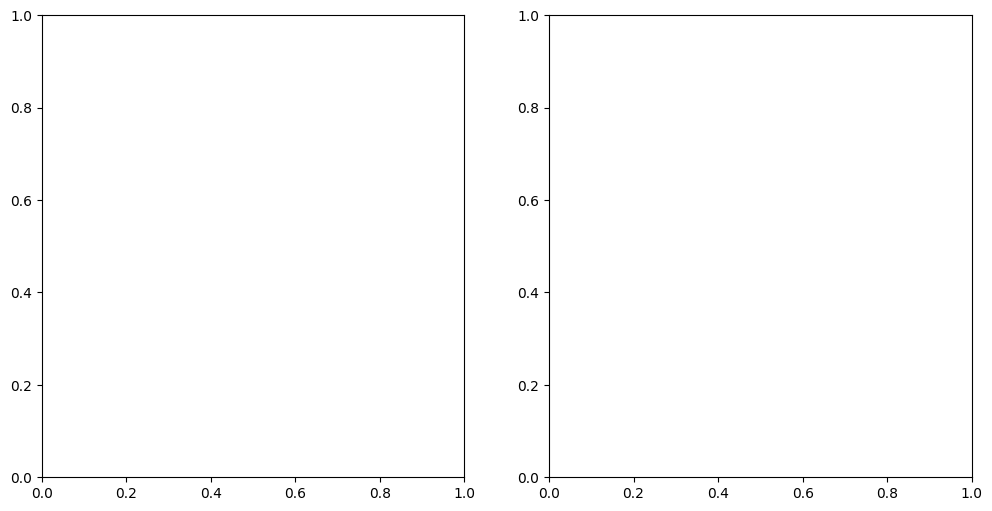

In [18]:
for nek in test_df['NEK'].unique():
    fig, axs = plt.subplots(1,2, figsize=(12,6))
    nek_df = test_df[test_df['NEK']==nek]
    moe_df = nek_df[(nek_df['NEK'] == nek) & (nek_df['feat_type'] == 'moe')]
    mfp_df = nek_df[(nek_df['NEK'] == nek) & (nek_df['feat_type'] == 'mfp')]
    sns.scatterplot(data=moe_df, x='1-specificity', y='recall', hue='strategy', style='fold',
                   s=300, alpha=0.6, ax=axs[0], legend=True, palette=this_palette )
    sns.scatterplot(data=mfp_df, x='1-specificity', y='recall', hue='strategy', style='fold',
                  s=300, alpha=0.6, ax=axs[1], legend=False, palette=this_palette )
    plt.suptitle('GP RBF Kernel Results (fold validation)', fontsize=18, x=0.49, y =.96)
    for i, ax in enumerate(axs): 
        axs[i].plot([-0.1, 1.1],[-0.1,1.1], linestyle='--', color='gray')
        axs[i].set_xlim(-0.1, 1.1)
        axs[i].set_ylim(-0.1, 1.1)
        axs[i].set_xlabel('1 - Specificity', fontsize=16)
        axs[i].set_ylabel('Sensitivity (Recall)', fontsize=16)
    
        
    axs[0].set_title(f'{nek} moe', fontsize=16)
    axs[1].set_title(f'{nek} mfp', fontsize=16)
    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles=handles, labels=labels,
               loc='upper center', bbox_to_anchor=(0.5, .01), ncol=2, fontsize=12)
    axs[0].get_legend().remove()
    
    plt.tight_layout(rect=[0, 0, 1, 0.95]) 
    # plt.savefig(f'{nek}_GP_RBF_fold_results.png',bbox_inches='tight')
    plt.tight_layout()
    plt.show();